# Molecular fingerprint based QSAR Analysis for SARS coronavirus 3C-like protease inhibitors

**Quantitative Structure-Activity Relationship** (QSAR) is a computational method used to analyze the relationship between the three-dimensional structure of molecules and their biological activity.


**Molecular fingerprints** encode properties of small molecules and assess their similarities computationally through bit string comparisons.

## Installing Libraries

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict, GridSearchCV



In [7]:
from tabulate import tabulate

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [10]:
from sklearn import preprocessing

## Data Preprocessing

**CHEMBL5118** and **CHEMBL3927** targets were extracted from the ChEMBL database. 

*   CHEMBL5118: Replicase polyprotein 1ab
*   CHEMBL3927: SARS coronavirus 3C-like proteinase



Molecular fingerprint techniques 

1. AtomPairs2DCount
2. AtomPairs2D
3. EState
4. CDKextended 
5. CDK
6. CDKgraphonly
7. KlekotaRothCount
8. KlekotaRoth
9. MACCS
10. PubChem
11. SubstructureCount
12. Substructure


 
 
 
 
 
 
 
 
 
 
 

In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/covid_df_augmented_smiles.csv')
df

smiles     pIC50  \
0               O=S(c1cccc(c1)Cl)(N(CC(=O)NC1CCCC1)C)=O  6.026872   
1             N(CC(NC1CCCC1)=O)(S(c1cccc(Cl)c1)(=O)=O)C  6.026872   
2               O=S(N(CC(=O)NC1CCCC1)C)(=O)c1cccc(c1)Cl  6.026872   
3             C1C(NC(CN(C)S(=O)(c2cccc(c2)Cl)=O)=O)CCC1  6.026872   
4               O=C(CN(S(=O)(=O)c1cccc(Cl)c1)C)NC1CCCC1  6.026872   
...                                                 ...       ...   
1416  c1c(ccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(cc1)[N+...  4.602060   
1417                     C(CC)CN1c2c(cc(I)cc2)C(=O)C1=O  4.180456   
1418                       C(C)CCN1c2ccc(cc2C(C1=O)=O)I  4.180456   
1419                     C(CCN1C(=O)C(=O)c2c1ccc(c2)I)C  4.180456   
1420                         CCCCN1c2ccc(I)cc2C(C1=O)=O  4.180456   

     bioactivity_class       MW    LogP  NumHDonors  NumHAcceptors  
0               active  330.837  2.0193         1.0            3.0  
1               active  330.837  2.0193         1.0            3.0  
2               active  330.837  2.0193         1.0            3.0  
3               active  330.837  2.0193         1.0            3.0  
4               active  330.837  2.0193         1.0            3.0  
...                ...      ...     ...         ...            ...  
1416          inactive  308.271  2.3358         0.0            6.0  
1417          inactive  329.137  2.6206         0.0            2.0  
1418          inactive  329.137  2.6206         0.0            2.0  
1419          inactive  329.137  2.6206         0.0            2.0  
1420          inactive  329.137  2.6206         0.0            2.0  

[1421 rows x 7 columns]

## AtomPairs2DCount

Feature count **780**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/atompairs2dcount.csv') 
df_fp

Name  APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  \
0        AUTOGEN_molecule_1        12.0         4.0         1.0         1.0   
1        AUTOGEN_molecule_2        12.0         4.0         1.0         1.0   
2        AUTOGEN_molecule_3        12.0         4.0         1.0         1.0   
3        AUTOGEN_molecule_4        12.0         4.0         1.0         1.0   
4        AUTOGEN_molecule_5        12.0         4.0         1.0         1.0   
...                     ...         ...         ...         ...         ...   
1416  AUTOGEN_molecule_1417        12.0         2.0         0.0         2.0   
1417  AUTOGEN_molecule_1418        11.0         3.0         2.0         0.0   
1418  AUTOGEN_molecule_1419        11.0         3.0         2.0         0.0   
1419  AUTOGEN_molecule_1420        11.0         3.0         2.0         0.0   
1420  AUTOGEN_molecule_1421        11.0         3.0         2.0         0.0   

      APC2D1_C_P  APC2D1_C_F  APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  ...  \
0            0.0         0.0          1.0          0.0         0.0  ...   
1            0.0         0.0          1.0          0.0         0.0  ...   
2            0.0         0.0          1.0          0.0         0.0  ...   
3            0.0         0.0          1.0          0.0         0.0  ...   
4            0.0         0.0          1.0          0.0         0.0  ...   
...          ...         ...          ...          ...         ...  ...   
1416         0.0         0.0          0.0          0.0         0.0  ...   
1417         0.0         0.0          0.0          0.0         1.0  ...   
1418         0.0         0.0          0.0          0.0         1.0  ...   
1419         0.0         0.0          0.0          0.0         1.0  ...   
1420         0.0         0.0          0.0          0.0         1.0  ...   

      APC2D10_I_I  APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  \
0             0.0          0.0           0.0          0.0          0.0   
1             0.0          0.0           0.0          0.0          0.0   
2             0.0          0.0           0.0          0.0          0.0   
3             0.0          0.0           0.0          0.0          0.0   
4             0.0          0.0           0.0          0.0          0.0   
...           ...          ...           ...          ...          ...   
1416          0.0          0.0           0.0          0.0          0.0   
1417          0.0          0.0           0.0          0.0          0.0   
1418          0.0          0.0           0.0          0.0          0.0   
1419          0.0          0.0           0.0          0.0          0.0   
1420          0.0          0.0           0.0          0.0          0.0   

      APC2D10_B_Si  APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0              0.0          0.0            0.0           0.0          0.0  
1              0.0          0.0            0.0           0.0          0.0  
2              0.0          0.0            0.0           0.0          0.0  
3              0.0          0.0            0.0           0.0          0.0  
4              0.0          0.0            0.0           0.0          0.0  
...            ...          ...            ...           ...          ...  
1416           0.0          0.0            0.0           0.0          0.0  
1417           0.0          0.0            0.0           0.0          0.0  
1418           0.0          0.0            0.0           0.0          0.0  
1419           0.0          0.0            0.0           0.0          0.0  
1420           0.0          0.0            0.0           0.0          0.0  

[1421 rows x 781 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  APC2D1_C_P  APC2D1_C_F  \
0           12.0         4.0         1.0         1.0         0.0         0.0   
1           12.0         4.0         1.0         1.0         0.0         0.0   
2           12.0         4.0         1.0         1.0         0.0         0.0   
3           12.0         4.0         1.0         1.0         0.0         0.0   
4           12.0         4.0         1.0         1.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
1416        12.0         2.0         0.0         2.0         0.0         0.0   
1417        11.0         3.0         2.0         0.0         0.0         0.0   
1418        11.0         3.0         2.0         0.0         0.0         0.0   
1419        11.0         3.0         2.0         0.0         0.0         0.0   
1420        11.0         3.0         2.0         0.0         0.0         0.0   

      APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  APC2D1_C_B  ...  APC2D10_I_I  \
0             1.0          0.0         0.0         0.0  ...          0.0   
1             1.0          0.0         0.0         0.0  ...          0.0   
2             1.0          0.0         0.0         0.0  ...          0.0   
3             1.0          0.0         0.0         0.0  ...          0.0   
4             1.0          0.0         0.0         0.0  ...          0.0   
...           ...          ...         ...         ...  ...          ...   
1416          0.0          0.0         0.0         0.0  ...          0.0   
1417          0.0          0.0         1.0         0.0  ...          0.0   
1418          0.0          0.0         1.0         0.0  ...          0.0   
1419          0.0          0.0         1.0         0.0  ...          0.0   
1420          0.0          0.0         1.0         0.0  ...          0.0   

      APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  APC2D10_B_Si  \
0             0.0           0.0          0.0          0.0           0.0   
1             0.0           0.0          0.0          0.0           0.0   
2             0.0           0.0          0.0          0.0           0.0   
3             0.0           0.0          0.0          0.0           0.0   
4             0.0           0.0          0.0          0.0           0.0   
...           ...           ...          ...          ...           ...   
1416          0.0           0.0          0.0          0.0           0.0   
1417          0.0           0.0          0.0          0.0           0.0   
1418          0.0           0.0          0.0          0.0           0.0   
1419          0.0           0.0          0.0          0.0           0.0   
1420          0.0           0.0          0.0          0.0           0.0   

      APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0             0.0            0.0           0.0          0.0  
1             0.0            0.0           0.0          0.0  
2             0.0            0.0           0.0          0.0  
3             0.0            0.0           0.0          0.0  
4             0.0            0.0           0.0          0.0  
...           ...            ...           ...          ...  
1416          0.0            0.0           0.0          0.0  
1417          0.0            0.0           0.0          0.0  
1418          0.0            0.0           0.0          0.0  
1419          0.0            0.0           0.0          0.0  
1420          0.0            0.0           0.0          0.0  

[1421 rows x 780 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 780), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 152)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 152), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 152), (213,))

### Logistic Regression


Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


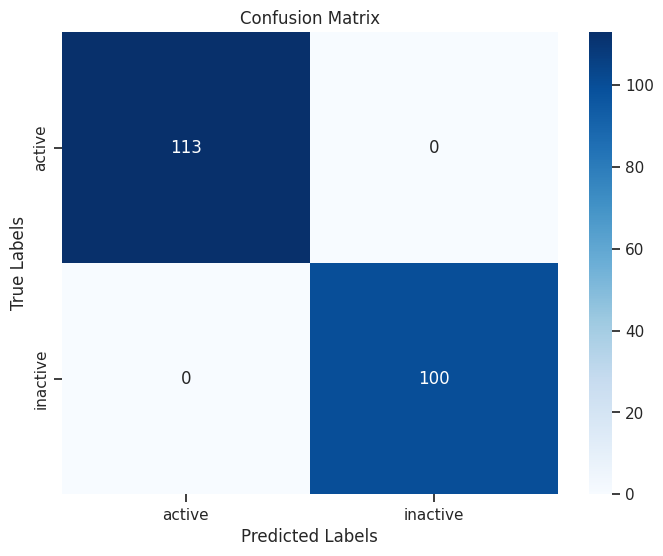

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8282899366643209
Mean Precision: 0.8454777763813832
Mean Recall: 0.8267910920906641
Mean F1-score: 0.8256455746106841


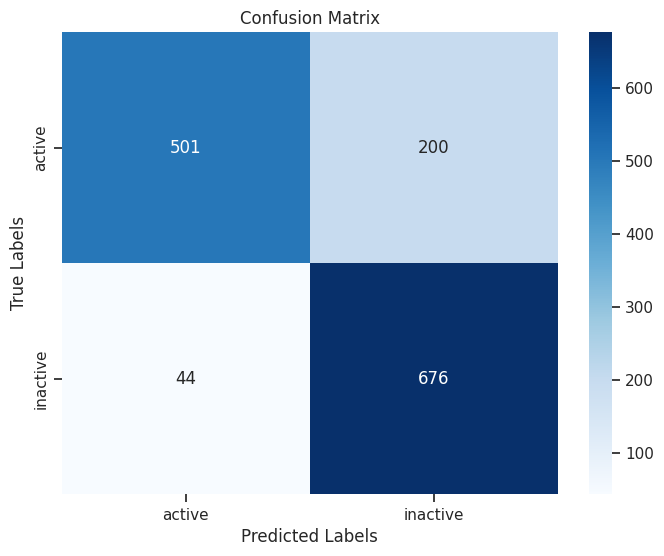

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9624413145539906
Mean Precision: 0.9669421487603306
Mean Recall: 0.96
Mean F1-score: 0.9620726495726496


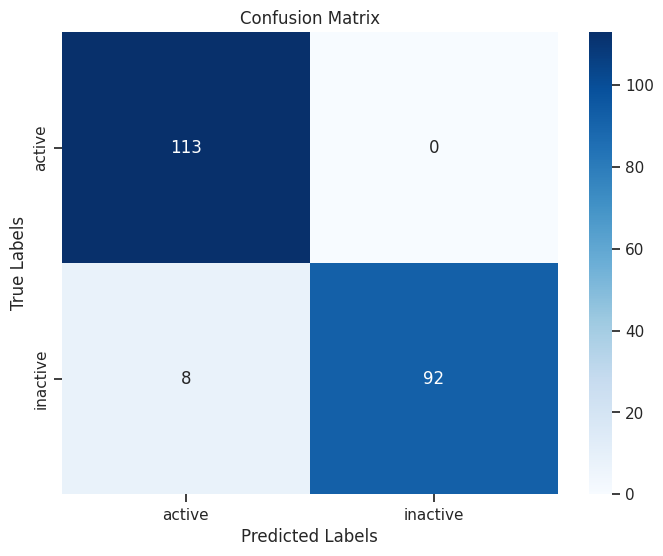

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8789584799437016
Mean Precision: 0.8827836184152493
Mean Recall: 0.8782968774766207
Mean F1-score: 0.8785030561642255


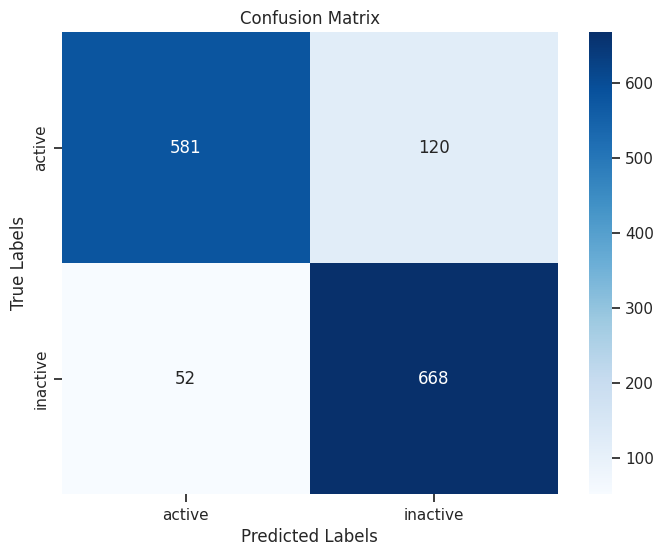

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


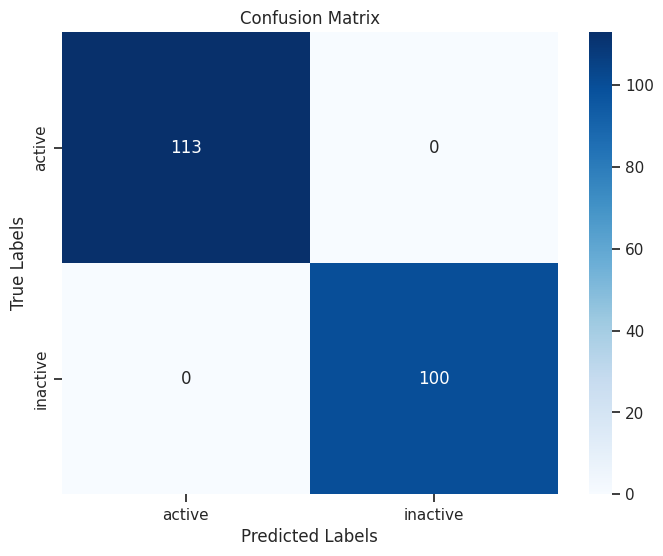

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7762139338494018
Mean Precision: 0.8065835139555603
Mean Recall: 0.7740846409890633
Mean F1-score: 0.7695863672520346


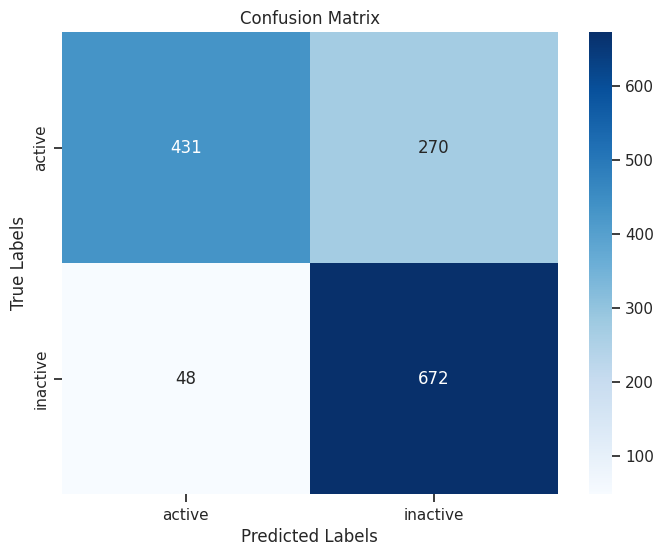

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


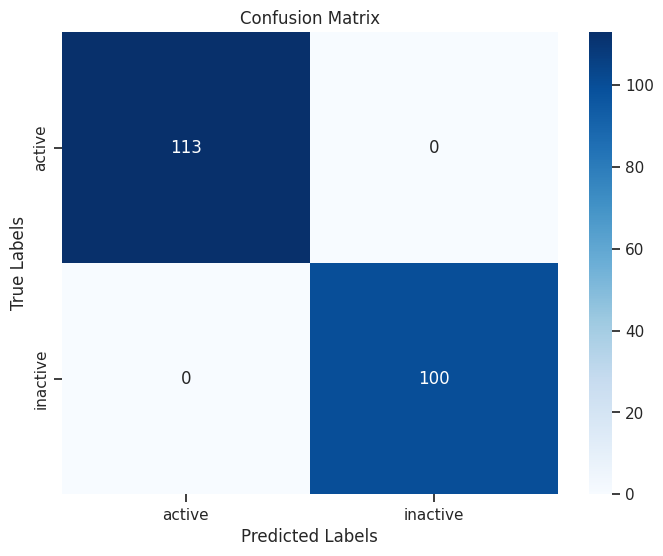

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8233638282899367
Mean Precision: 0.8582693692857679
Mean Recall: 0.821271199873197
Mean F1-score: 0.8182657978178913


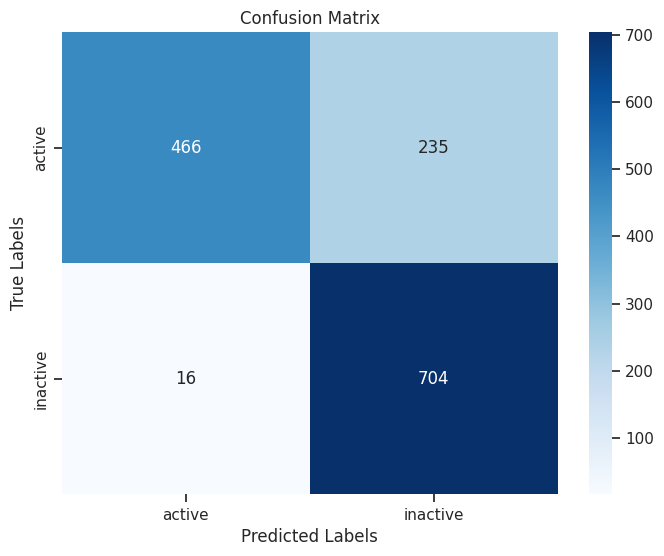

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

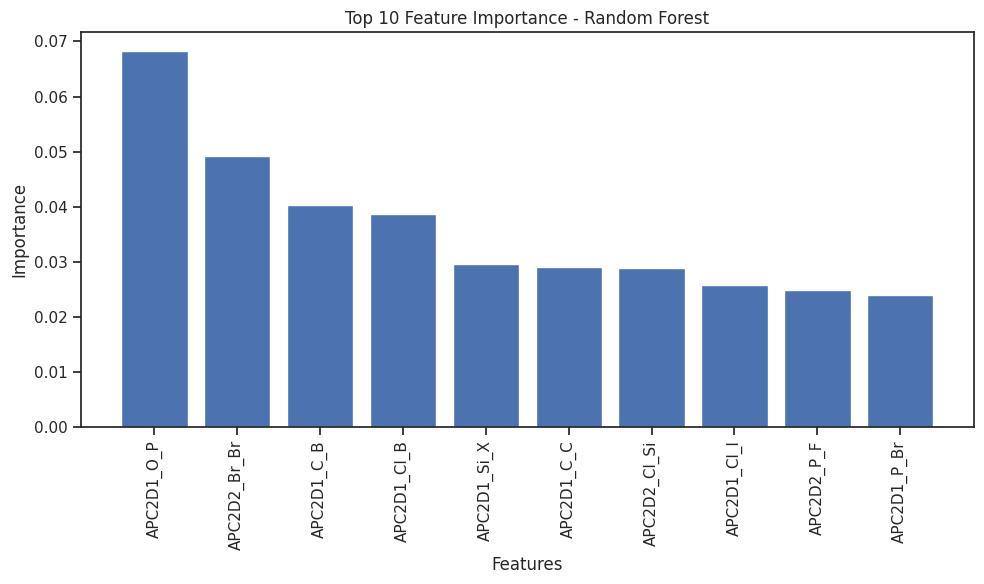

In [ ]:
# Get the feature importances
importances = rfc.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the feature names
feature_names = X_columns

# Extract the top 10 feature names and importances
top_feature_names = feature_names[sorted_indices[:10]]
top_importances = importances[sorted_indices[:10]]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

### SVM

Mean Accuracy: 0.9154929577464789
Mean Precision: 0.9165331196581197
Mean Recall: 0.9140265486725664
Mean F1-score: 0.9149511978704525


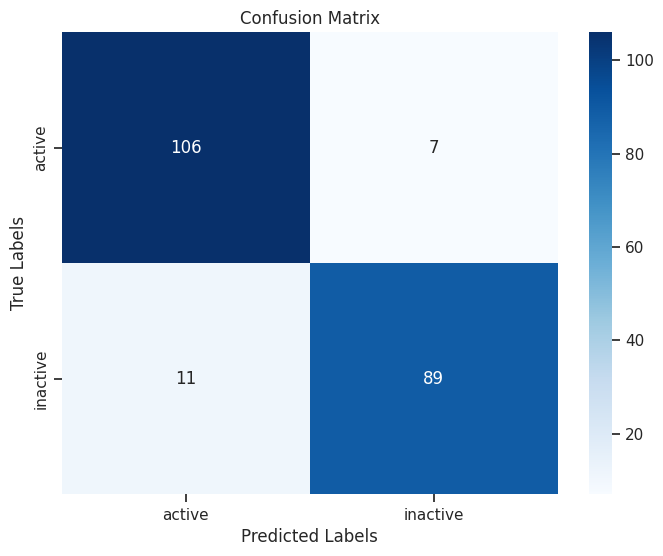

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8986629134412386
Mean Precision: 0.8989368454458901
Mean Recall: 0.8984942146140434
Mean F1-score: 0.8986013986013986


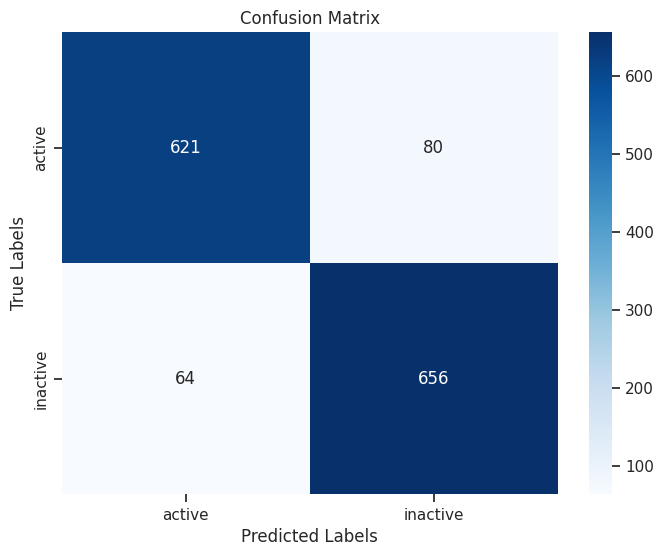

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.8685446009389671
Mean Precision: 0.8699470432480141
Mean Recall: 0.8709292035398231
Mean F1-score: 0.8685185185185185


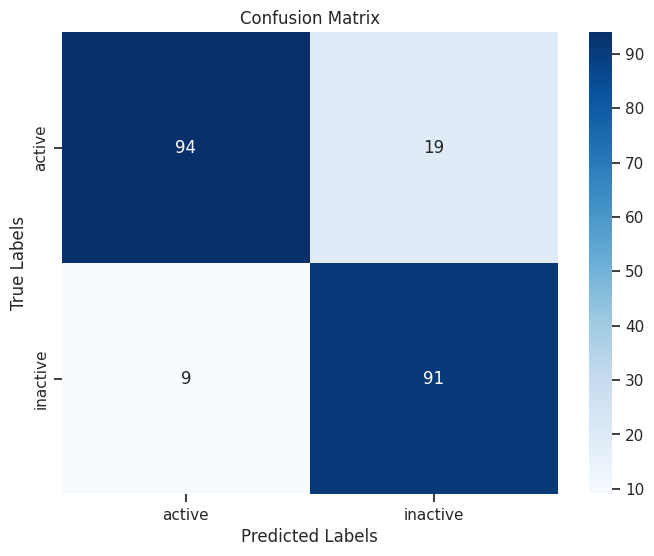

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7804363124560169
Mean Precision: 0.7973226509811875
Mean Recall: 0.7788159771754637
Mean F1-score: 0.7765669222767846


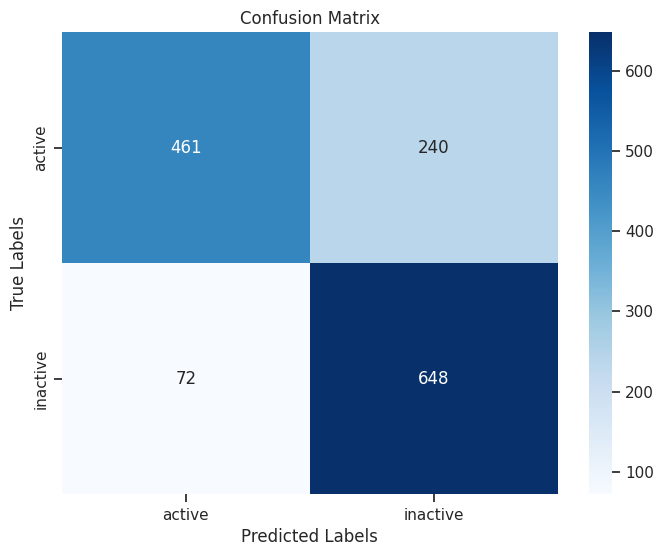

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## AtomPairs2D

Feature count **780**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/atom2d.csv') 
df_fp

Name  AD2D1  AD2D2  AD2D3  AD2D4  AD2D5  AD2D6  AD2D7  \
0        AUTOGEN_molecule_1      1      1      1      1      0      0      1   
1        AUTOGEN_molecule_2      1      1      1      1      0      0      1   
2        AUTOGEN_molecule_3      1      1      1      1      0      0      1   
3        AUTOGEN_molecule_4      1      1      1      1      0      0      1   
4        AUTOGEN_molecule_5      1      1      1      1      0      0      1   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
1416  AUTOGEN_molecule_1417      1      1      0      1      0      0      0   
1417  AUTOGEN_molecule_1418      1      1      1      0      0      0      0   
1418  AUTOGEN_molecule_1419      1      1      1      0      0      0      0   
1419  AUTOGEN_molecule_1420      1      1      1      0      0      0      0   
1420  AUTOGEN_molecule_1421      1      1      1      0      0      0      0   

      AD2D8  AD2D9  ...  AD2D771  AD2D772  AD2D773  AD2D774  AD2D775  AD2D776  \
0         0      0  ...        0        0        0        0        0        0   
1         0      0  ...        0        0        0        0        0        0   
2         0      0  ...        0        0        0        0        0        0   
3         0      0  ...        0        0        0        0        0        0   
4         0      0  ...        0        0        0        0        0        0   
...     ...    ...  ...      ...      ...      ...      ...      ...      ...   
1416      0      0  ...        0        0        0        0        0        0   
1417      0      1  ...        0        0        0        0        0        0   
1418      0      1  ...        0        0        0        0        0        0   
1419      0      1  ...        0        0        0        0        0        0   
1420      0      1  ...        0        0        0        0        0        0   

      AD2D777  AD2D778  AD2D779  AD2D780  
0           0        0        0        0  
1           0        0        0        0  
2           0        0        0        0  
3           0        0        0        0  
4           0        0        0        0  
...       ...      ...      ...      ...  
1416        0        0        0        0  
1417        0        0        0        0  
1418        0        0        0        0  
1419        0        0        0        0  
1420        0        0        0        0  

[1421 rows x 781 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

AD2D1  AD2D2  AD2D3  AD2D4  AD2D5  AD2D6  AD2D7  AD2D8  AD2D9  AD2D10  \
0         1      1      1      1      0      0      1      0      0       0   
1         1      1      1      1      0      0      1      0      0       0   
2         1      1      1      1      0      0      1      0      0       0   
3         1      1      1      1      0      0      1      0      0       0   
4         1      1      1      1      0      0      1      0      0       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1416      1      1      0      1      0      0      0      0      0       0   
1417      1      1      1      0      0      0      0      0      1       0   
1418      1      1      1      0      0      0      0      0      1       0   
1419      1      1      1      0      0      0      0      0      1       0   
1420      1      1      1      0      0      0      0      0      1       0   

      ...  AD2D771  AD2D772  AD2D773  AD2D774  AD2D775  AD2D776  AD2D777  \
0     ...        0        0        0        0        0        0        0   
1     ...        0        0        0        0        0        0        0   
2     ...        0        0        0        0        0        0        0   
3     ...        0        0        0        0        0        0        0   
4     ...        0        0        0        0        0        0        0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
1416  ...        0        0        0        0        0        0        0   
1417  ...        0        0        0        0        0        0        0   
1418  ...        0        0        0        0        0        0        0   
1419  ...        0        0        0        0        0        0        0   
1420  ...        0        0        0        0        0        0        0   

      AD2D778  AD2D779  AD2D780  
0           0        0        0  
1           0        0        0  
2           0        0        0  
3           0        0        0  
4           0        0        0  
...       ...      ...      ...  
1416        0        0        0  
1417        0        0        0  
1418        0        0        0  
1419        0        0        0  
1420        0        0        0  

[1421 rows x 780 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 780), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 58)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 58), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 58), (213,))

### Logistic Regression


Mean Accuracy: 0.9765258215962441
Mean Precision: 0.978813559322034
Mean Recall: 0.975
Mean F1-score: 0.9763569763569764


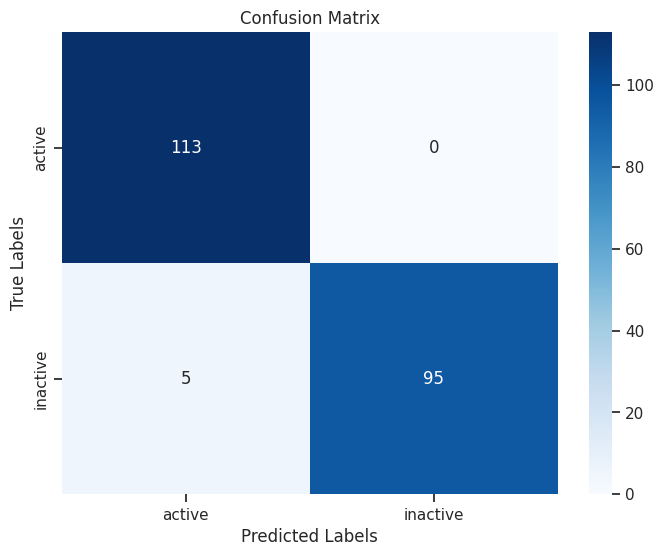

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8121041520056298
Mean Precision: 0.8220578999864547
Mean Recall: 0.8109129814550642
Mean F1-score: 0.8102089114126169


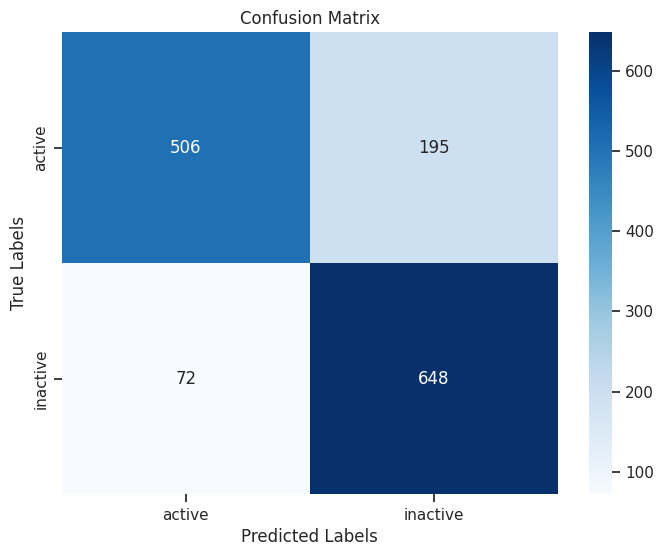

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9436619718309859
Mean Precision: 0.952
Mean Recall: 0.94
Mean F1-score: 0.9428750223493654


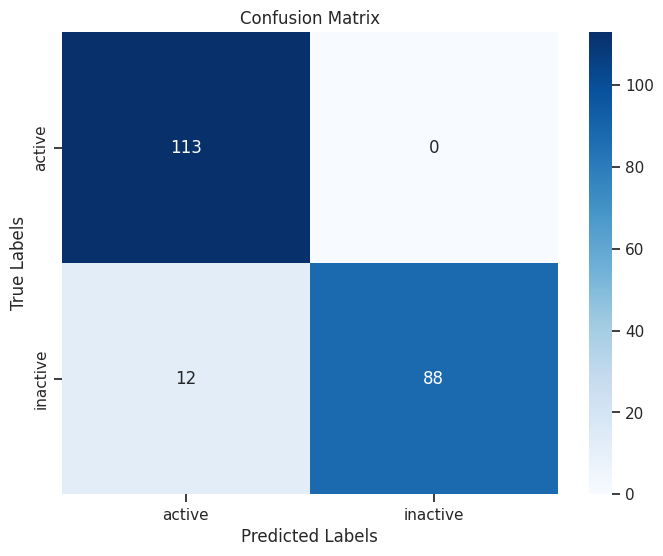

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8212526389866291
Mean Precision: 0.830702440262489
Mean Recall: 0.8201101600887621
Mean F1-score: 0.8195755801630815


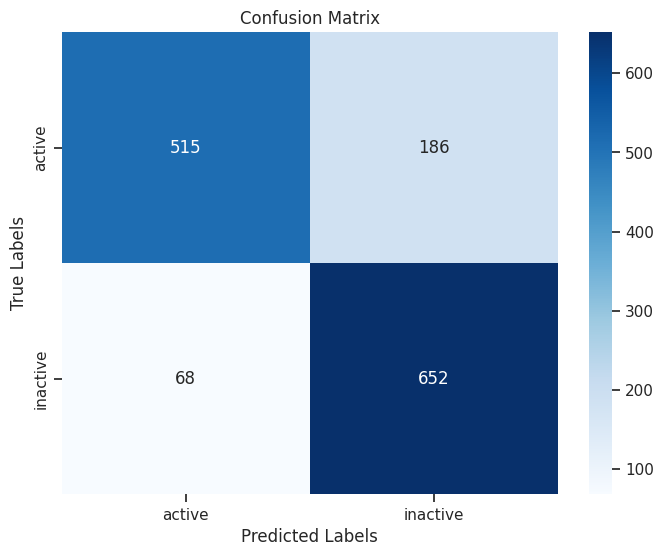

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


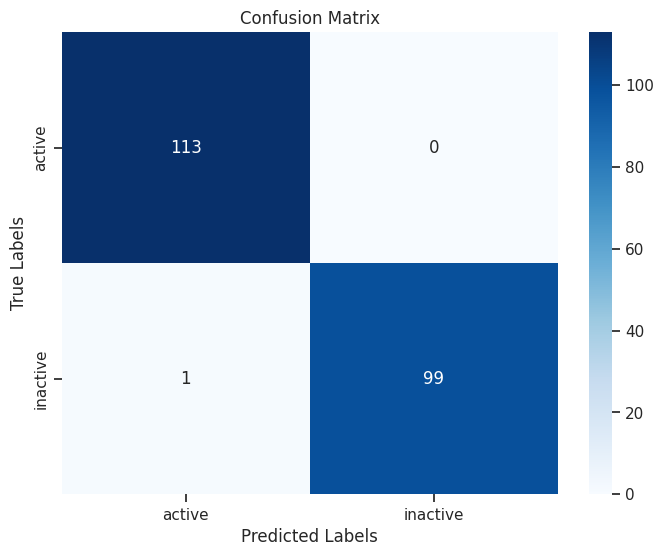

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.82899366643209
Mean Precision: 0.8442219529561665
Mean Recall: 0.8275796481217308
Mean F1-score: 0.8266277046822164


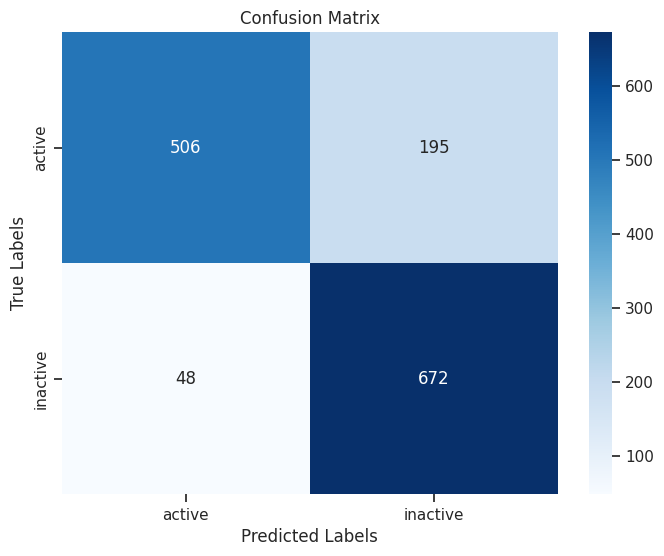

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


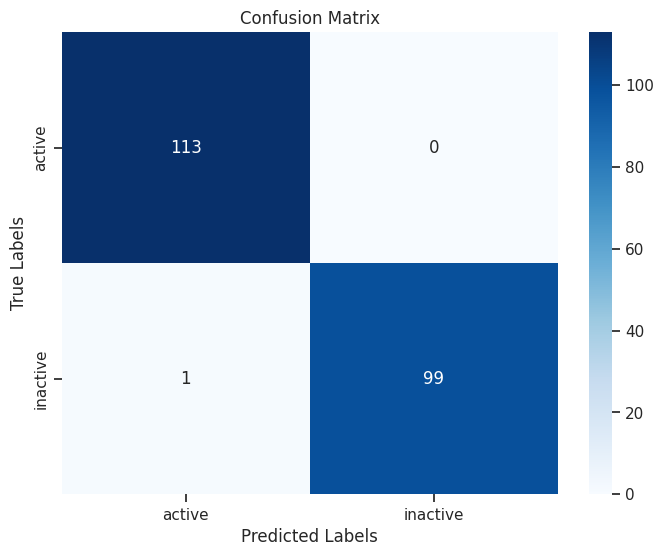

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8430682617874736
Mean Precision: 0.8638616892356932
Mean Recall: 0.8414685370106197
Mean F1-score: 0.8403326539507066


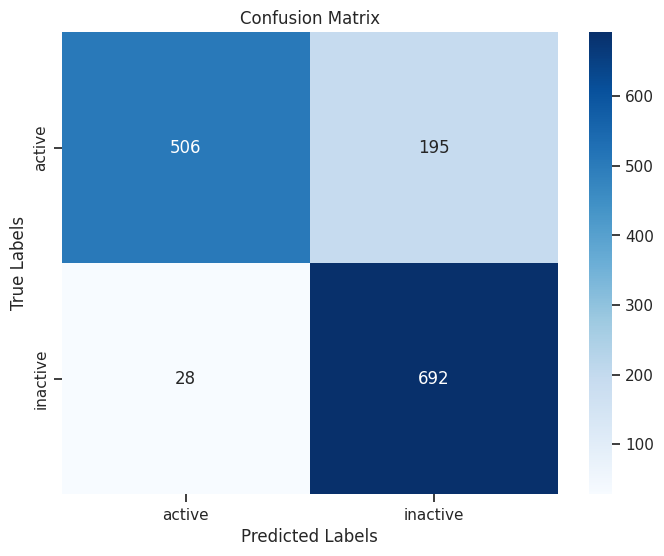

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

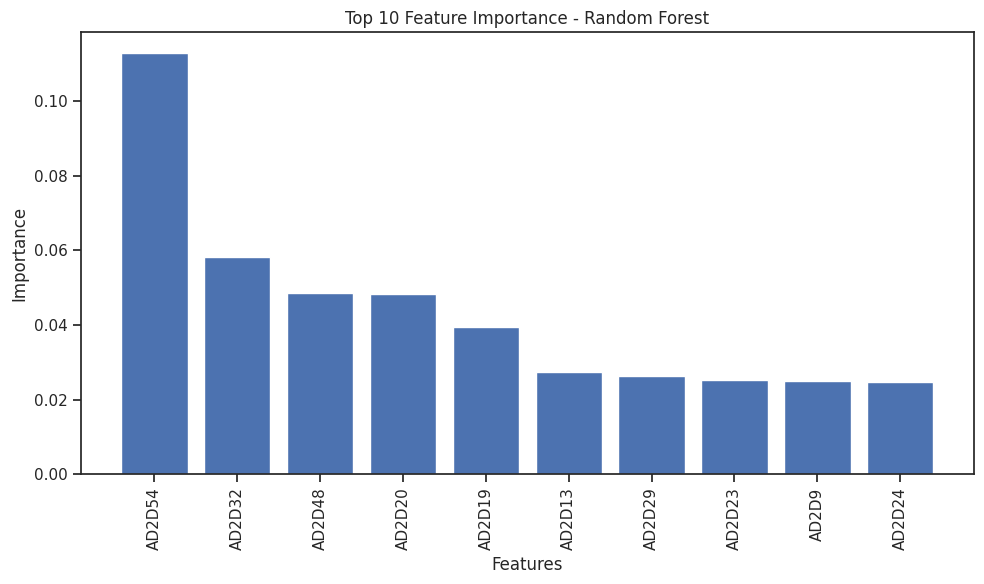

In [ ]:
# Get the feature importances
importances = rfc.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the feature names
feature_names = X_columns

# Extract the top 10 feature names and importances
top_feature_names = feature_names[sorted_indices[:10]]
top_importances = importances[sorted_indices[:10]]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

### SVM

Mean Accuracy: 0.9906103286384976
Mean Precision: 0.991304347826087
Mean Recall: 0.99
Mean F1-score: 0.9905635300372142


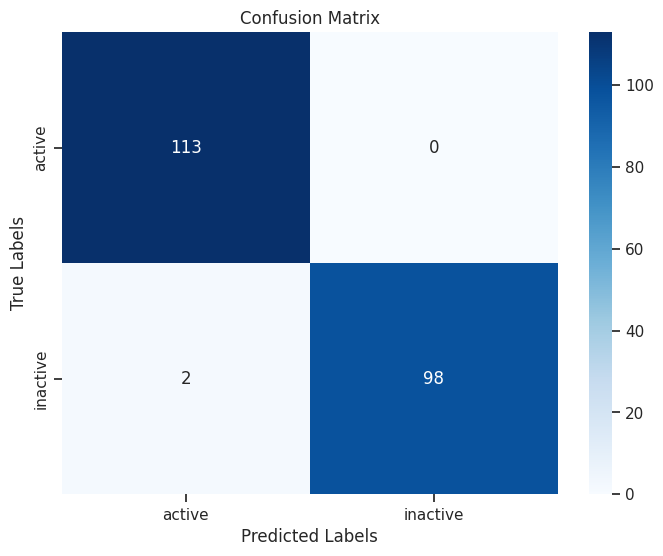

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8346235045742435
Mean Precision: 0.851941391941392
Mean Recall: 0.8331352036772863
Mean F1-score: 0.8321061456586718


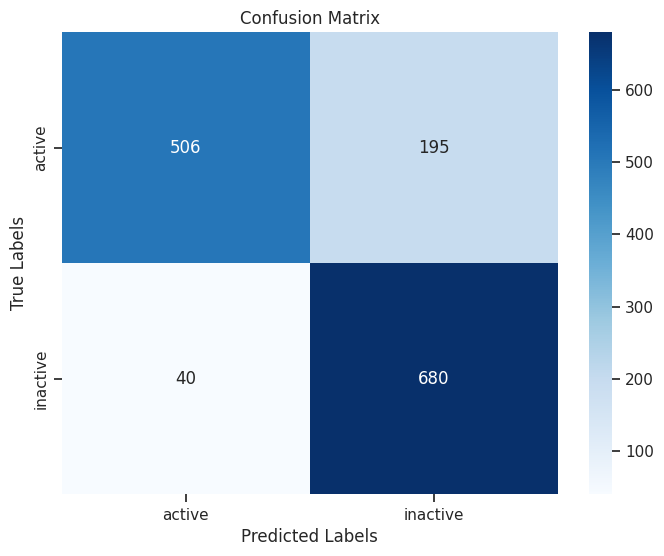

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.784037558685446
Mean Precision: 0.7832300884955752
Mean Recall: 0.7832300884955752
Mean F1-score: 0.7832300884955752


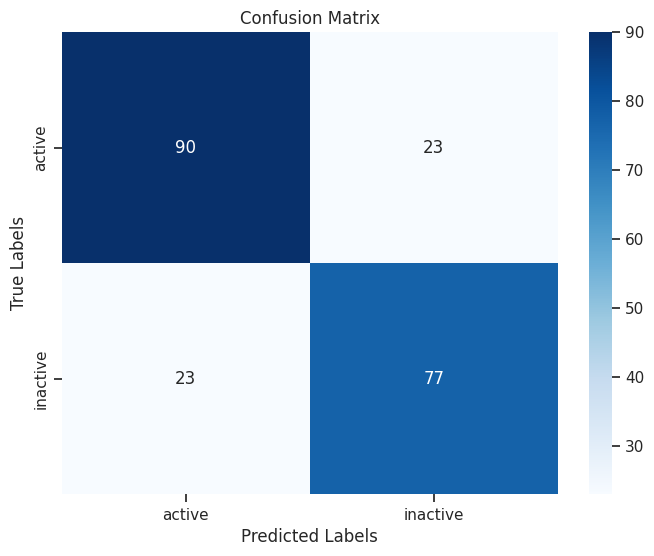

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7501759324419423
Mean Precision: 0.7507408070321977
Mean Recall: 0.7498018703439531
Mean F1-score: 0.7498146380171846


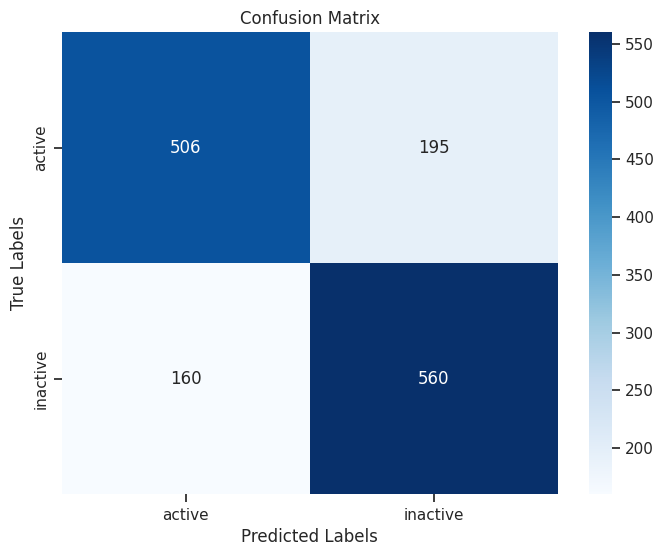

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## CDK

Feature count **1024**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/cdk.csv') 
df_fp

Name  FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  ...  \
0        AUTOGEN_molecule_1    0    0    0    0    0    0    0    0    0  ...   
1        AUTOGEN_molecule_2    0    0    0    0    0    0    0    0    0  ...   
2        AUTOGEN_molecule_3    0    0    0    0    0    0    0    0    0  ...   
3        AUTOGEN_molecule_4    0    0    0    0    0    0    0    0    0  ...   
4        AUTOGEN_molecule_5    0    0    0    0    0    0    0    0    0  ...   
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1416  AUTOGEN_molecule_1417    0    0    0    0    0    0    0    0    0  ...   
1417  AUTOGEN_molecule_1418    0    0    0    0    1    0    0    0    0  ...   
1418  AUTOGEN_molecule_1419    0    0    0    0    1    0    0    0    0  ...   
1419  AUTOGEN_molecule_1420    0    0    0    0    1    0    0    0    0  ...   
1420  AUTOGEN_molecule_1421    0    0    0    0    1    0    0    0    0  ...   

      FP1015  FP1016  FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  \
0          0       1       1       0       0       0       0       0       0   
1          0       1       1       0       0       0       0       0       0   
2          0       1       1       0       0       0       0       0       0   
3          0       1       1       0       0       0       0       0       0   
4          0       1       1       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416       0       1       0       0       0       0       0       0       0   
1417       0       0       0       0       0       1       0       0       0   
1418       0       0       0       0       0       1       0       0       0   
1419       0       0       0       0       0       1       0       0       0   
1420       0       0       0       0       0       1       0       0       0   

      FP1024  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
1416       0  
1417       0  
1418       0  
1419       0  
1420       0  

[1421 rows x 1025 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  FP10  ...  FP1015  FP1016  \
0       0    0    0    0    0    0    0    0    0     0  ...       0       1   
1       0    0    0    0    0    0    0    0    0     0  ...       0       1   
2       0    0    0    0    0    0    0    0    0     0  ...       0       1   
3       0    0    0    0    0    0    0    0    0     0  ...       0       1   
4       0    0    0    0    0    0    0    0    0     0  ...       0       1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...     ...   
1416    0    0    0    0    0    0    0    0    0     0  ...       0       1   
1417    0    0    0    0    1    0    0    0    0     0  ...       0       0   
1418    0    0    0    0    1    0    0    0    0     0  ...       0       0   
1419    0    0    0    0    1    0    0    0    0     0  ...       0       0   
1420    0    0    0    0    1    0    0    0    0     0  ...       0       0   

      FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  FP1024  
0          1       0       0       0       0       0       0       0  
1          1       0       0       0       0       0       0       0  
2          1       0       0       0       0       0       0       0  
3          1       0       0       0       0       0       0       0  
4          1       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
1416       0       0       0       0       0       0       0       0  
1417       0       0       0       1       0       0       0       0  
1418       0       0       0       1       0       0       0       0  
1419       0       0       0       1       0       0       0       0  
1420       0       0       0       1       0       0       0       0  

[1421 rows x 1024 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 1024), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 589)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 589), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 589), (213,))

### Logistic Regression


Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


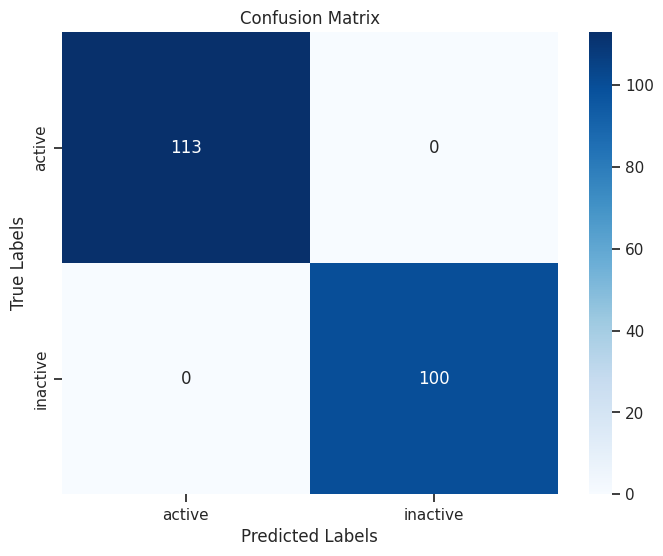

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8367346938775511
Mean Precision: 0.8573686256613086
Mean Recall: 0.8351244254239976
Mean F1-score: 0.8338574550263269


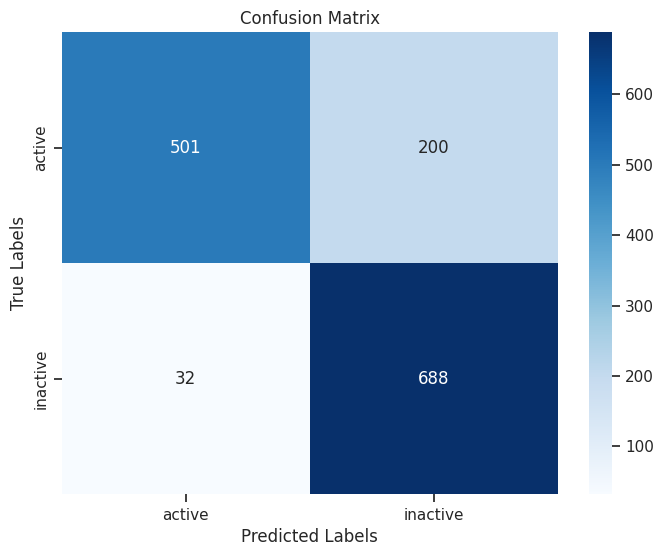

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9765258215962441
Mean Precision: 0.978813559322034
Mean Recall: 0.975
Mean F1-score: 0.9763569763569764


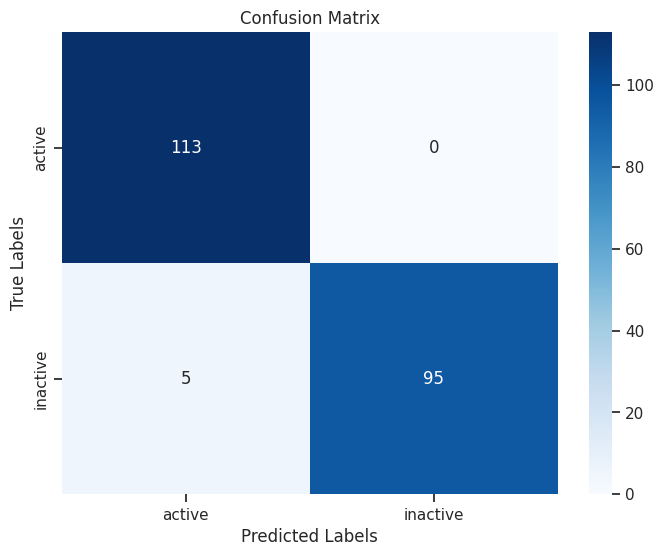

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8676988036593948
Mean Precision: 0.8698915030696888
Mean Recall: 0.8671857663655096
Mean F1-score: 0.8673676894052229


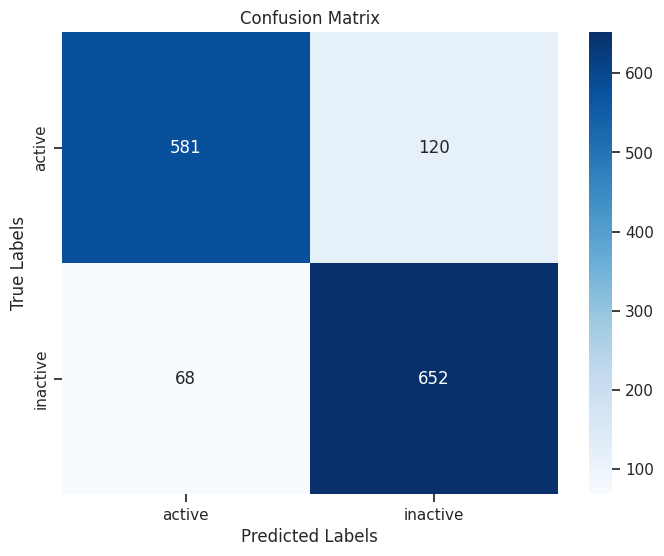

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


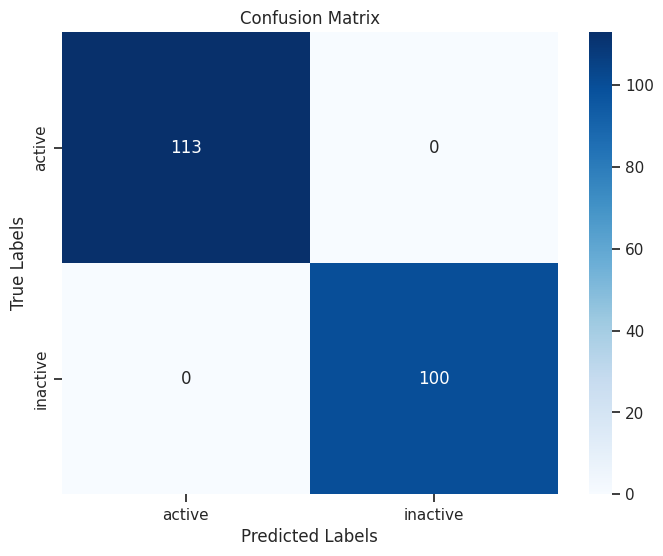

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7987332864180154
Mean Precision: 0.8434992121788423
Mean Recall: 0.7963068632112855
Mean F1-score: 0.791019955654102


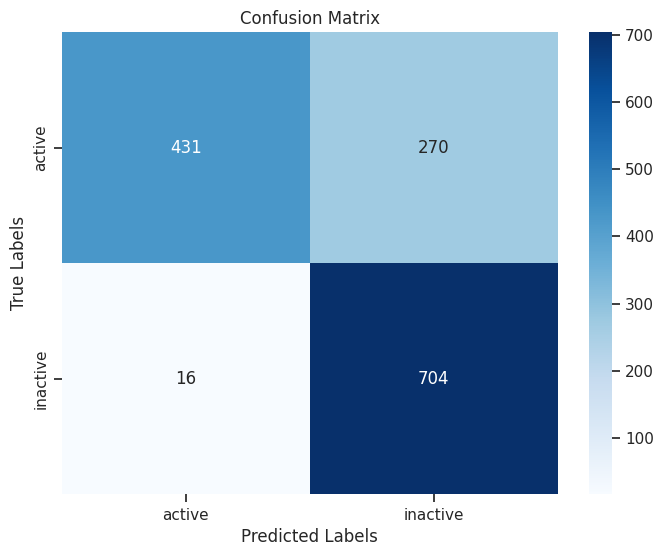

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


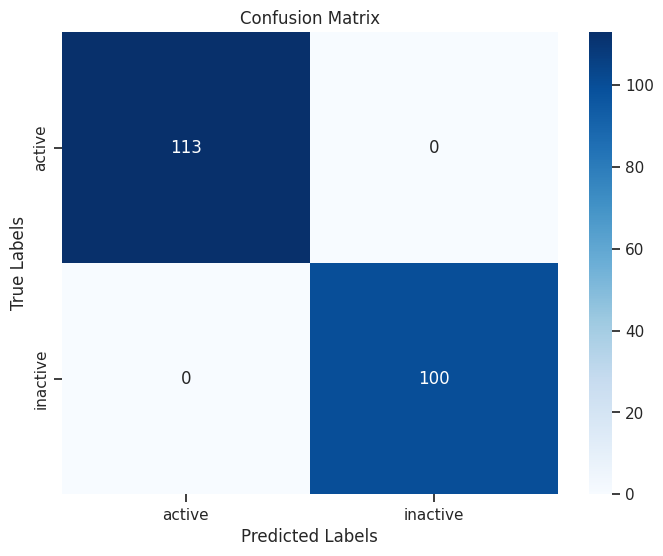

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8233638282899367
Mean Precision: 0.8582693692857679
Mean Recall: 0.821271199873197
Mean F1-score: 0.8182657978178913


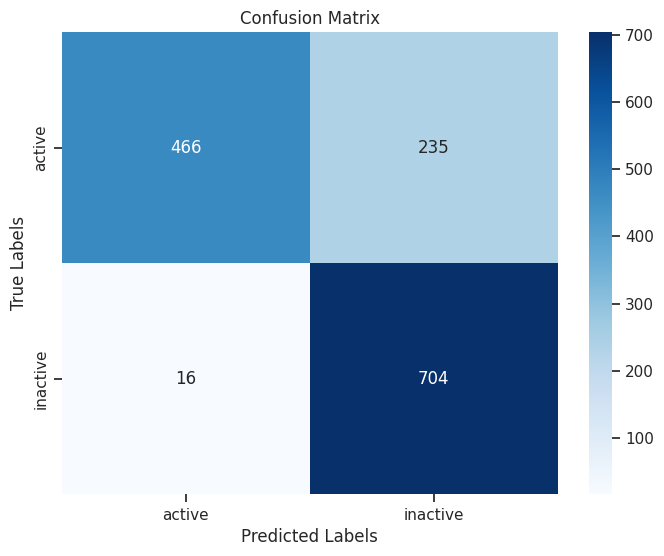

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9906103286384976
Mean Precision: 0.991304347826087
Mean Recall: 0.99
Mean F1-score: 0.9905635300372142


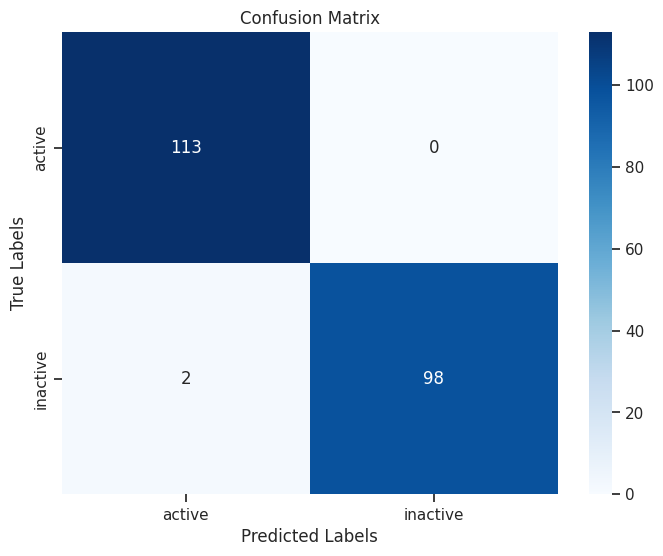

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8479943701618579
Mean Precision: 0.873906643159138
Mean Recall: 0.8462355365351086
Mean F1-score: 0.8448275862068966


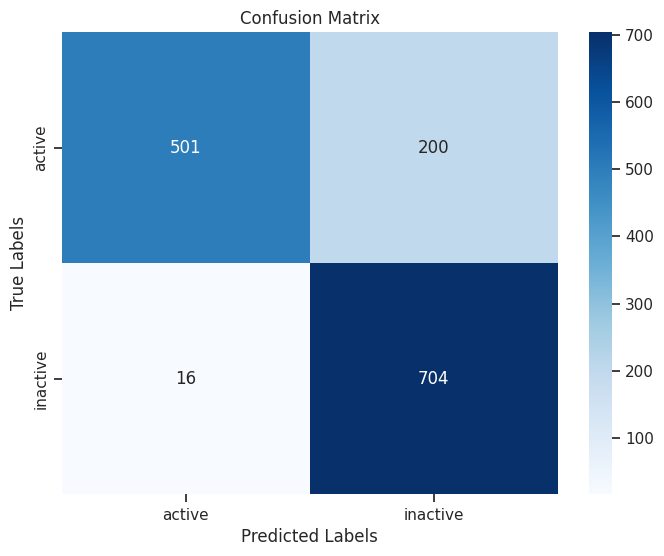

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.9671361502347418
Mean Precision: 0.9708333333333333
Mean Recall: 0.9650000000000001
Mean F1-score: 0.9668438257466254


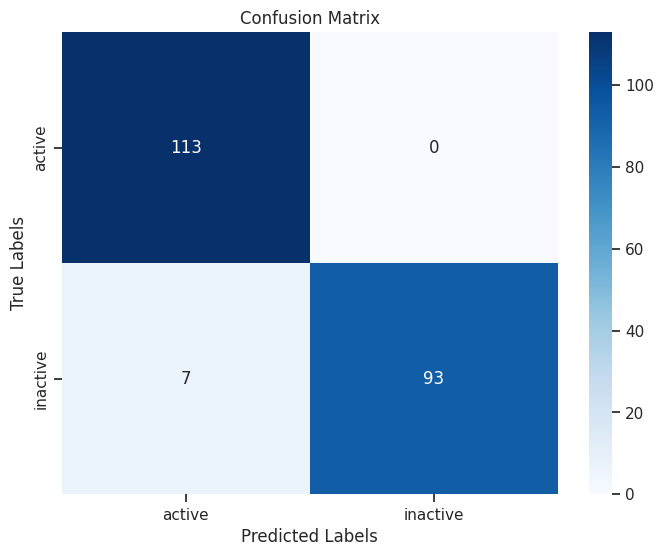

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7741027445460943
Mean Precision: 0.8027377686832426
Mean Recall: 0.7720201299730544
Mean F1-score: 0.7676951635944171


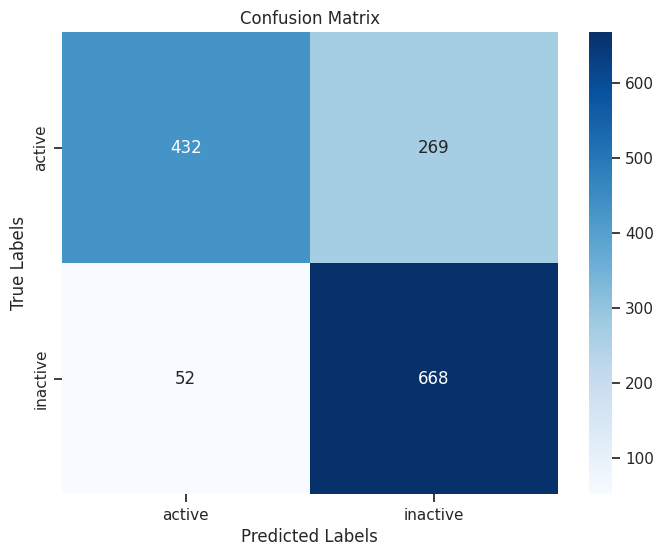

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## CDK Graph

Feature count **1024**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/cdk_graph.csv') 
df_fp

Name  GraphFP1  GraphFP2  GraphFP3  GraphFP4  GraphFP5  \
0        AUTOGEN_molecule_1         0         0         0         0         0   
1        AUTOGEN_molecule_2         0         0         0         0         0   
2        AUTOGEN_molecule_3         0         0         0         0         0   
3        AUTOGEN_molecule_4         0         0         0         0         0   
4        AUTOGEN_molecule_5         0         0         0         0         0   
...                     ...       ...       ...       ...       ...       ...   
1416  AUTOGEN_molecule_1417         0         0         0         1         0   
1417  AUTOGEN_molecule_1418         0         0         0         0         0   
1418  AUTOGEN_molecule_1419         0         0         0         0         0   
1419  AUTOGEN_molecule_1420         0         0         0         0         0   
1420  AUTOGEN_molecule_1421         0         0         0         0         0   

      GraphFP6  GraphFP7  GraphFP8  GraphFP9  ...  GraphFP1015  GraphFP1016  \
0            0         0         0         0  ...            1            0   
1            0         0         0         0  ...            1            0   
2            0         0         0         0  ...            1            0   
3            0         0         0         0  ...            1            0   
4            0         0         0         0  ...            1            0   
...        ...       ...       ...       ...  ...          ...          ...   
1416         0         0         0         0  ...            0            0   
1417         0         1         0         0  ...            0            0   
1418         0         1         0         0  ...            0            0   
1419         0         1         0         0  ...            0            0   
1420         0         1         0         0  ...            0            0   

      GraphFP1017  GraphFP1018  GraphFP1019  GraphFP1020  GraphFP1021  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1416            0            0            0            0            0   
1417            0            0            0            0            0   
1418            0            0            0            0            0   
1419            0            0            0            0            0   
1420            0            0            0            0            0   

      GraphFP1022  GraphFP1023  GraphFP1024  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            0  
...           ...          ...          ...  
1416            0            0            0  
1417            0            0            0  
1418            0            0            0  
1419            0            0            0  
1420            0            0            0  

[1421 rows x 1025 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

GraphFP1  GraphFP2  GraphFP3  GraphFP4  GraphFP5  GraphFP6  GraphFP7  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
1416         0         0         0         1         0         0         0   
1417         0         0         0         0         0         0         1   
1418         0         0         0         0         0         0         1   
1419         0         0         0         0         0         0         1   
1420         0         0         0         0         0         0         1   

      GraphFP8  GraphFP9  GraphFP10  ...  GraphFP1015  GraphFP1016  \
0            0         0          1  ...            1            0   
1            0         0          1  ...            1            0   
2            0         0          1  ...            1            0   
3            0         0          1  ...            1            0   
4            0         0          1  ...            1            0   
...        ...       ...        ...  ...          ...          ...   
1416         0         0          0  ...            0            0   
1417         0         0          0  ...            0            0   
1418         0         0          0  ...            0            0   
1419         0         0          0  ...            0            0   
1420         0         0          0  ...            0            0   

      GraphFP1017  GraphFP1018  GraphFP1019  GraphFP1020  GraphFP1021  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1416            0            0            0            0            0   
1417            0            0            0            0            0   
1418            0            0            0            0            0   
1419            0            0            0            0            0   
1420            0            0            0            0            0   

      GraphFP1022  GraphFP1023  GraphFP1024  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            0  
...           ...          ...          ...  
1416            0            0            0  
1417            0            0            0  
1418            0            0            0  
1419            0            0            0  
1420            0            0            0  

[1421 rows x 1024 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 1024), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 266)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 266), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 266), (213,))

### Logistic Regression


Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


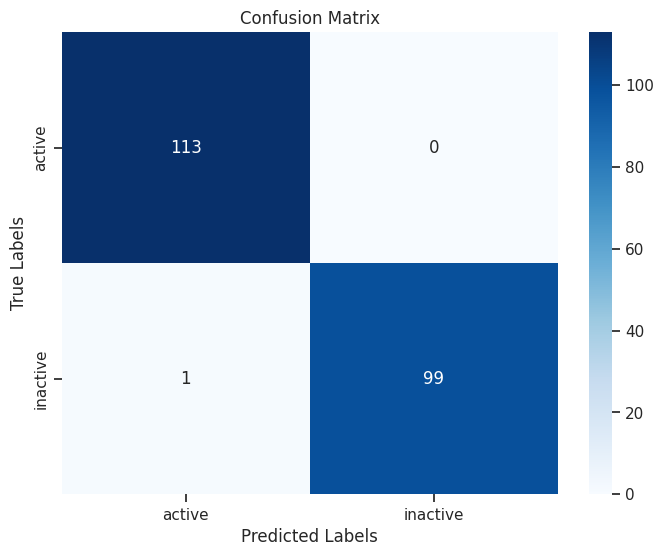

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8339197748064743
Mean Precision: 0.8533582749816729
Mean Recall: 0.8323466476462197
Mean F1-score: 0.8311188909793368


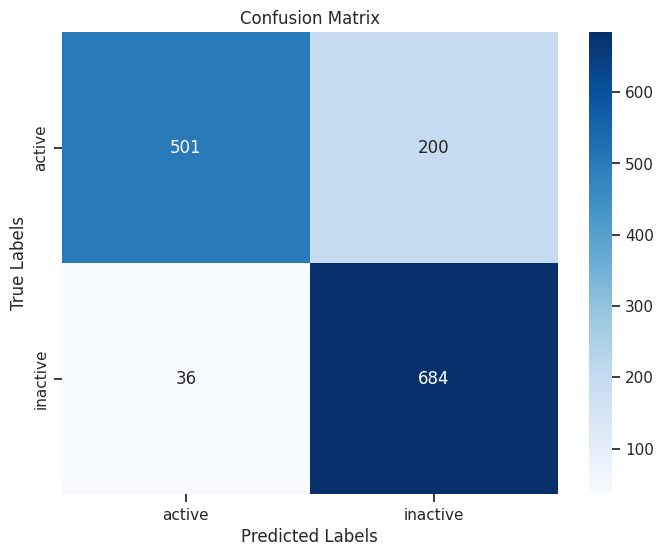

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9577464788732394
Mean Precision: 0.9631147540983607
Mean Recall: 0.9550000000000001
Mean F1-score: 0.9572908544057035


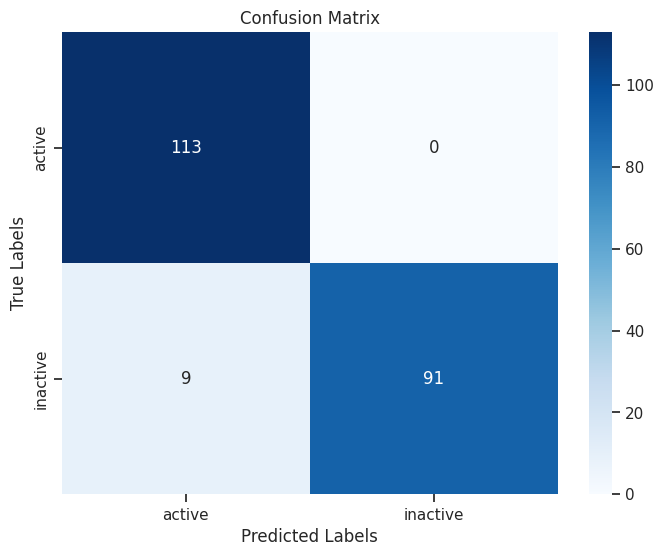

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8508092892329345
Mean Precision: 0.8595367858510318
Mean Recall: 0.8497662070058647
Mean F1-score: 0.8496080099365386


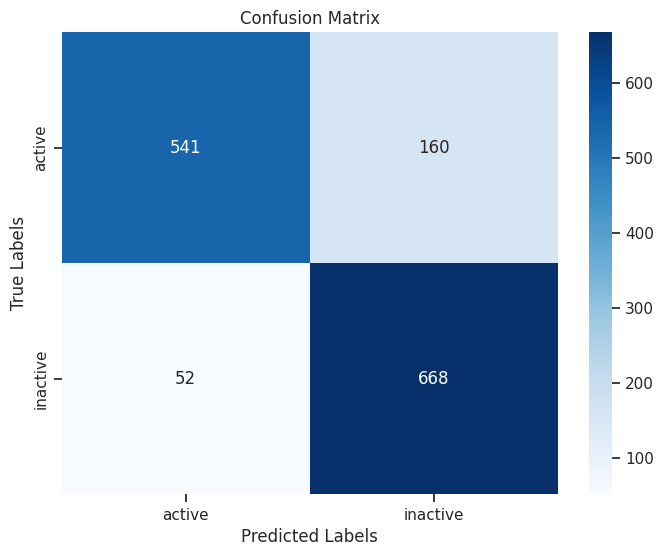

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


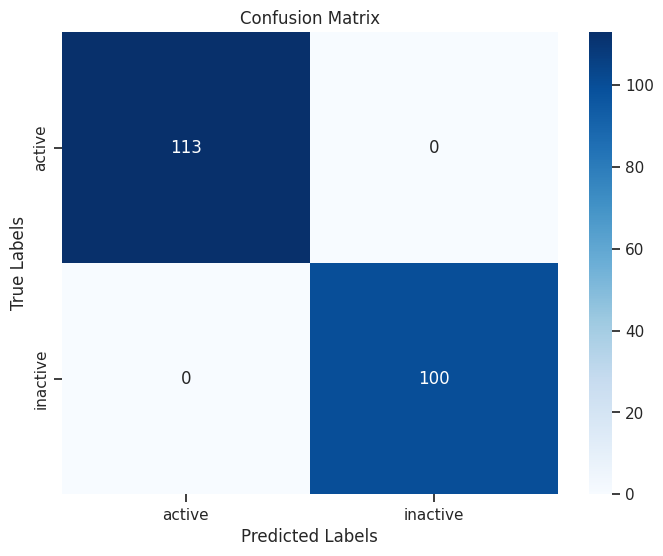

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8318085855031668
Mean Precision: 0.8480597014925373
Mean Recall: 0.8303574258995086
Mean F1-score: 0.8293664251502633


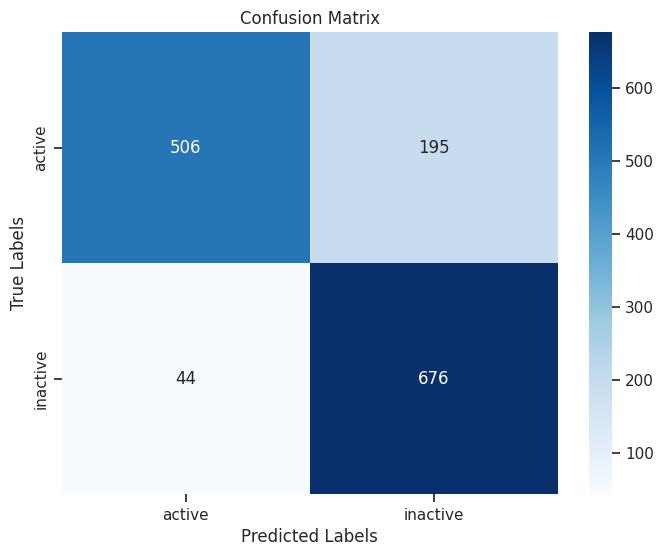

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


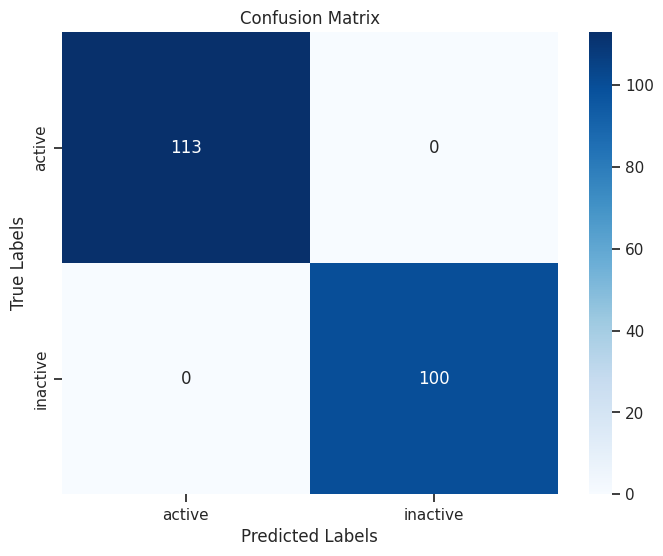

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8451794510907812
Mean Precision: 0.8696950309234379
Mean Recall: 0.8434577587573309
Mean F1-score: 0.8420823988199875


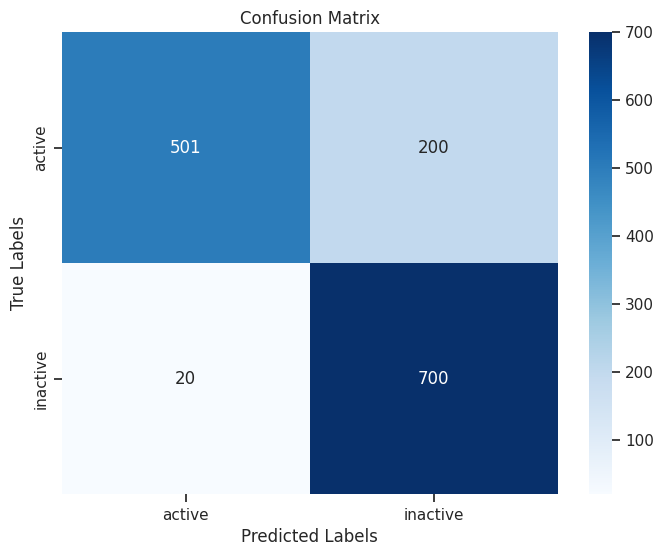

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9671361502347418
Mean Precision: 0.9708333333333333
Mean Recall: 0.9650000000000001
Mean F1-score: 0.9668438257466254


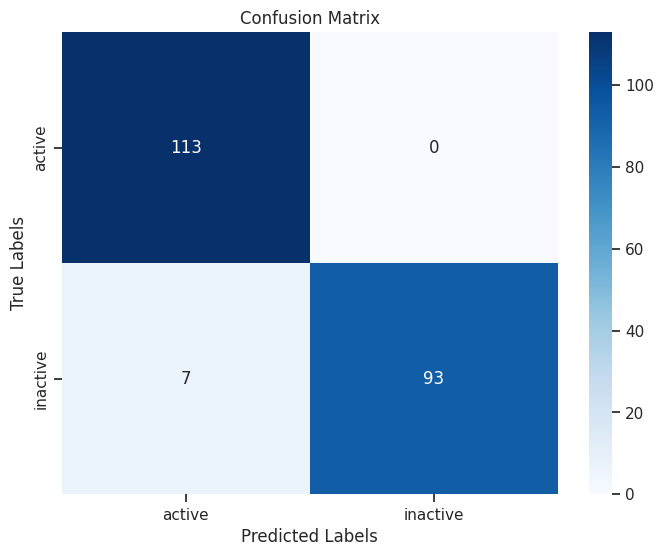

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8620689655172413
Mean Precision: 0.8740174295875873
Mean Recall: 0.8608773181169758
Mean F1-score: 0.8606578373337496


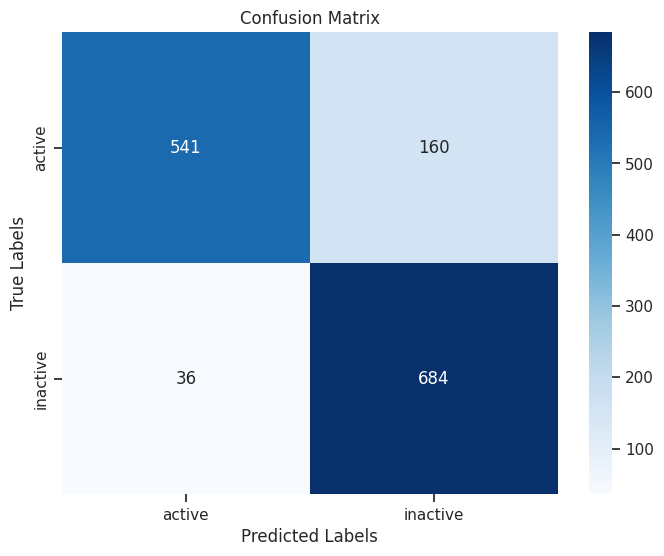

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.7746478873239436
Mean Precision: 0.8257850241545894
Mean Recall: 0.7864601769911505
Mean F1-score: 0.7697712123941632


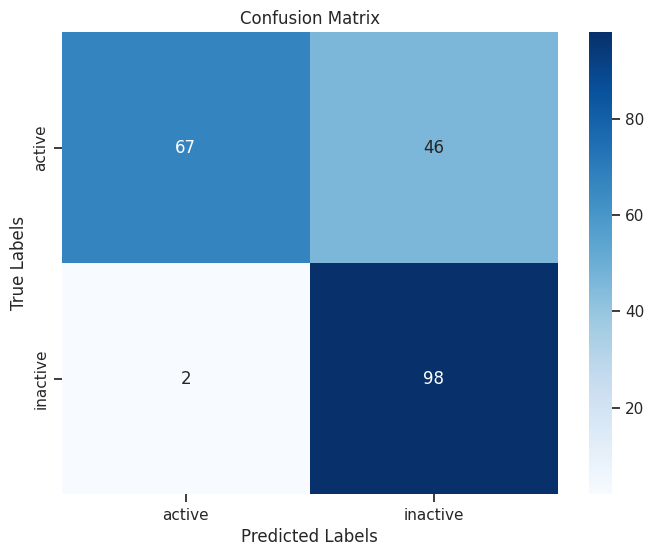

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7417311752287121
Mean Precision: 0.7777325514545246
Mean Recall: 0.7392851482009828
Mean F1-score: 0.7317578497709814


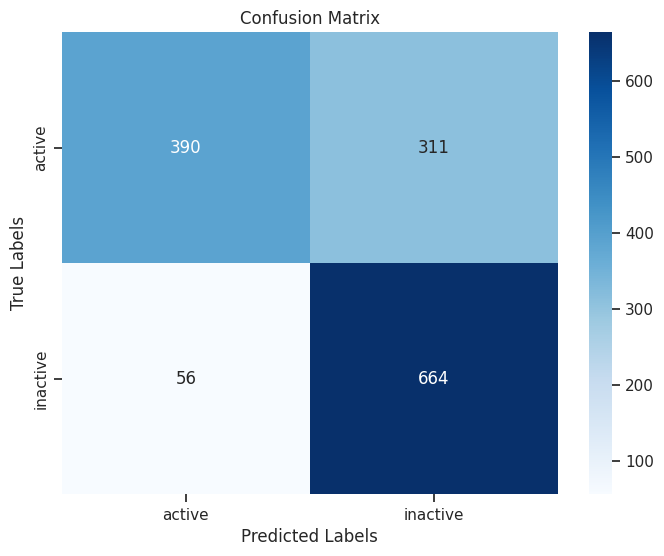

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## CDK Extended

Feature count **1024**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/cdk_extended.csv') 
df_fp

Name  ExtFP1  ExtFP2  ExtFP3  ExtFP4  ExtFP5  ExtFP6  \
0        AUTOGEN_molecule_1       0       0       1       0       1       1   
1        AUTOGEN_molecule_2       0       0       1       0       1       1   
2        AUTOGEN_molecule_3       0       0       1       0       1       1   
3        AUTOGEN_molecule_4       0       0       1       0       1       1   
4        AUTOGEN_molecule_5       0       0       1       0       1       1   
...                     ...     ...     ...     ...     ...     ...     ...   
1416  AUTOGEN_molecule_1417       0       0       0       0       0       0   
1417  AUTOGEN_molecule_1418       0       0       0       0       1       0   
1418  AUTOGEN_molecule_1419       0       0       0       0       1       0   
1419  AUTOGEN_molecule_1420       0       0       0       0       1       0   
1420  AUTOGEN_molecule_1421       0       0       0       0       1       0   

      ExtFP7  ExtFP8  ExtFP9  ...  ExtFP1015  ExtFP1016  ExtFP1017  ExtFP1018  \
0          0       0       1  ...          0          0          0          0   
1          0       0       1  ...          0          0          0          0   
2          0       0       1  ...          0          0          0          0   
3          0       0       1  ...          0          0          0          0   
4          0       0       1  ...          0          0          0          0   
...      ...     ...     ...  ...        ...        ...        ...        ...   
1416       0       0       0  ...          0          0          0          0   
1417       0       1       0  ...          1          0          0          0   
1418       0       1       0  ...          1          0          0          0   
1419       0       1       0  ...          1          0          0          0   
1420       0       1       0  ...          1          0          0          0   

      ExtFP1019  ExtFP1020  ExtFP1021  ExtFP1022  ExtFP1023  ExtFP1024  
0             0          0          0          0          0          0  
1             0          0          0          0          0          0  
2             0          0          0          0          0          0  
3             0          0          0          0          0          0  
4             0          0          0          0          0          0  
...         ...        ...        ...        ...        ...        ...  
1416          0          0          0          0          0          0  
1417          0          0          0          0          0          0  
1418          0          0          0          0          0          0  
1419          0          0          0          0          0          0  
1420          0          0          0          0          0          0  

[1421 rows x 1025 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

ExtFP1  ExtFP2  ExtFP3  ExtFP4  ExtFP5  ExtFP6  ExtFP7  ExtFP8  ExtFP9  \
0          0       0       1       0       1       1       0       0       1   
1          0       0       1       0       1       1       0       0       1   
2          0       0       1       0       1       1       0       0       1   
3          0       0       1       0       1       1       0       0       1   
4          0       0       1       0       1       1       0       0       1   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416       0       0       0       0       0       0       0       0       0   
1417       0       0       0       0       1       0       0       1       0   
1418       0       0       0       0       1       0       0       1       0   
1419       0       0       0       0       1       0       0       1       0   
1420       0       0       0       0       1       0       0       1       0   

      ExtFP10  ...  ExtFP1015  ExtFP1016  ExtFP1017  ExtFP1018  ExtFP1019  \
0           0  ...          0          0          0          0          0   
1           0  ...          0          0          0          0          0   
2           0  ...          0          0          0          0          0   
3           0  ...          0          0          0          0          0   
4           0  ...          0          0          0          0          0   
...       ...  ...        ...        ...        ...        ...        ...   
1416        0  ...          0          0          0          0          0   
1417        0  ...          1          0          0          0          0   
1418        0  ...          1          0          0          0          0   
1419        0  ...          1          0          0          0          0   
1420        0  ...          1          0          0          0          0   

      ExtFP1020  ExtFP1021  ExtFP1022  ExtFP1023  ExtFP1024  
0             0          0          0          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
1416          0          0          0          0          0  
1417          0          0          0          0          0  
1418          0          0          0          0          0  
1419          0          0          0          0          0  
1420          0          0          0          0          0  

[1421 rows x 1024 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 1024), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 601)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 601), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 601), (213,))

### Logistic Regression


Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


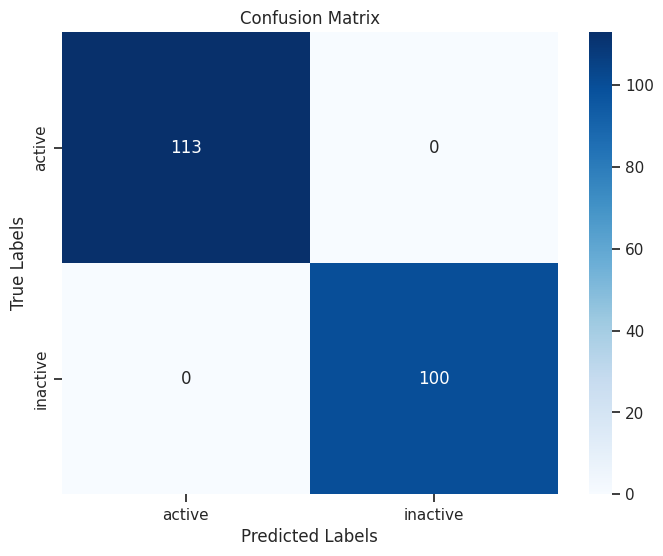

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8423645320197044
Mean Precision: 0.8655357142857143
Mean Recall: 0.8406799809795531
Mean F1-score: 0.8393390725695735


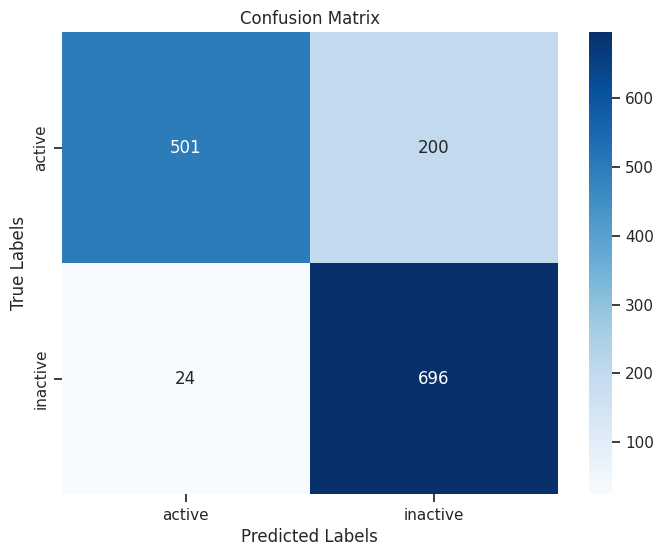

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9624413145539906
Mean Precision: 0.9669421487603306
Mean Recall: 0.96
Mean F1-score: 0.9620726495726496


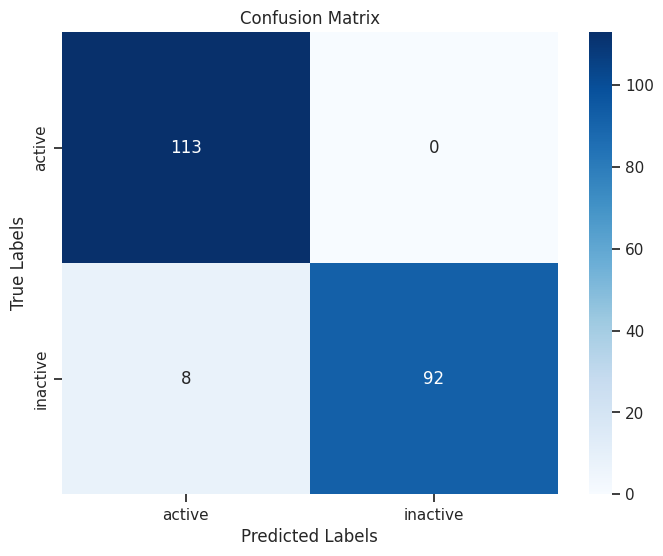

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8648838845883181
Mean Precision: 0.8667448315467075
Mean Recall: 0.8644079885877318
Mean F1-score: 0.8645828369943298


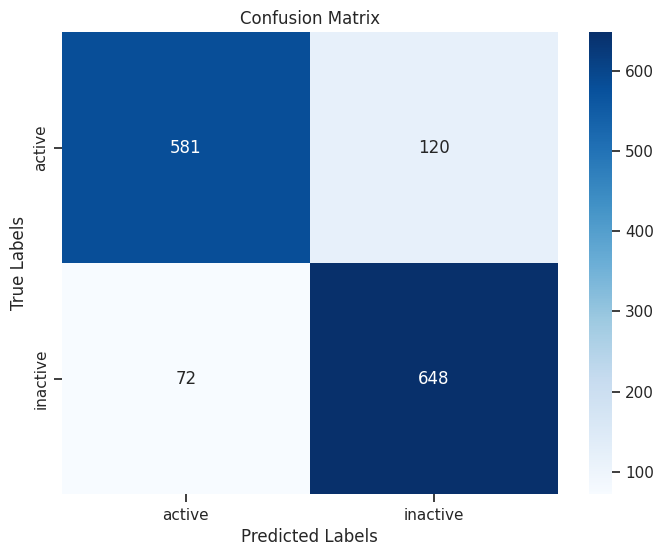

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


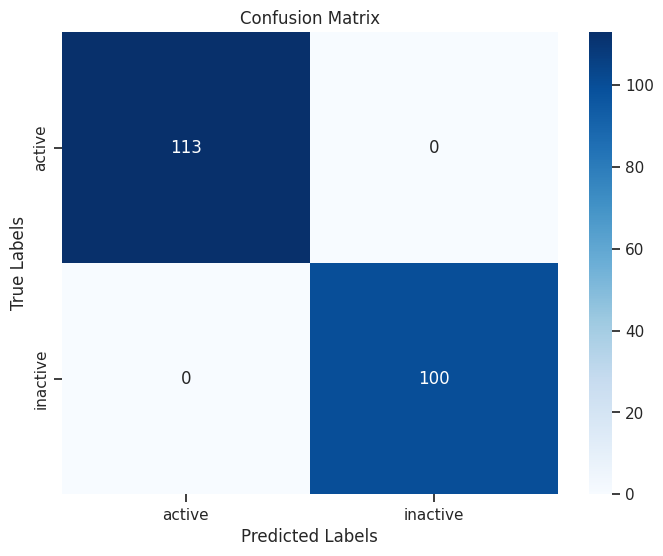

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.800844475721323
Mean Precision: 0.8237594326873989
Mean Recall: 0.7990489776509748
Mean F1-score: 0.7965692114295543


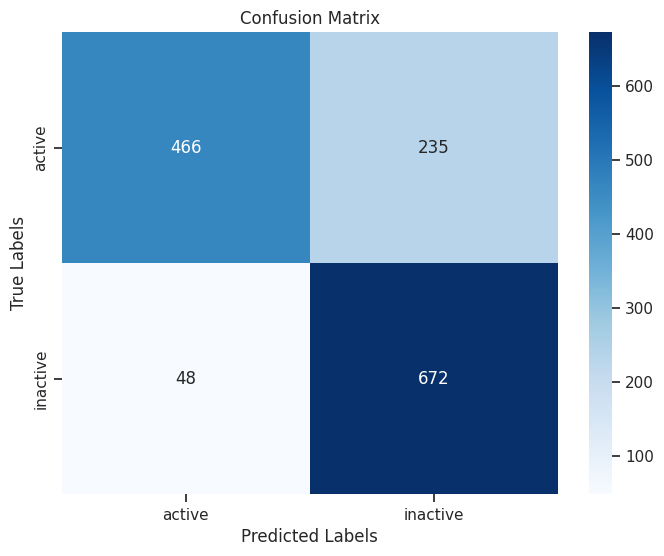

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


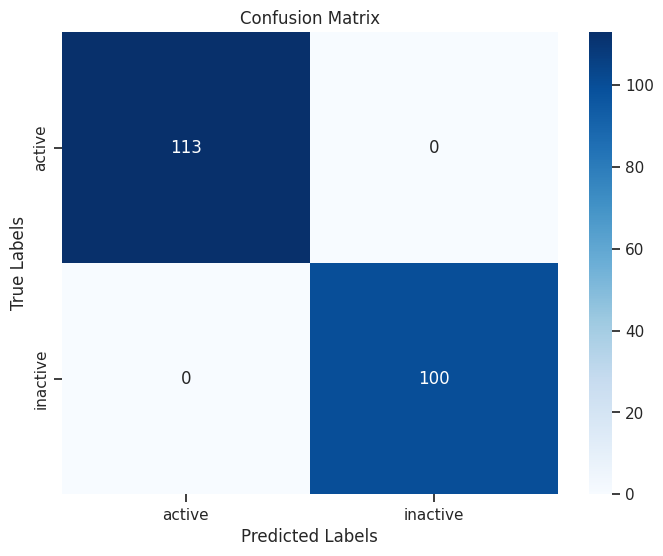

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8508092892329345
Mean Precision: 0.878171934976943
Mean Recall: 0.8490133143128864
Mean F1-score: 0.8475747726159588


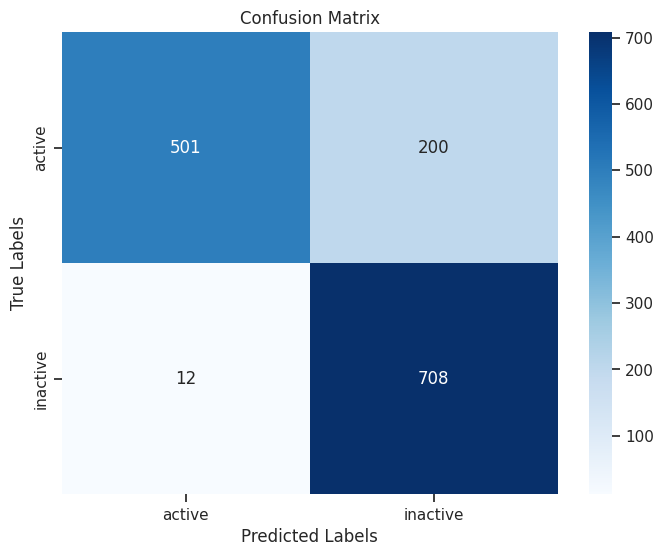

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9906103286384976
Mean Precision: 0.991304347826087
Mean Recall: 0.99
Mean F1-score: 0.9905635300372142


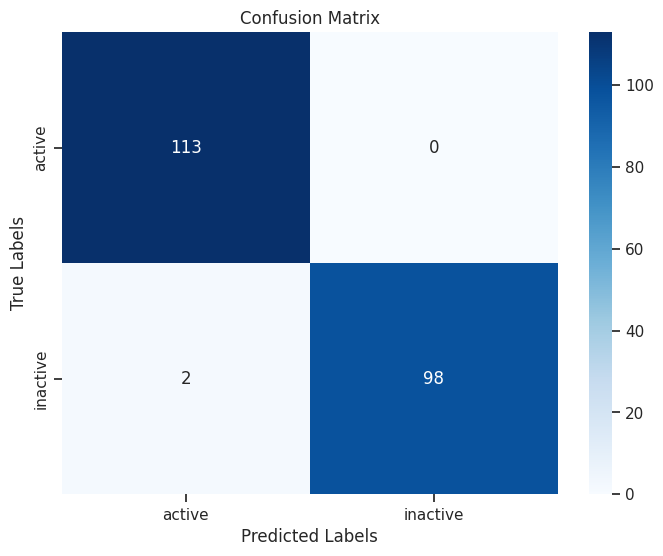

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8479943701618579
Mean Precision: 0.873906643159138
Mean Recall: 0.8462355365351086
Mean F1-score: 0.8448275862068966


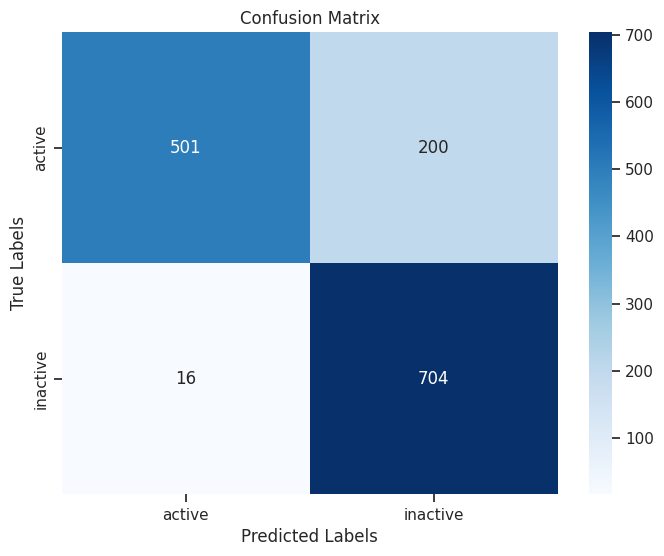

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.892018779342723
Mean Precision: 0.8989049145299146
Mean Recall: 0.896504424778761
Mean F1-score: 0.8919806848499547


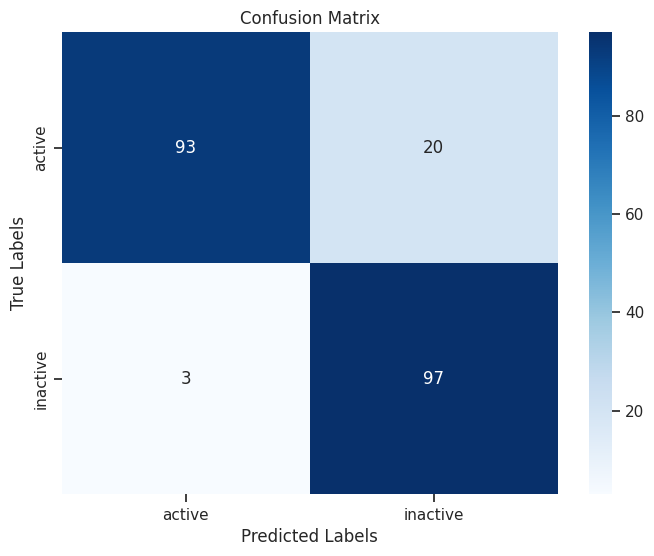

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.724841660802252
Mean Precision: 0.7820422375522175
Mean Recall: 0.7217902995720399
Mean F1-score: 0.7083402231079629


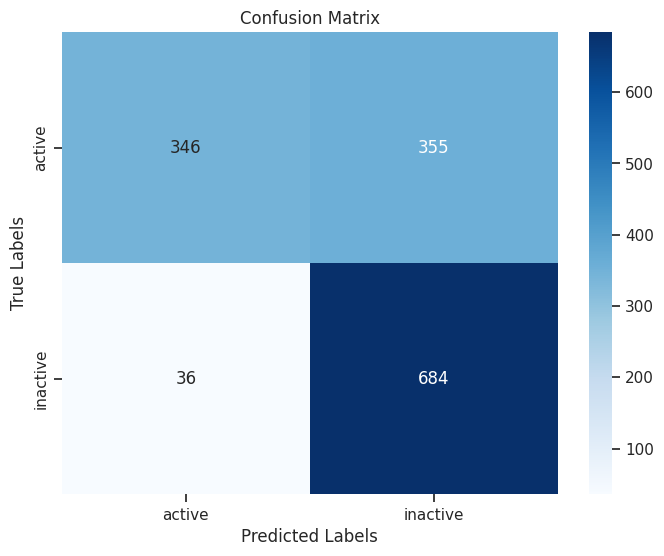

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Estate

Feature count **79**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/estate.csv') 
df_fp

Name  EStateFP1  EStateFP2  EStateFP3  EStateFP4  \
0        AUTOGEN_molecule_1          0          0          0          0   
1        AUTOGEN_molecule_2          0          0          0          0   
2        AUTOGEN_molecule_3          0          0          0          0   
3        AUTOGEN_molecule_4          0          0          0          0   
4        AUTOGEN_molecule_5          0          0          0          0   
...                     ...        ...        ...        ...        ...   
1416  AUTOGEN_molecule_1417          0          0          0          0   
1417  AUTOGEN_molecule_1418          0          0          0          0   
1418  AUTOGEN_molecule_1419          0          0          0          0   
1419  AUTOGEN_molecule_1420          0          0          0          0   
1420  AUTOGEN_molecule_1421          0          0          0          0   

      EStateFP5  EStateFP6  EStateFP7  EStateFP8  EStateFP9  ...  EStateFP70  \
0             0          0          1          0          1  ...           0   
1             0          0          1          0          1  ...           0   
2             0          0          1          0          1  ...           0   
3             0          0          1          0          1  ...           0   
4             0          0          1          0          1  ...           0   
...         ...        ...        ...        ...        ...  ...         ...   
1416          0          0          0          0          0  ...           0   
1417          0          0          1          0          1  ...           0   
1418          0          0          1          0          1  ...           0   
1419          0          0          1          0          1  ...           0   
1420          0          0          1          0          1  ...           0   

      EStateFP71  EStateFP72  EStateFP73  EStateFP74  EStateFP75  EStateFP76  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1416           0           0           0           0           0           0   
1417           0           0           0           0           1           0   
1418           0           0           0           0           1           0   
1419           0           0           0           0           1           0   
1420           0           0           0           0           1           0   

      EStateFP77  EStateFP78  EStateFP79  
0              0           0           0  
1              0           0           0  
2              0           0           0  
3              0           0           0  
4              0           0           0  
...          ...         ...         ...  
1416           0           0           0  
1417           0           0           0  
1418           0           0           0  
1419           0           0           0  
1420           0           0           0  

[1421 rows x 80 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

EStateFP1  EStateFP2  EStateFP3  EStateFP4  EStateFP5  EStateFP6  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1416          0          0          0          0          0          0   
1417          0          0          0          0          0          0   
1418          0          0          0          0          0          0   
1419          0          0          0          0          0          0   
1420          0          0          0          0          0          0   

      EStateFP7  EStateFP8  EStateFP9  EStateFP10  ...  EStateFP70  \
0             1          0          1           0  ...           0   
1             1          0          1           0  ...           0   
2             1          0          1           0  ...           0   
3             1          0          1           0  ...           0   
4             1          0          1           0  ...           0   
...         ...        ...        ...         ...  ...         ...   
1416          0          0          0           0  ...           0   
1417          1          0          1           0  ...           0   
1418          1          0          1           0  ...           0   
1419          1          0          1           0  ...           0   
1420          1          0          1           0  ...           0   

      EStateFP71  EStateFP72  EStateFP73  EStateFP74  EStateFP75  EStateFP76  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1416           0           0           0           0           0           0   
1417           0           0           0           0           1           0   
1418           0           0           0           0           1           0   
1419           0           0           0           0           1           0   
1420           0           0           0           0           1           0   

      EStateFP77  EStateFP78  EStateFP79  
0              0           0           0  
1              0           0           0  
2              0           0           0  
3              0           0           0  
4              0           0           0  
...          ...         ...         ...  
1416           0           0           0  
1417           0           0           0  
1418           0           0           0  
1419           0           0           0  
1420           0           0           0  

[1421 rows x 79 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 79), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 12)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 12), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 12), (213,))

### Logistic Regression


Mean Accuracy: 0.92018779342723
Mean Precision: 0.9346153846153846
Mean Recall: 0.915
Mean F1-score: 0.9185724886999932


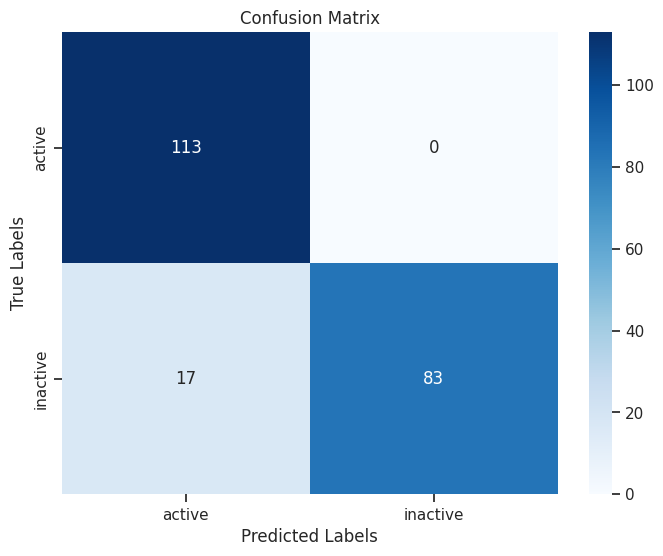

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.800844475721323
Mean Precision: 0.8008743864823933
Mean Recall: 0.8007241638928515
Mean F1-score: 0.800767120627291


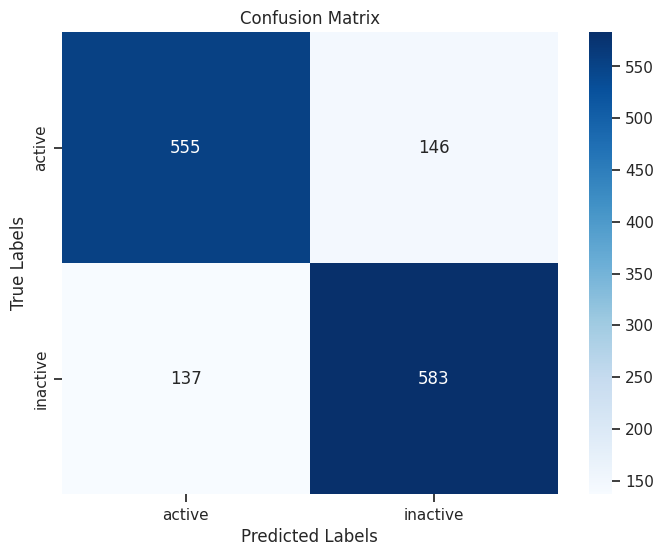

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9671361502347418
Mean Precision: 0.9708333333333333
Mean Recall: 0.9650000000000001
Mean F1-score: 0.9668438257466254


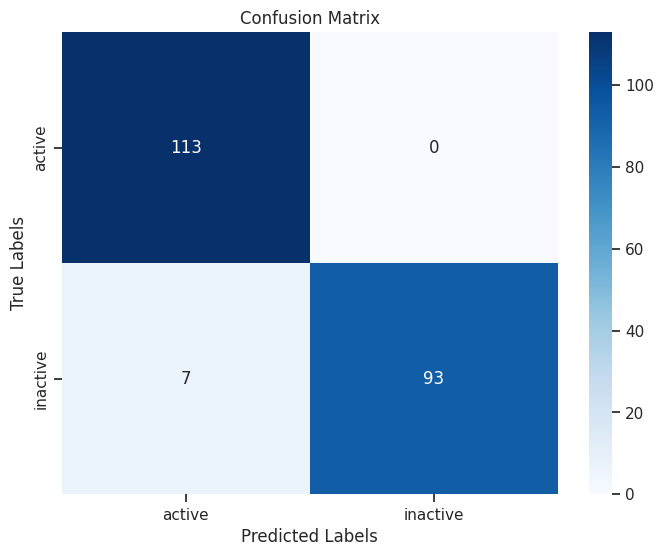

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9296270232230823
Mean Precision: 0.9298196948682386
Mean Recall: 0.9298026628625773
Mean F1-score: 0.9296269883718626


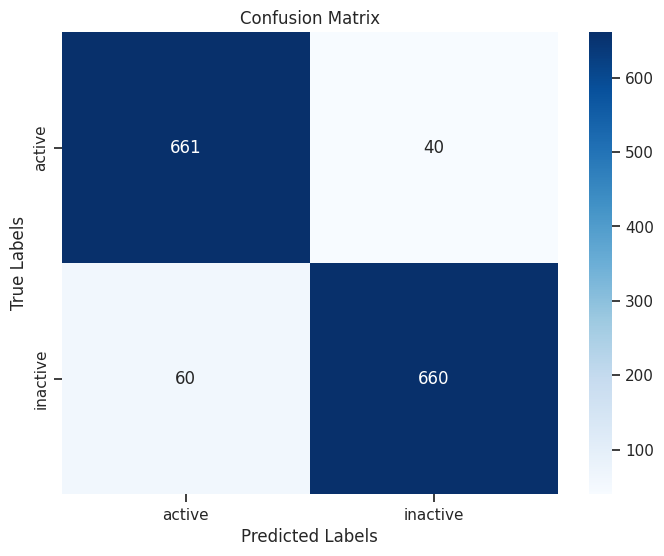

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


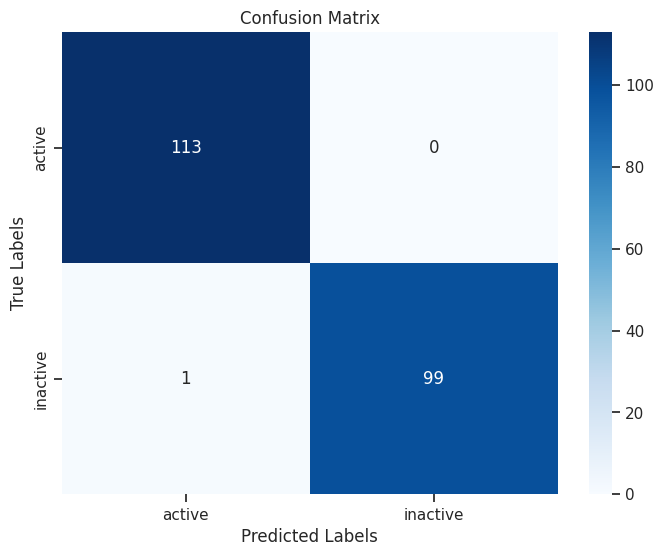

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.896551724137931
Mean Precision: 0.9025035566463948
Mean Recall: 0.8957521001743541
Mean F1-score: 0.8960159535094187


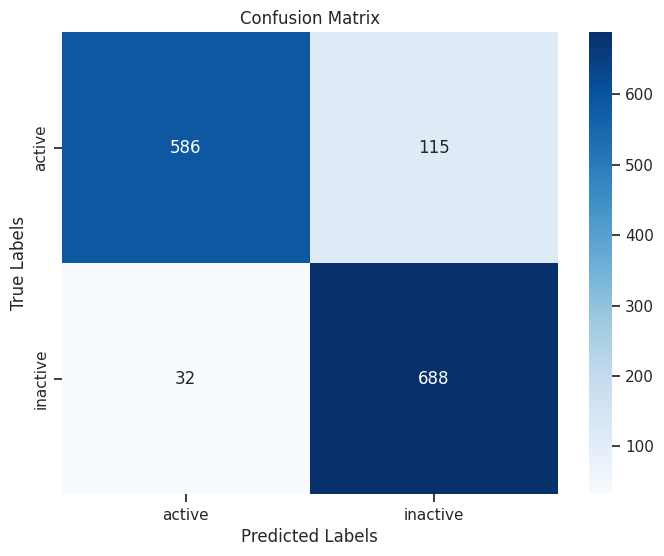

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


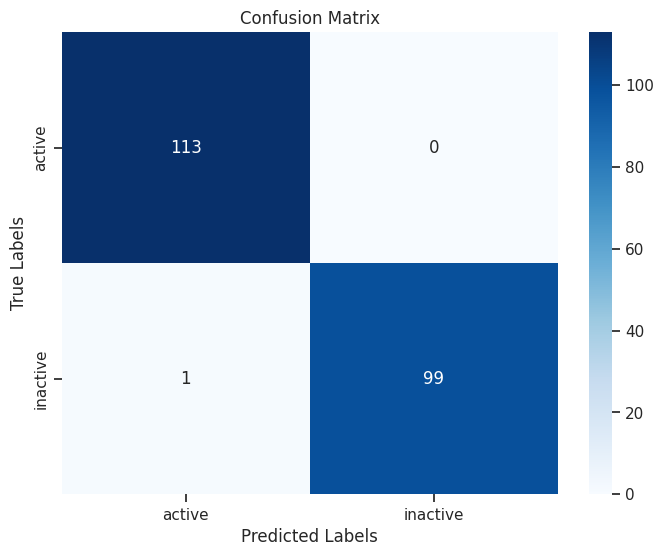

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.904292751583392
Mean Precision: 0.9137841310110422
Mean Recall: 0.9032968774766207
Mean F1-score: 0.9035702595463726


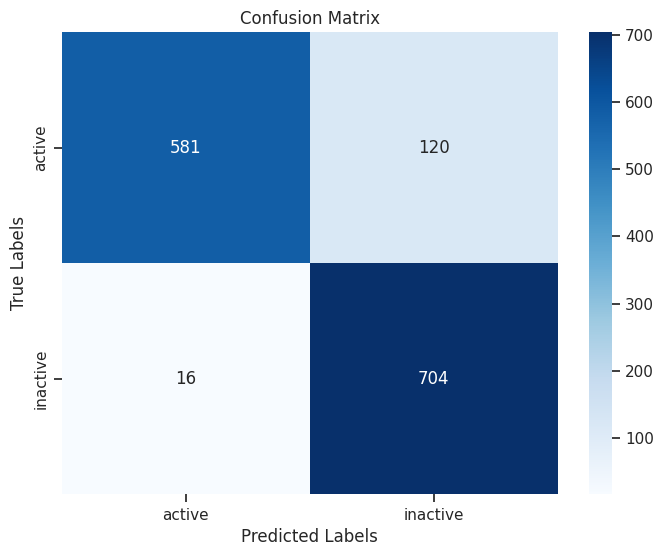

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


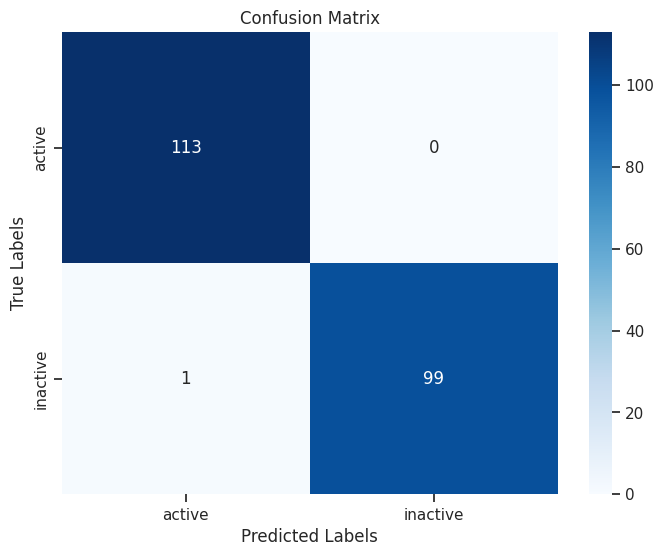

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9014778325123153
Mean Precision: 0.9101903331845298
Mean Recall: 0.9005190996988429
Mean F1-score: 0.9007820136852394


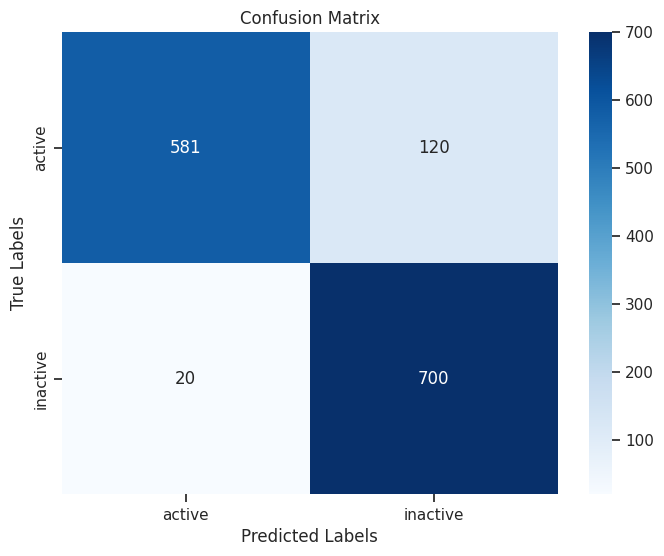

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.7464788732394366
Mean Precision: 0.8383233532934131
Mean Recall: 0.73
Mean F1-score: 0.7186399217221136


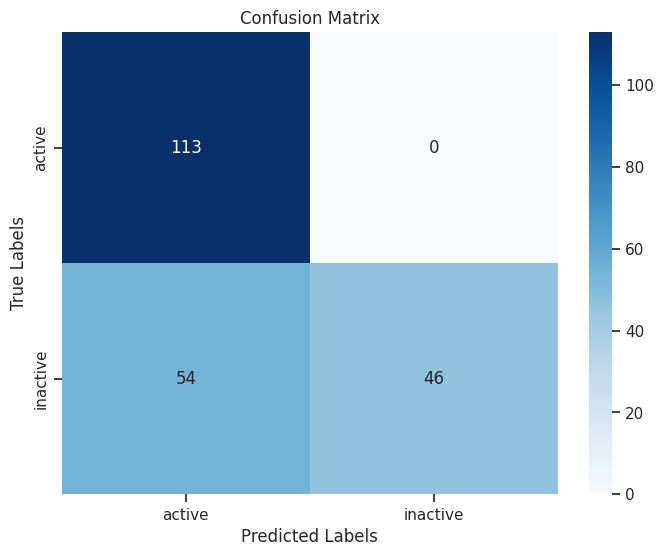

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7163969035890219
Mean Precision: 0.7501007795125443
Mean Recall: 0.7188025043588524
Mean F1-score: 0.7079258847836742


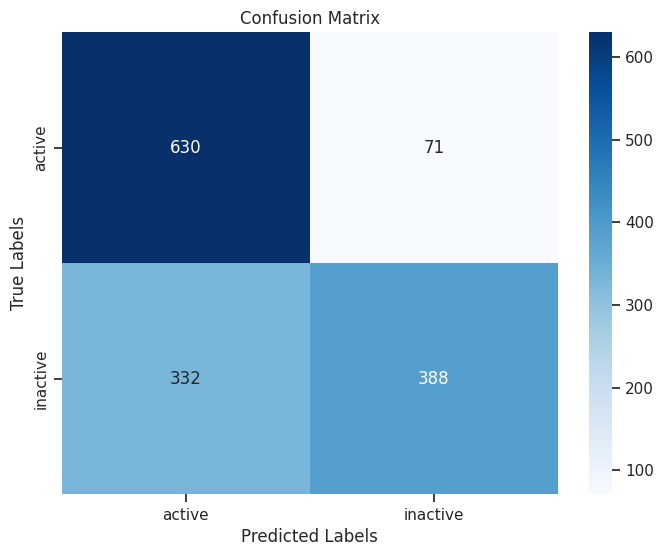

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Klekota Roth

Feature count **4860**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/klekota_roth.csv') 
df_fp

Name  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  \
0        AUTOGEN_molecule_1      1      0      0      0      0      0      0   
1        AUTOGEN_molecule_2      1      0      0      0      0      0      0   
2        AUTOGEN_molecule_3      1      0      0      0      0      0      0   
3        AUTOGEN_molecule_4      1      0      0      0      0      0      0   
4        AUTOGEN_molecule_5      1      0      0      0      0      0      0   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
1416  AUTOGEN_molecule_1417      0      0      0      0      0      0      0   
1417  AUTOGEN_molecule_1418      0      0      0      0      0      0      0   
1418  AUTOGEN_molecule_1419      0      0      0      0      0      0      0   
1419  AUTOGEN_molecule_1420      0      0      0      0      0      0      0   
1420  AUTOGEN_molecule_1421      0      0      0      0      0      0      0   

      KRFP8  KRFP9  ...  KRFP4851  KRFP4852  KRFP4853  KRFP4854  KRFP4855  \
0         0      0  ...         0         0         1         0         0   
1         0      0  ...         0         0         1         0         0   
2         0      0  ...         0         0         1         0         0   
3         0      0  ...         0         0         1         0         0   
4         0      0  ...         0         0         1         0         0   
...     ...    ...  ...       ...       ...       ...       ...       ...   
1416      0      0  ...         0         0         1         0         0   
1417      0      0  ...         0         0         0         0         0   
1418      0      0  ...         0         0         0         0         0   
1419      0      0  ...         0         0         0         0         0   
1420      0      0  ...         0         0         0         0         0   

      KRFP4856  KRFP4857  KRFP4858  KRFP4859  KRFP4860  
0            0         0         0         0         0  
1            0         0         0         0         0  
2            0         0         0         0         0  
3            0         0         0         0         0  
4            0         0         0         0         0  
...        ...       ...       ...       ...       ...  
1416         0         0         0         0         0  
1417         0         0         0         0         0  
1418         0         0         0         0         0  
1419         0         0         0         0         0  
1420         0         0         0         0         0  

[1421 rows x 4861 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  KRFP9  KRFP10  \
0         1      0      0      0      0      0      0      0      0       0   
1         1      0      0      0      0      0      0      0      0       0   
2         1      0      0      0      0      0      0      0      0       0   
3         1      0      0      0      0      0      0      0      0       0   
4         1      0      0      0      0      0      0      0      0       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1416      0      0      0      0      0      0      0      0      0       0   
1417      0      0      0      0      0      0      0      0      0       0   
1418      0      0      0      0      0      0      0      0      0       0   
1419      0      0      0      0      0      0      0      0      0       0   
1420      0      0      0      0      0      0      0      0      0       0   

      ...  KRFP4851  KRFP4852  KRFP4853  KRFP4854  KRFP4855  KRFP4856  \
0     ...         0         0         1         0         0         0   
1     ...         0         0         1         0         0         0   
2     ...         0         0         1         0         0         0   
3     ...         0         0         1         0         0         0   
4     ...         0         0         1         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
1416  ...         0         0         1         0         0         0   
1417  ...         0         0         0         0         0         0   
1418  ...         0         0         0         0         0         0   
1419  ...         0         0         0         0         0         0   
1420  ...         0         0         0         0         0         0   

      KRFP4857  KRFP4858  KRFP4859  KRFP4860  
0            0         0         0         0  
1            0         0         0         0  
2            0         0         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
1416         0         0         0         0  
1417         0         0         0         0  
1418         0         0         0         0  
1419         0         0         0         0  
1420         0         0         0         0  

[1421 rows x 4860 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 4860), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 48)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 48), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 48), (213,))

### Logistic Regression


Mean Accuracy: 0.9812206572769953
Mean Precision: 0.982905982905983
Mean Recall: 0.98
Mean F1-score: 0.9811002661934338


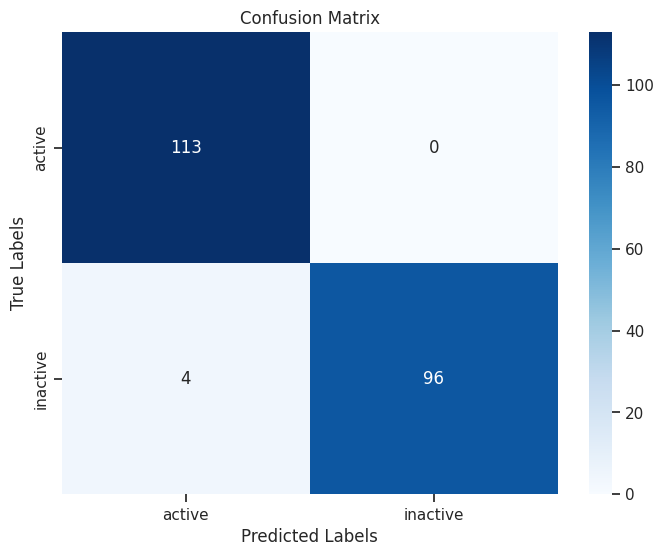

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.884588318085855
Mean Precision: 0.8894231155778894
Mean Recall: 0.8838524330321762
Mean F1-score: 0.884070169573817


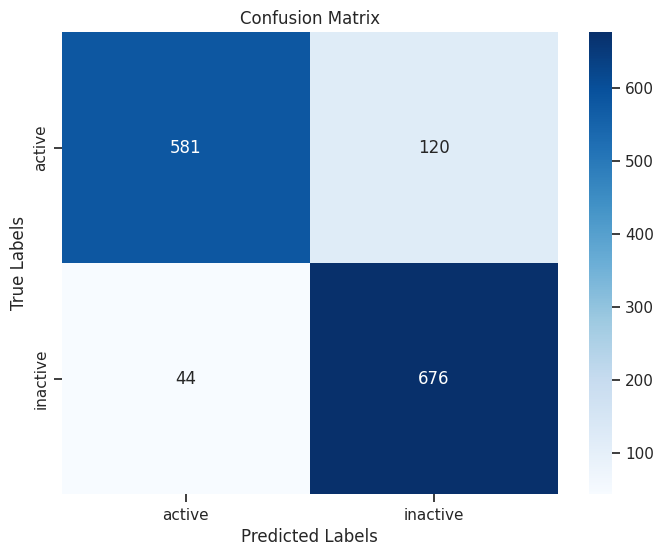

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.971830985915493
Mean Precision: 0.9747899159663865
Mean Recall: 0.97
Mean F1-score: 0.9716050479914682


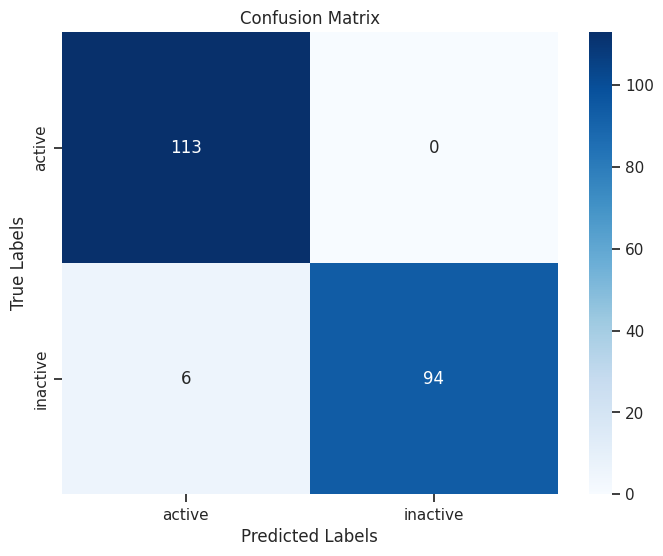

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9437016185784659
Mean Precision: 0.9436915517514661
Mean Recall: 0.9436915517514661
Mean F1-score: 0.9436915517514661


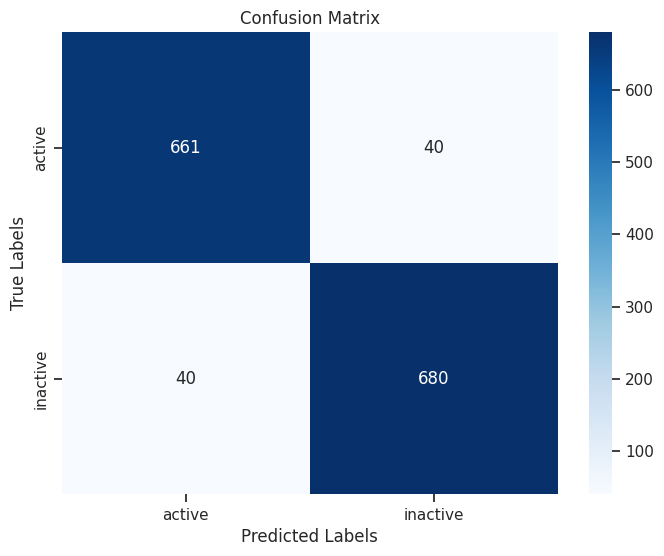

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


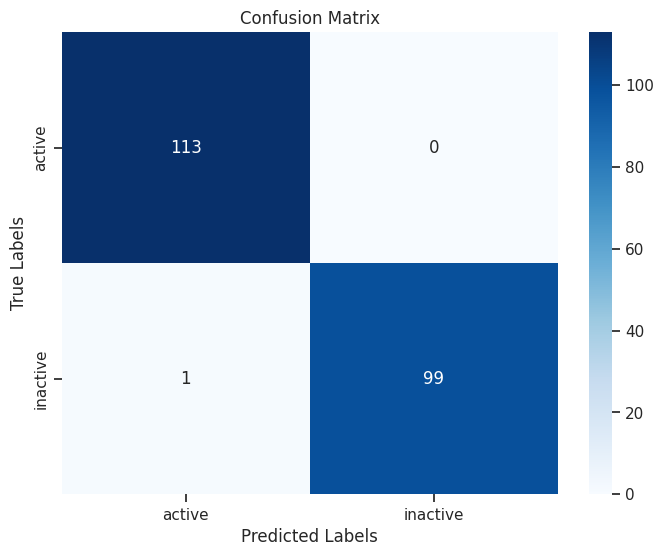

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8958479943701618
Mean Precision: 0.90311986863711
Mean Recall: 0.8949635441432874
Mean F1-score: 0.8952085783190162


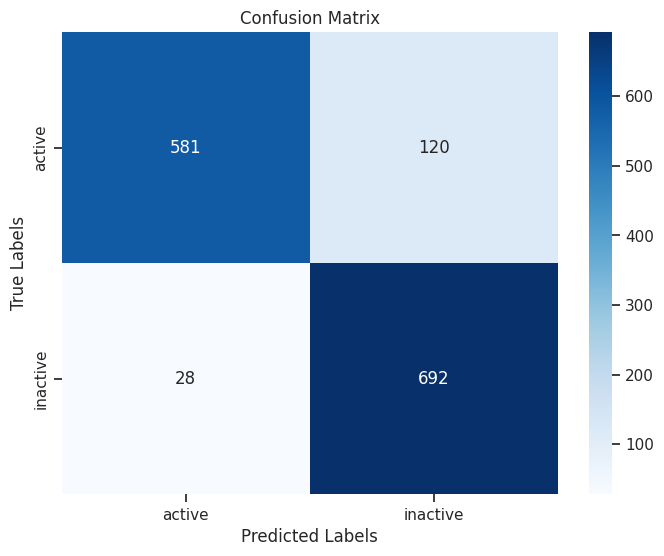

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


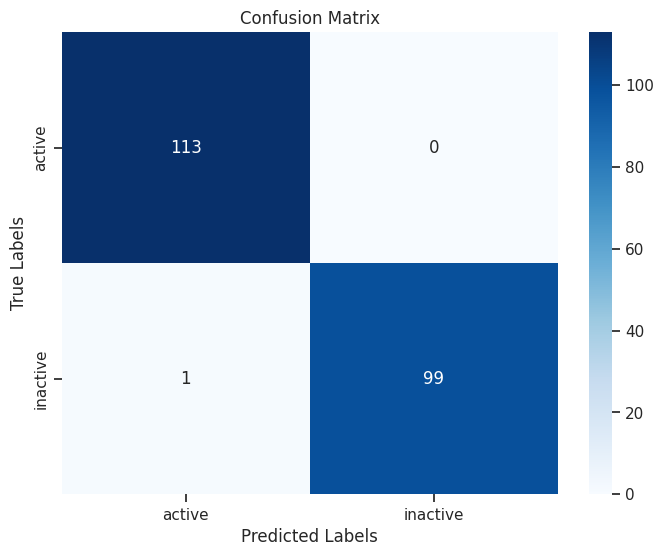

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.904292751583392
Mean Precision: 0.9137841310110422
Mean Recall: 0.9032968774766207
Mean F1-score: 0.9035702595463726


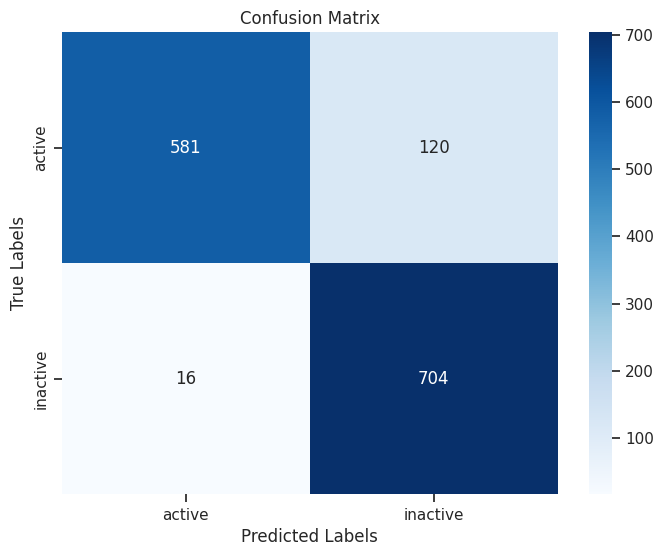

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9859154929577465
Mean Precision: 0.9870689655172413
Mean Recall: 0.985
Mean F1-score: 0.9858355684614191


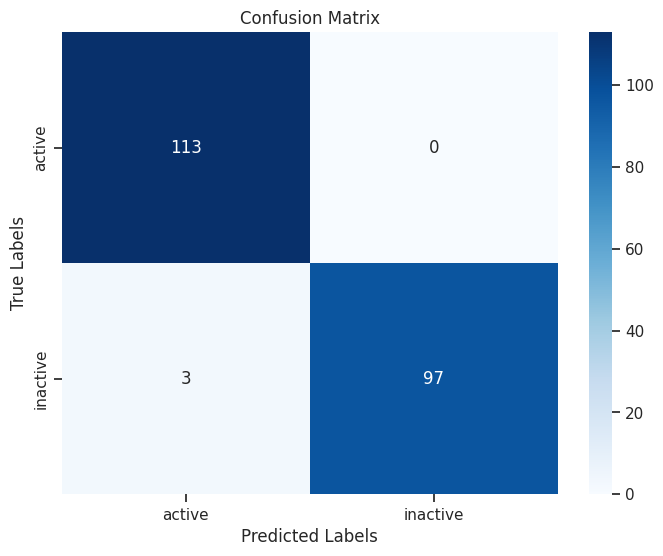

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9014778325123153
Mean Precision: 0.9101903331845298
Mean Recall: 0.9005190996988429
Mean F1-score: 0.9007820136852394


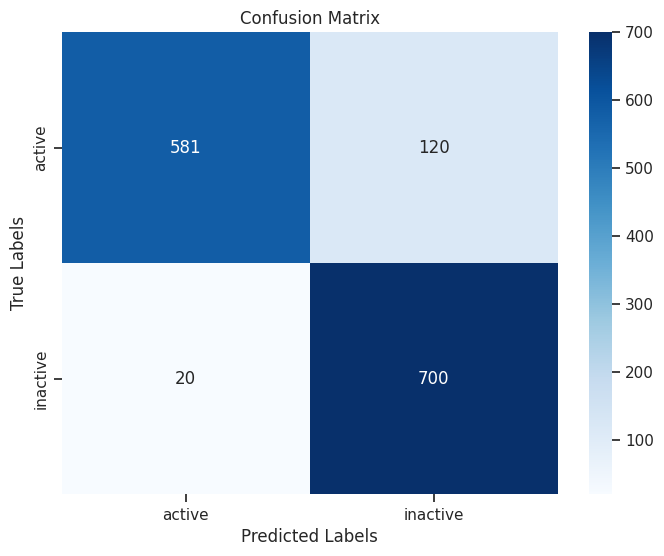

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.8356807511737089
Mean Precision: 0.8356292214717383
Mean Recall: 0.8342035398230089
Mean F1-score: 0.8347482987165562


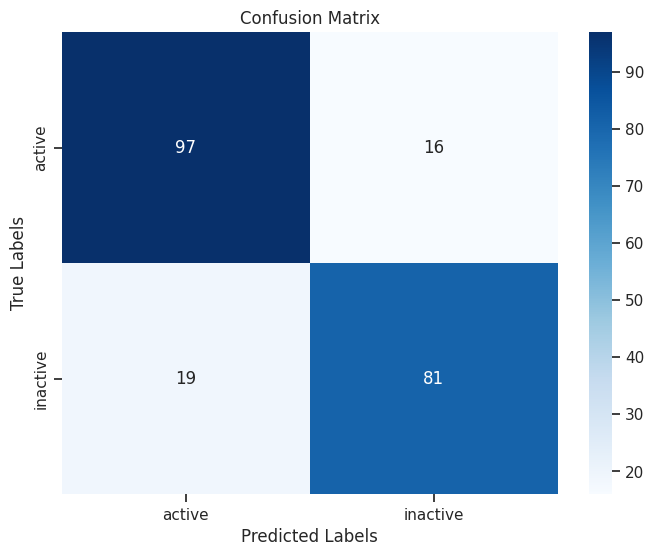

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7297677691766362
Mean Precision: 0.7339329120077783
Mean Recall: 0.7288159771754636
Mean F1-score: 0.7279862174578868


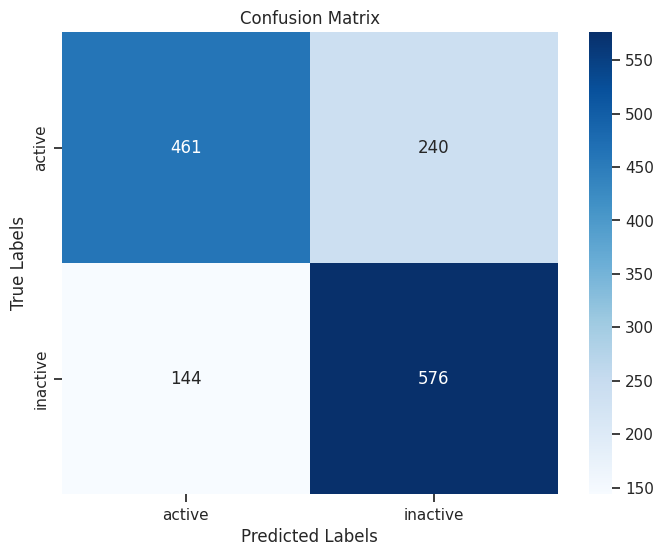

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Klekota Roth Count

Feature count **4860**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/klekota_roth_count.csv') 
df_fp

Name  KRFPC1  KRFPC2  KRFPC3  KRFPC4  KRFPC5  KRFPC6  \
0        AUTOGEN_molecule_1     1.0     0.0     0.0     0.0     0.0     0.0   
1        AUTOGEN_molecule_2     1.0     0.0     0.0     0.0     0.0     0.0   
2        AUTOGEN_molecule_3     1.0     0.0     0.0     0.0     0.0     0.0   
3        AUTOGEN_molecule_4     1.0     0.0     0.0     0.0     0.0     0.0   
4        AUTOGEN_molecule_5     1.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
1416  AUTOGEN_molecule_1417     0.0     0.0     0.0     0.0     0.0     0.0   
1417  AUTOGEN_molecule_1418     0.0     0.0     0.0     0.0     0.0     0.0   
1418  AUTOGEN_molecule_1419     0.0     0.0     0.0     0.0     0.0     0.0   
1419  AUTOGEN_molecule_1420     0.0     0.0     0.0     0.0     0.0     0.0   
1420  AUTOGEN_molecule_1421     0.0     0.0     0.0     0.0     0.0     0.0   

      KRFPC7  KRFPC8  KRFPC9  ...  KRFPC4851  KRFPC4852  KRFPC4853  KRFPC4854  \
0        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
1        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
2        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
3        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
4        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
...      ...     ...     ...  ...        ...        ...        ...        ...   
1416     0.0     0.0     0.0  ...        0.0        0.0        2.0        0.0   
1417     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1418     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1419     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1420     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   

      KRFPC4855  KRFPC4856  KRFPC4857  KRFPC4858  KRFPC4859  KRFPC4860  
0           0.0        0.0        0.0        0.0        0.0        0.0  
1           0.0        0.0        0.0        0.0        0.0        0.0  
2           0.0        0.0        0.0        0.0        0.0        0.0  
3           0.0        0.0        0.0        0.0        0.0        0.0  
4           0.0        0.0        0.0        0.0        0.0        0.0  
...         ...        ...        ...        ...        ...        ...  
1416        0.0        0.0        0.0        0.0        0.0        0.0  
1417        0.0        0.0        0.0        0.0        0.0        0.0  
1418        0.0        0.0        0.0        0.0        0.0        0.0  
1419        0.0        0.0        0.0        0.0        0.0        0.0  
1420        0.0        0.0        0.0        0.0        0.0        0.0  

[1421 rows x 4861 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

KRFPC1  KRFPC2  KRFPC3  KRFPC4  KRFPC5  KRFPC6  KRFPC7  KRFPC8  KRFPC9  \
0        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1417     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1418     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1419     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1420     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      KRFPC10  ...  KRFPC4851  KRFPC4852  KRFPC4853  KRFPC4854  KRFPC4855  \
0         0.0  ...        0.0        0.0        1.0        0.0        0.0   
1         0.0  ...        0.0        0.0        1.0        0.0        0.0   
2         0.0  ...        0.0        0.0        1.0        0.0        0.0   
3         0.0  ...        0.0        0.0        1.0        0.0        0.0   
4         0.0  ...        0.0        0.0        1.0        0.0        0.0   
...       ...  ...        ...        ...        ...        ...        ...   
1416      0.0  ...        0.0        0.0        2.0        0.0        0.0   
1417      0.0  ...        0.0        0.0        0.0        0.0        0.0   
1418      0.0  ...        0.0        0.0        0.0        0.0        0.0   
1419      0.0  ...        0.0        0.0        0.0        0.0        0.0   
1420      0.0  ...        0.0        0.0        0.0        0.0        0.0   

      KRFPC4856  KRFPC4857  KRFPC4858  KRFPC4859  KRFPC4860  
0           0.0        0.0        0.0        0.0        0.0  
1           0.0        0.0        0.0        0.0        0.0  
2           0.0        0.0        0.0        0.0        0.0  
3           0.0        0.0        0.0        0.0        0.0  
4           0.0        0.0        0.0        0.0        0.0  
...         ...        ...        ...        ...        ...  
1416        0.0        0.0        0.0        0.0        0.0  
1417        0.0        0.0        0.0        0.0        0.0  
1418        0.0        0.0        0.0        0.0        0.0  
1419        0.0        0.0        0.0        0.0        0.0  
1420        0.0        0.0        0.0        0.0        0.0  

[1421 rows x 4860 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 4860), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 172)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 172), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 172), (213,))

### Logistic Regression


Mean Accuracy: 0.9906103286384976
Mean Precision: 0.991304347826087
Mean Recall: 0.99
Mean F1-score: 0.9905635300372142


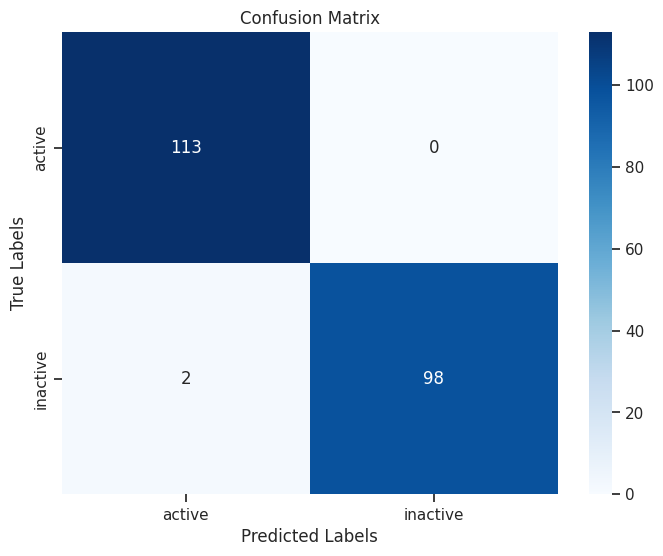

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8536242083040113
Mean Precision: 0.863099124983675
Mean Recall: 0.8525439847836425
Mean F1-score: 0.8523695356828898


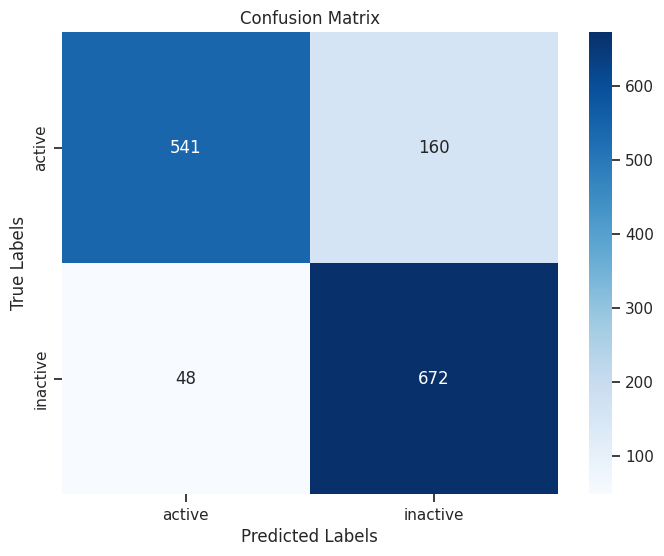

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9483568075117371
Mean Precision: 0.9556451612903225
Mean Recall: 0.9450000000000001
Mean F1-score: 0.9476927198446186


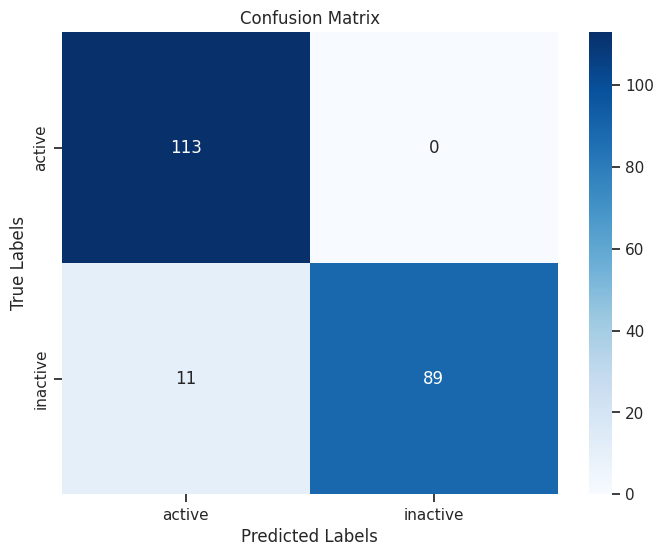

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.872624912033779
Mean Precision: 0.8754703889881987
Mean Recall: 0.8720468774766207
Mean F1-score: 0.872239969361555


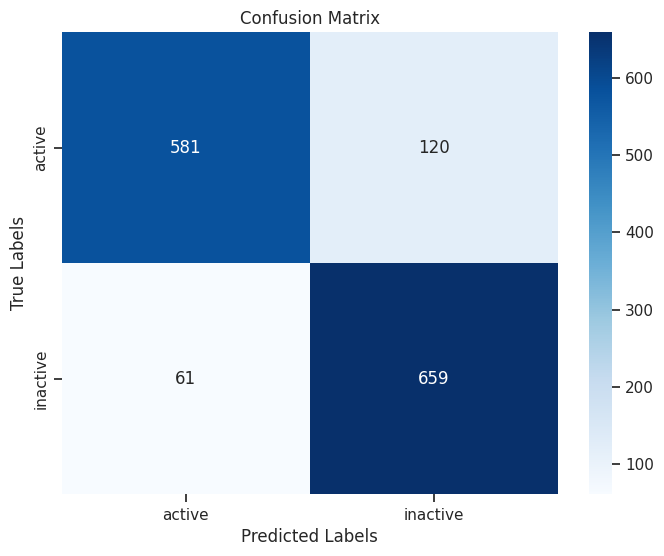

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


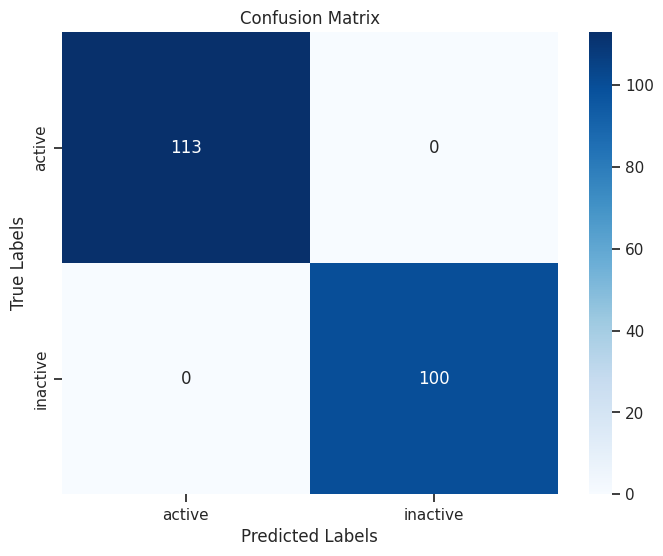

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9071076706544687
Mean Precision: 0.9078910775440799
Mean Recall: 0.9068275479473769
Mean F1-score: 0.9070059374367884


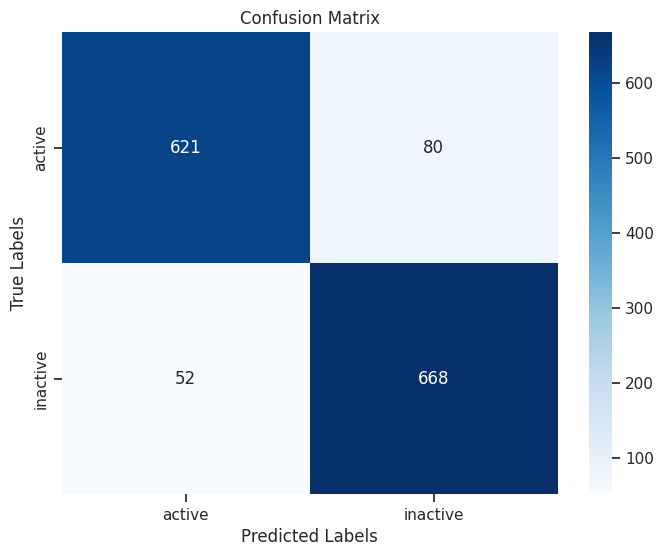

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


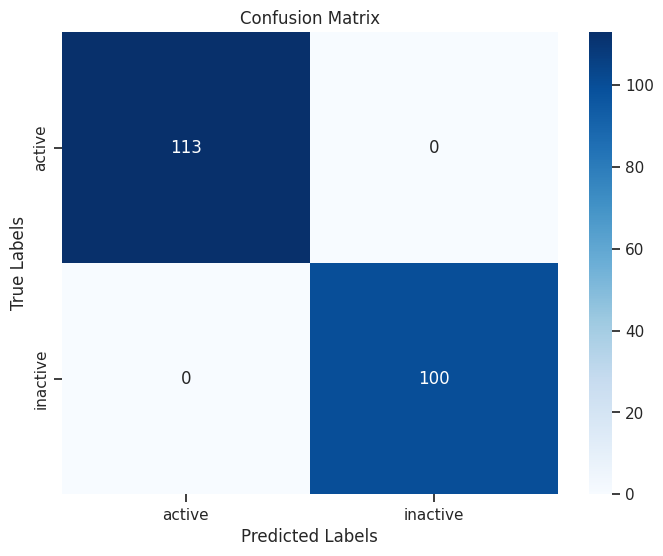

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9099225897255454
Mean Precision: 0.9210934439075356
Mean Recall: 0.9088524330321763
Mean F1-score: 0.9091504834971629


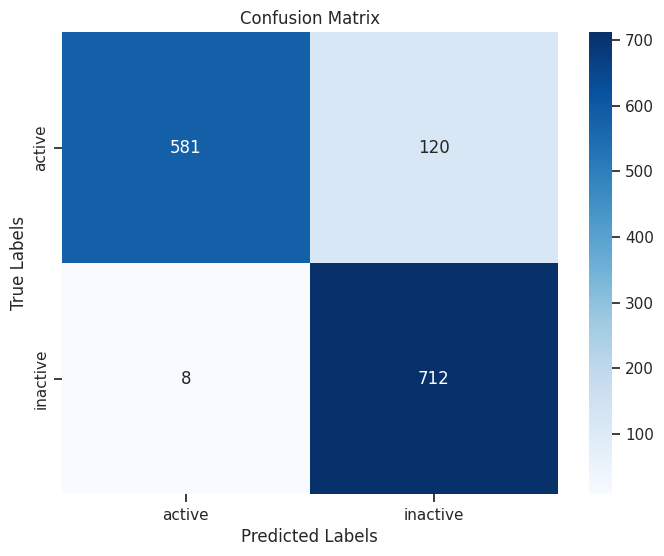

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.92018779342723
Mean Precision: 0.9346153846153846
Mean Recall: 0.915
Mean F1-score: 0.9185724886999932


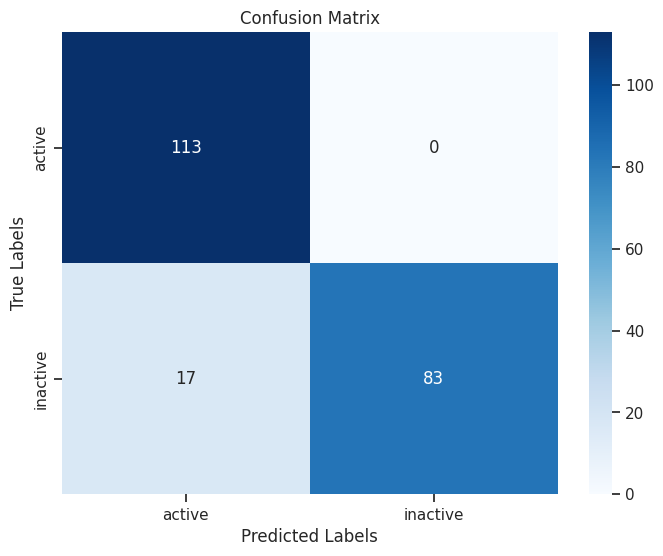

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8071780436312456
Mean Precision: 0.807922961596125
Mean Recall: 0.8068235853542558
Mean F1-score: 0.8069094321058186


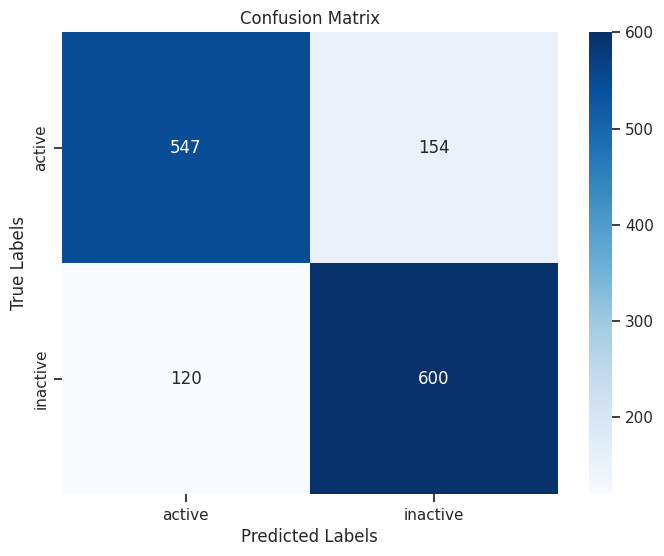

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.9154929577464789
Mean Precision: 0.9312977099236641
Mean Recall: 0.9099999999999999
Mean F1-score: 0.9136642046478112


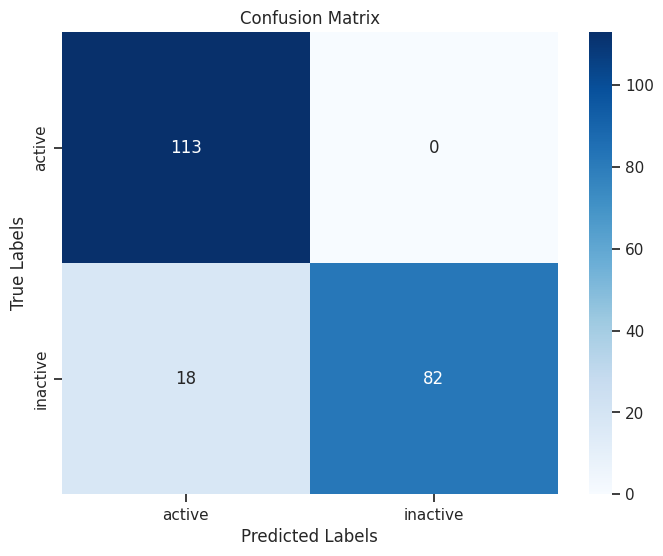

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8282899366643209
Mean Precision: 0.8282578549070883
Mean Recall: 0.8282968774766206
Mean F1-score: 0.8282708012219814


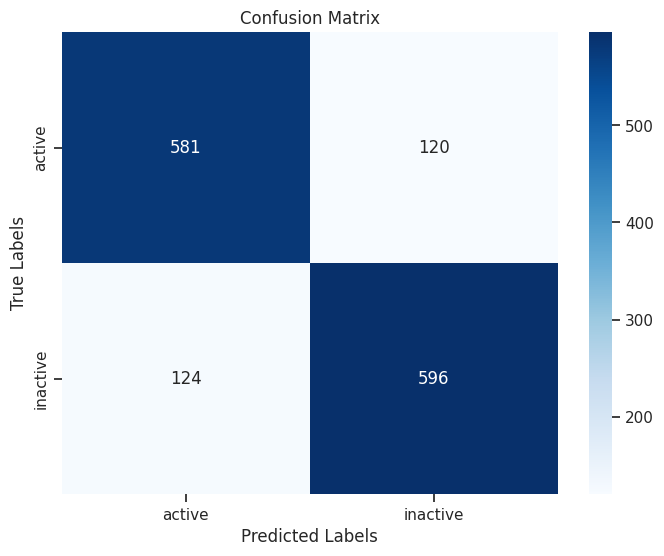

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## MACCS

Feature count **166**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/maccs.csv') 
df_fp

Name  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
0        AUTOGEN_molecule_1         0         0         0         0         0   
1        AUTOGEN_molecule_2         0         0         0         0         0   
2        AUTOGEN_molecule_3         0         0         0         0         0   
3        AUTOGEN_molecule_4         0         0         0         0         0   
4        AUTOGEN_molecule_5         0         0         0         0         0   
...                     ...       ...       ...       ...       ...       ...   
1416  AUTOGEN_molecule_1417         0         0         0         0         0   
1417  AUTOGEN_molecule_1418         0         0         0         0         0   
1418  AUTOGEN_molecule_1419         0         0         0         0         0   
1419  AUTOGEN_molecule_1420         0         0         0         0         0   
1420  AUTOGEN_molecule_1421         0         0         0         0         0   

      MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  ...  MACCSFP157  MACCSFP158  \
0            0         0         0         0  ...           0           1   
1            0         0         0         0  ...           0           1   
2            0         0         0         0  ...           0           1   
3            0         0         0         0  ...           0           1   
4            0         0         0         0  ...           0           1   
...        ...       ...       ...       ...  ...         ...         ...   
1416         0         0         0         0  ...           0           1   
1417         0         0         0         0  ...           0           1   
1418         0         0         0         0  ...           0           1   
1419         0         0         0         0  ...           0           1   
1420         0         0         0         0  ...           0           1   

      MACCSFP159  MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  \
0              1           1           1           1           1           1   
1              1           1           1           1           1           1   
2              1           1           1           1           1           1   
3              1           1           1           1           1           1   
4              1           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
1416           1           0           1           1           1           1   
1417           1           1           1           1           1           1   
1418           1           1           1           1           1           1   
1419           1           1           1           1           1           1   
1420           1           1           1           1           1           1   

      MACCSFP165  MACCSFP166  
0              1           0  
1              1           0  
2              1           0  
3              1           0  
4              1           0  
...          ...         ...  
1416           1           0  
1417           1           0  
1418           1           0  
1419           1           0  
1420           1           0  

[1421 rows x 167 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  MACCSFP7  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
1416         0         0         0         0         0         0         0   
1417         0         0         0         0         0         0         0   
1418         0         0         0         0         0         0         0   
1419         0         0         0         0         0         0         0   
1420         0         0         0         0         0         0         0   

      MACCSFP8  MACCSFP9  MACCSFP10  ...  MACCSFP157  MACCSFP158  MACCSFP159  \
0            0         0          0  ...           0           1           1   
1            0         0          0  ...           0           1           1   
2            0         0          0  ...           0           1           1   
3            0         0          0  ...           0           1           1   
4            0         0          0  ...           0           1           1   
...        ...       ...        ...  ...         ...         ...         ...   
1416         0         0          0  ...           0           1           1   
1417         0         0          0  ...           0           1           1   
1418         0         0          0  ...           0           1           1   
1419         0         0          0  ...           0           1           1   
1420         0         0          0  ...           0           1           1   

      MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  \
0              1           1           1           1           1           1   
1              1           1           1           1           1           1   
2              1           1           1           1           1           1   
3              1           1           1           1           1           1   
4              1           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
1416           0           1           1           1           1           1   
1417           1           1           1           1           1           1   
1418           1           1           1           1           1           1   
1419           1           1           1           1           1           1   
1420           1           1           1           1           1           1   

      MACCSFP166  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
1416           0  
1417           0  
1418           0  
1419           0  
1420           0  

[1421 rows x 166 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 166), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 72)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 72), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 72), (213,))

### Logistic Regression


Mean Accuracy: 0.9859154929577465
Mean Precision: 0.9870689655172413
Mean Recall: 0.985
Mean F1-score: 0.9858355684614191


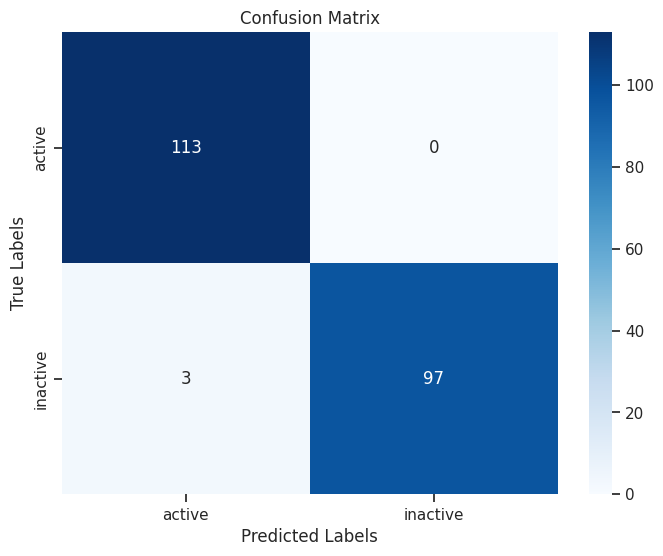

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9099225897255454
Mean Precision: 0.9109340711764145
Mean Recall: 0.9096053257251546
Mean F1-score: 0.9098064106632815


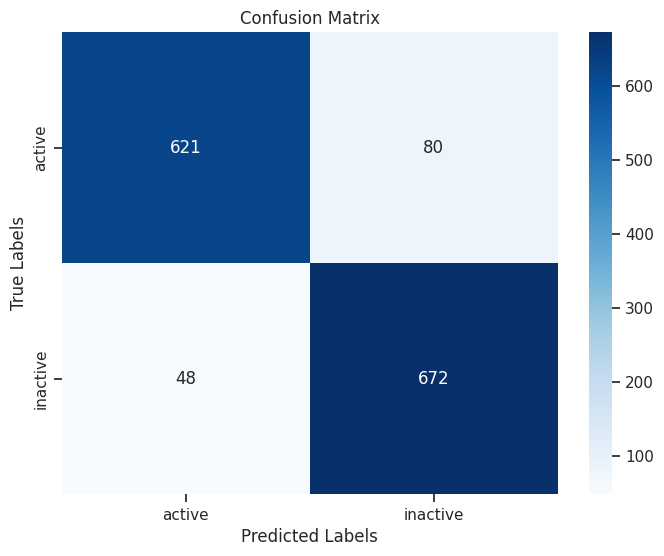

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9530516431924883
Mean Precision: 0.959349593495935
Mean Recall: 0.95
Mean F1-score: 0.9524977698483497


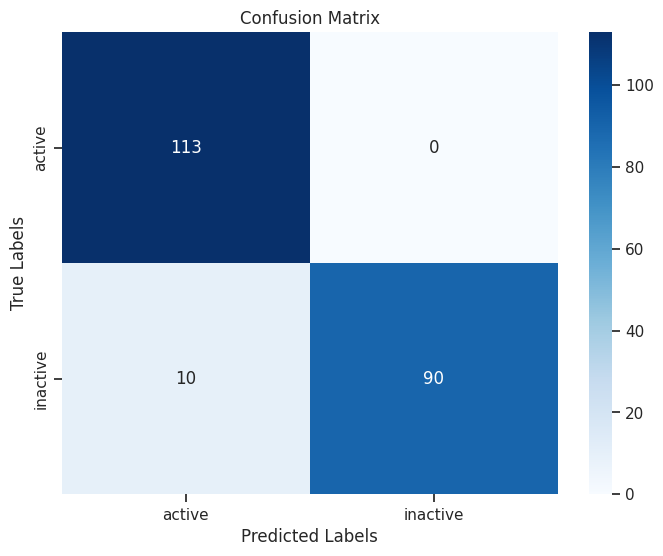

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8902181562280085
Mean Precision: 0.8902320124923706
Mean Recall: 0.8901608812807101
Mean F1-score: 0.890189388085076


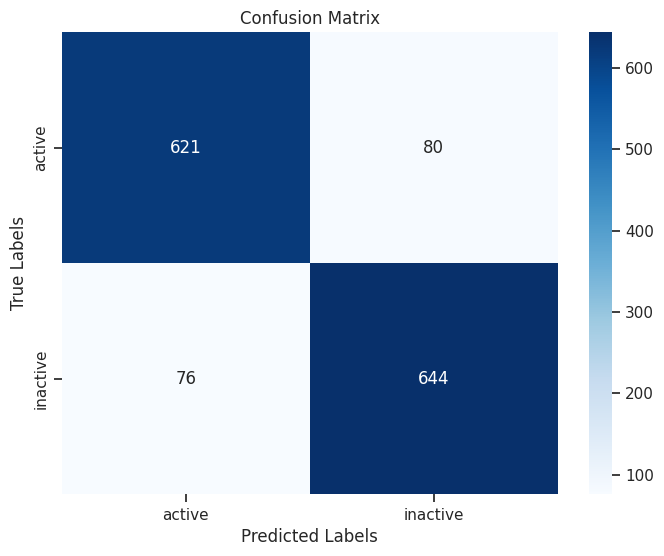

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


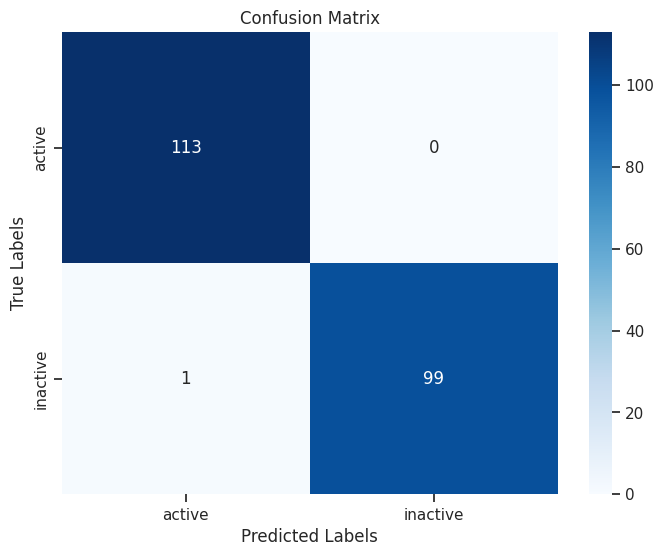

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8543279380717804
Mean Precision: 0.8623540599080775
Mean Recall: 0.8533325408147092
Mean F1-score: 0.8532462031464455


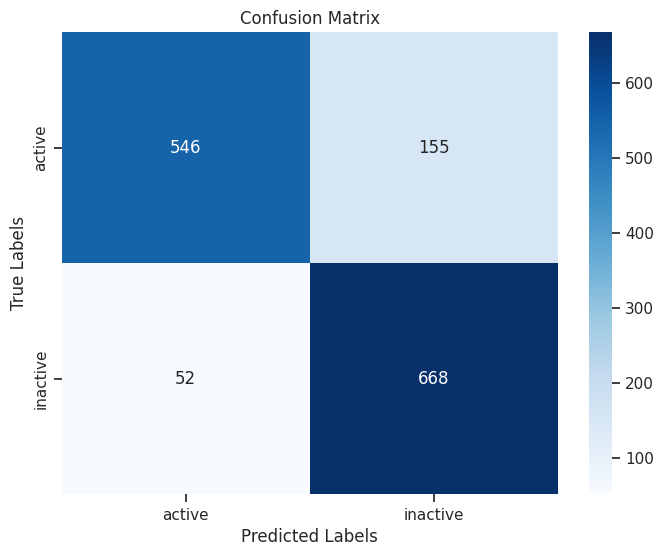

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


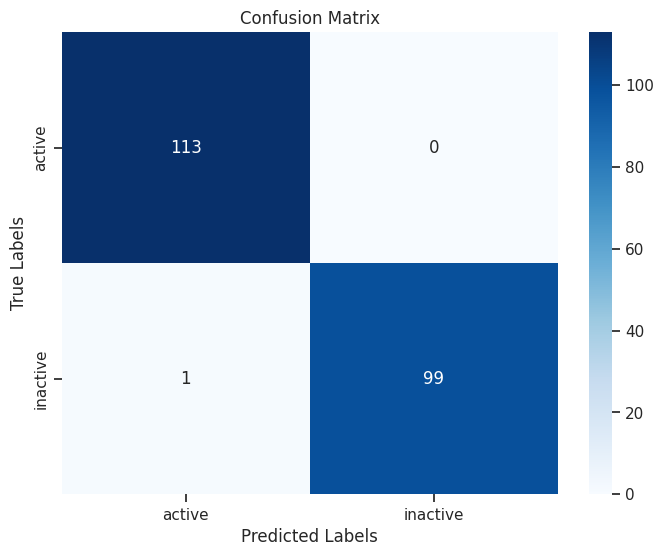

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8740323715693173
Mean Precision: 0.8878780382212876
Mean Recall: 0.8727769852591536
Mean F1-score: 0.8726129227576336


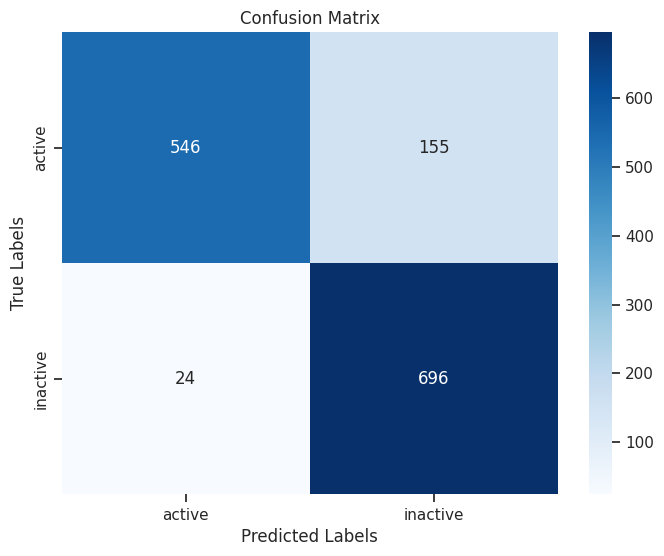

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9812206572769953
Mean Precision: 0.982905982905983
Mean Recall: 0.98
Mean F1-score: 0.9811002661934338


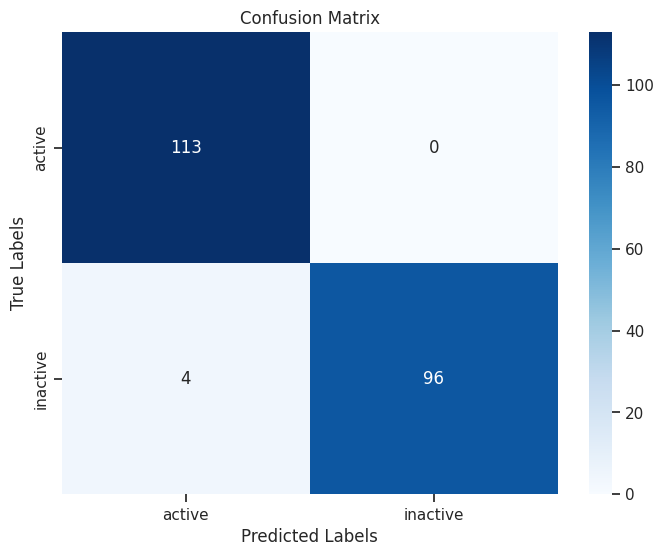

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8958479943701618
Mean Precision: 0.90311986863711
Mean Recall: 0.8949635441432874
Mean F1-score: 0.8952085783190162


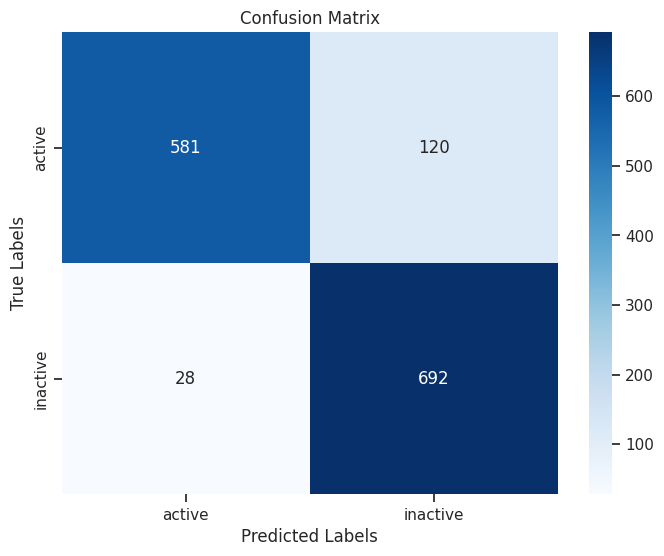

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.8028169014084507
Mean Precision: 0.8041482789055605
Mean Recall: 0.8049557522123894
Mean F1-score: 0.8027777777777778


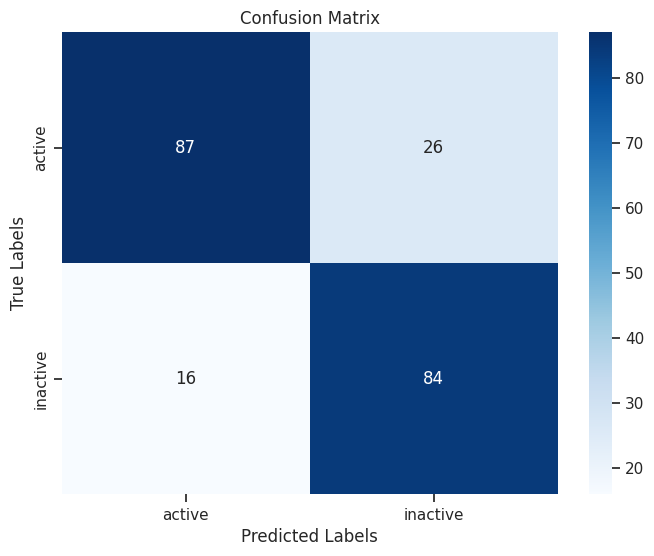

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7867698803659395
Mean Precision: 0.7912342733976727
Mean Recall: 0.7859129814550642
Mean F1-score: 0.7855767291416107


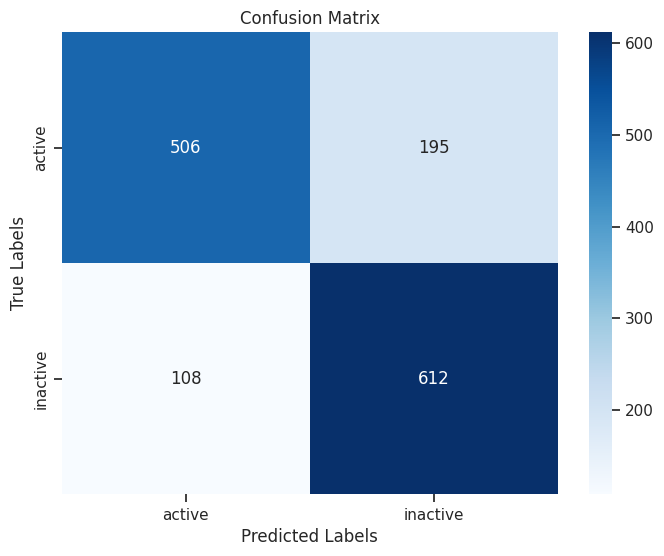

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## PubChem

Feature count **881**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/pubchem.csv') 
df_fp

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0        AUTOGEN_molecule_1           1           1           1           0   
1        AUTOGEN_molecule_2           1           1           1           0   
2        AUTOGEN_molecule_3           1           1           1           0   
3        AUTOGEN_molecule_4           1           1           1           0   
4        AUTOGEN_molecule_5           1           1           1           0   
...                     ...         ...         ...         ...         ...   
1416  AUTOGEN_molecule_1417           1           1           0           0   
1417  AUTOGEN_molecule_1418           1           1           0           0   
1418  AUTOGEN_molecule_1419           1           1           0           0   
1419  AUTOGEN_molecule_1420           1           1           0           0   
1420  AUTOGEN_molecule_1421           1           1           0           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
1416           0           0           0           0           0  ...   
1417           0           0           0           0           0  ...   
1418           0           0           0           0           0  ...   
1419           0           0           0           0           0  ...   
1420           0           0           0           0           0  ...   

      PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1416             0             0             0             0             0   
1417             0             0             0             0             0   
1418             0             0             0             0             0   
1419             0             0             0             0             0   
1420             0             0             0             0             0   

      PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0             0  
1                0             0             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
1416             0             0             0             0             0  
1417             0             0             0             0             0  
1418             0             0             0             0             0  
1419             0             0             0             0             0  
1420             0             0             0             0             0  

[1421 rows x 882 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1416           1           1           0           0           0           0   
1417           1           1           0           0           0           0   
1418           1           1           0           0           0           0   
1419           1           1           0           0           0           0   
1420           1           1           0           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
1416           0           0           0           1  ...             0   
1417           0           0           0           1  ...             0   
1418           0           0           0           1  ...             0   
1419           0           0           0           1  ...             0   
1420           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1416             0             0             0             0             0   
1417             0             0             0             0             0   
1418             0             0             0             0             0   
1419             0             0             0             0             0   
1420             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
1416             0             0             0             0  
1417             0             0             0             0  
1418             0             0             0             0  
1419             0             0             0             0  
1420             0             0             0             0  

[1421 rows x 881 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 881), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 176)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 176), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 176), (213,))

### Logistic Regression


Mean Accuracy: 0.9906103286384976
Mean Precision: 0.991304347826087
Mean Recall: 0.99
Mean F1-score: 0.9905635300372142


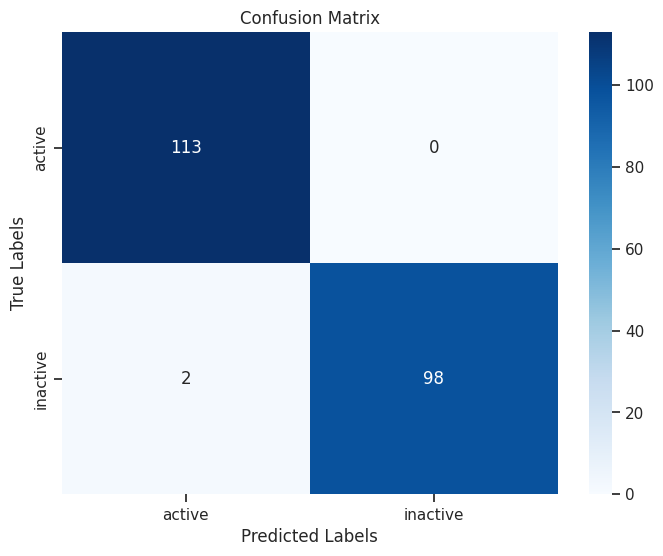

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8240675580577058
Mean Precision: 0.837212816786529
Mean Recall: 0.8227373593279442
Mean F1-score: 0.8218933997529319


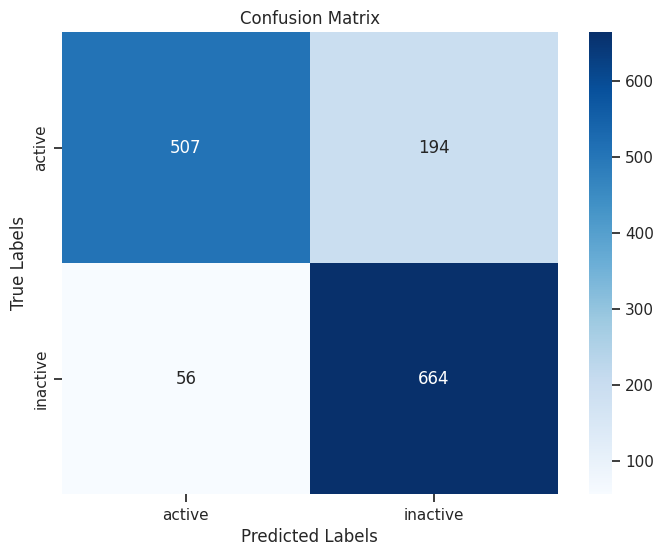

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9812206572769953
Mean Precision: 0.982905982905983
Mean Recall: 0.98
Mean F1-score: 0.9811002661934338


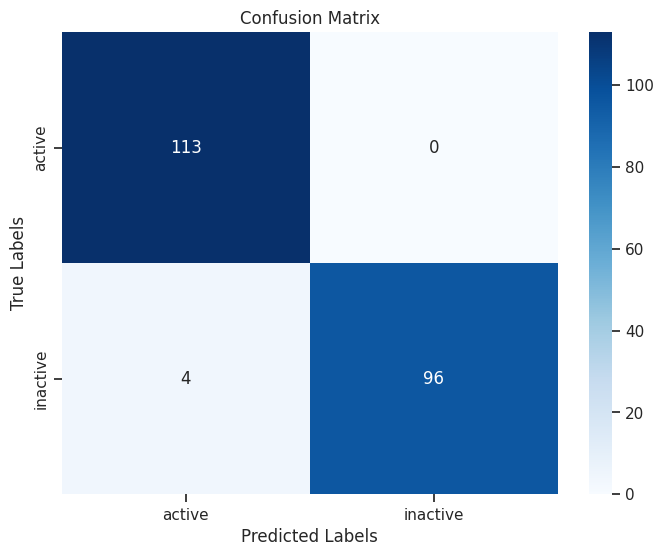

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8479943701618579
Mean Precision: 0.85601144882991
Mean Recall: 0.8469884292280869
Mean F1-score: 0.8468468828089448


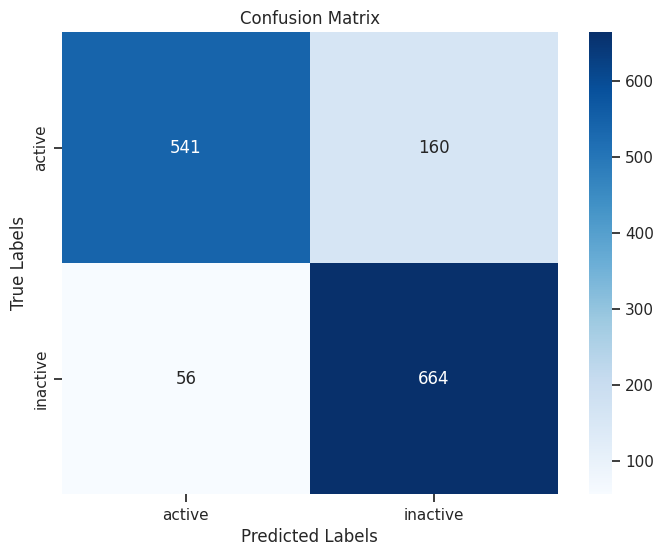

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


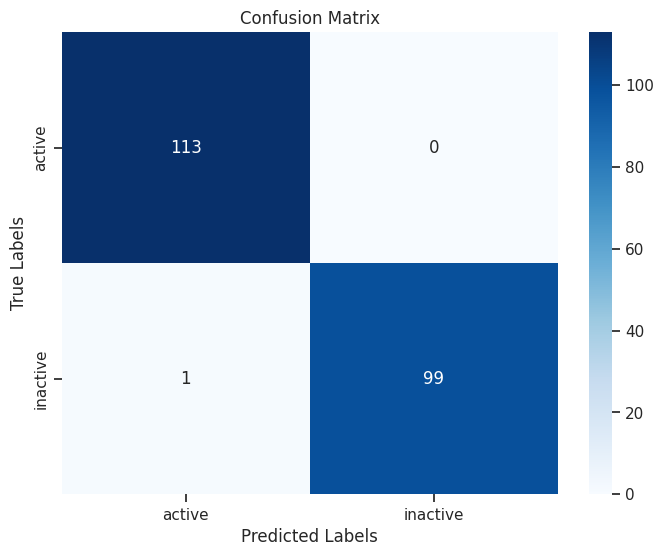

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8902181562280085
Mean Precision: 0.8961997145552626
Mean Recall: 0.8894079885877317
Mean F1-score: 0.8896383210065357


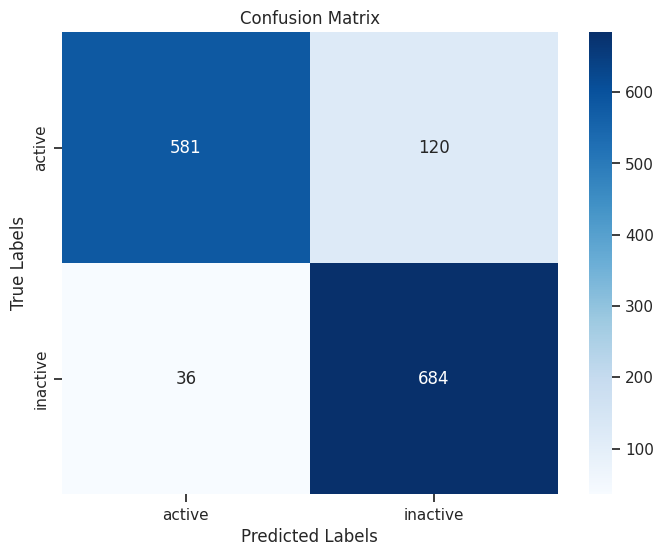

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


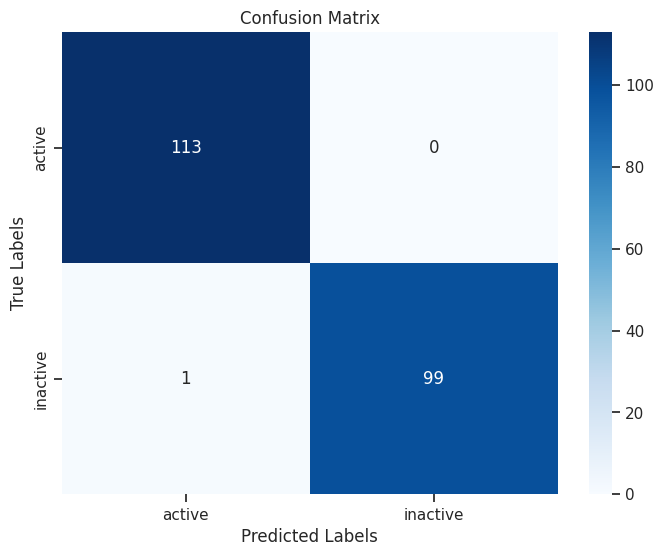

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8789584799437016
Mean Precision: 0.8969841917984016
Mean Recall: 0.8775439847836424
Mean F1-score: 0.8772632864506125


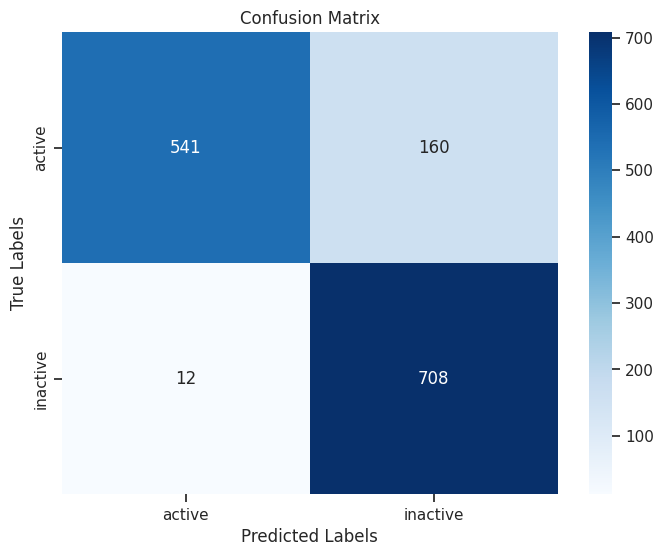

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### SVM

Mean Accuracy: 0.9906103286384976
Mean Precision: 0.991304347826087
Mean Recall: 0.99
Mean F1-score: 0.9905635300372142


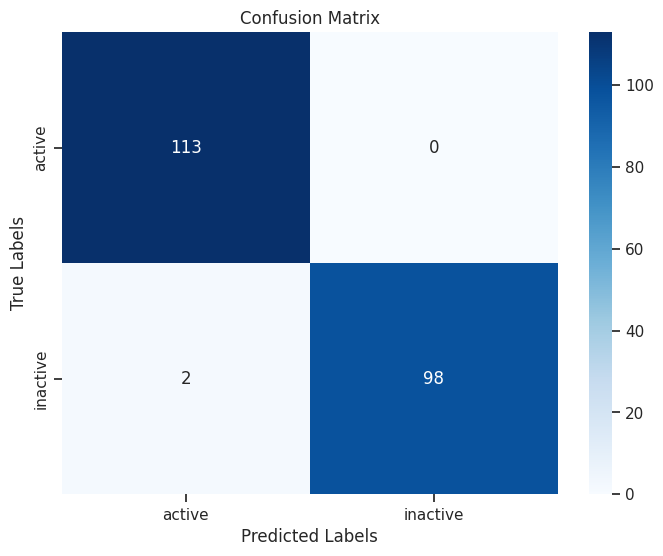

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8733286418015482
Mean Precision: 0.8891514322430876
Mean Recall: 0.8719884292280868
Mean F1-score: 0.8717226022588217


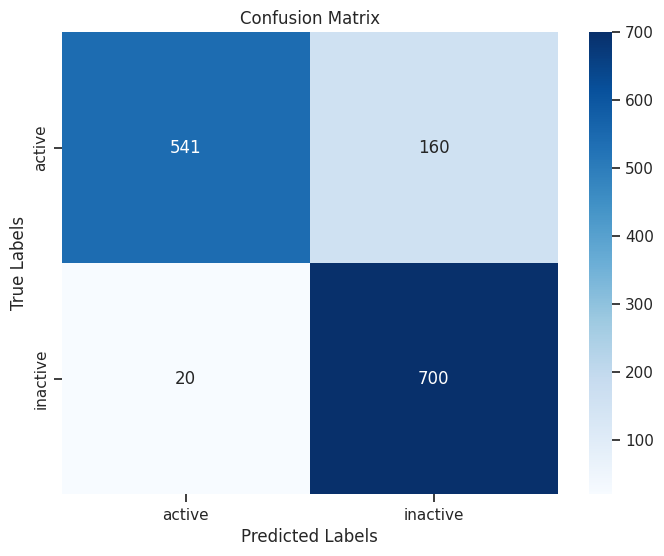

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.755868544600939
Mean Precision: 0.7596136238784106
Mean Recall: 0.750929203539823
Mean F1-score: 0.7518817204301075


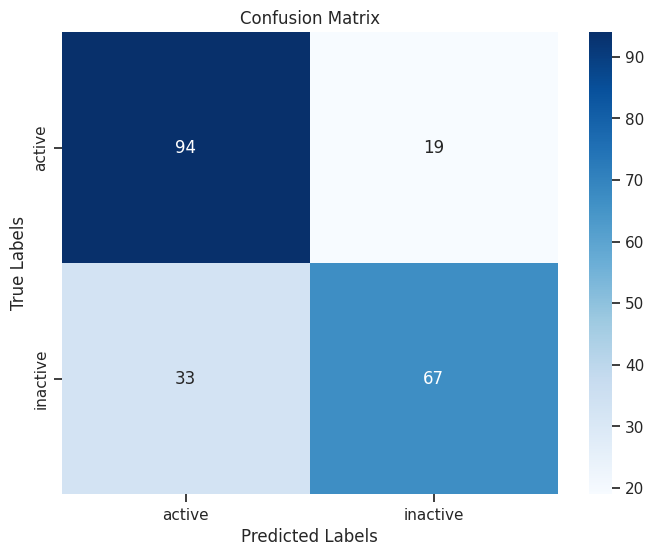

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.6769880365939479
Mean Precision: 0.6803095818107998
Mean Recall: 0.675979751149152
Mean F1-score: 0.6746679661878423


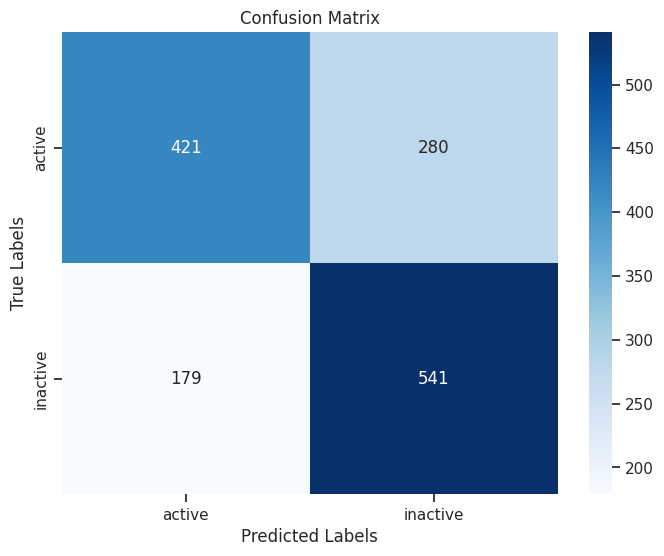

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Substructure

Feature count **307**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/substructure.csv') 
df_fp

Name  SubFP1  SubFP2  SubFP3  SubFP4  SubFP5  SubFP6  \
0        AUTOGEN_molecule_1       0       1       0       0       0       0   
1        AUTOGEN_molecule_2       0       1       0       0       0       0   
2        AUTOGEN_molecule_3       0       1       0       0       0       0   
3        AUTOGEN_molecule_4       0       1       0       0       0       0   
4        AUTOGEN_molecule_5       0       1       0       0       0       0   
...                     ...     ...     ...     ...     ...     ...     ...   
1416  AUTOGEN_molecule_1417       0       0       0       0       0       0   
1417  AUTOGEN_molecule_1418       1       1       0       0       0       0   
1418  AUTOGEN_molecule_1419       1       1       0       0       0       0   
1419  AUTOGEN_molecule_1420       1       1       0       0       0       0   
1420  AUTOGEN_molecule_1421       1       1       0       0       0       0   

      SubFP7  SubFP8  SubFP9  ...  SubFP298  SubFP299  SubFP300  SubFP301  \
0          0       0       0  ...         0         0         1         1   
1          0       0       0  ...         0         0         1         1   
2          0       0       0  ...         0         0         1         1   
3          0       0       0  ...         0         0         1         1   
4          0       0       0  ...         0         0         1         1   
...      ...     ...     ...  ...       ...       ...       ...       ...   
1416       0       0       0  ...         1         1         0         0   
1417       0       0       0  ...         0         0         1         1   
1418       0       0       0  ...         0         0         1         1   
1419       0       0       0  ...         0         0         1         1   
1420       0       0       0  ...         0         0         1         1   

      SubFP302  SubFP303  SubFP304  SubFP305  SubFP306  SubFP307  
0            1         0         0         0         0         1  
1            1         0         0         0         0         1  
2            1         0         0         0         0         1  
3            1         0         0         0         0         1  
4            1         0         0         0         0         1  
...        ...       ...       ...       ...       ...       ...  
1416         1         0         0         0         0         1  
1417         1         0         0         0         0         1  
1418         1         0         0         0         0         1  
1419         1         0         0         0         0         1  
1420         1         0         0         0         0         1  

[1421 rows x 308 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [ ]:
X

SubFP1  SubFP2  SubFP3  SubFP4  SubFP5  SubFP6  SubFP7  SubFP8  SubFP9  \
0          0       1       0       0       0       0       0       0       0   
1          0       1       0       0       0       0       0       0       0   
2          0       1       0       0       0       0       0       0       0   
3          0       1       0       0       0       0       0       0       0   
4          0       1       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416       0       0       0       0       0       0       0       0       0   
1417       1       1       0       0       0       0       0       0       0   
1418       1       1       0       0       0       0       0       0       0   
1419       1       1       0       0       0       0       0       0       0   
1420       1       1       0       0       0       0       0       0       0   

      SubFP10  ...  SubFP298  SubFP299  SubFP300  SubFP301  SubFP302  \
0           0  ...         0         0         1         1         1   
1           0  ...         0         0         1         1         1   
2           0  ...         0         0         1         1         1   
3           0  ...         0         0         1         1         1   
4           0  ...         0         0         1         1         1   
...       ...  ...       ...       ...       ...       ...       ...   
1416        0  ...         1         1         0         0         1   
1417        0  ...         0         0         1         1         1   
1418        0  ...         0         0         1         1         1   
1419        0  ...         0         0         1         1         1   
1420        0  ...         0         0         1         1         1   

      SubFP303  SubFP304  SubFP305  SubFP306  SubFP307  
0            0         0         0         0         1  
1            0         0         0         0         1  
2            0         0         0         0         1  
3            0         0         0         0         1  
4            0         0         0         0         1  
...        ...       ...       ...       ...       ...  
1416         0         0         0         0         1  
1417         0         0         0         0         1  
1418         0         0         0         0         1  
1419         0         0         0         0         1  
1420         0         0         0         0         1  

[1421 rows x 307 columns]

In [ ]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [ ]:
X.shape, Y.shape

((1421, 307), (1421,))

In [ ]:
X_columns = X.columns

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 15)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 15), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 15), (213,))

### Logistic Regression


Mean Accuracy: 0.8075117370892019
Mean Precision: 0.8083980239943542
Mean Recall: 0.8093805309734513
Mean F1-score: 0.8074438295151367


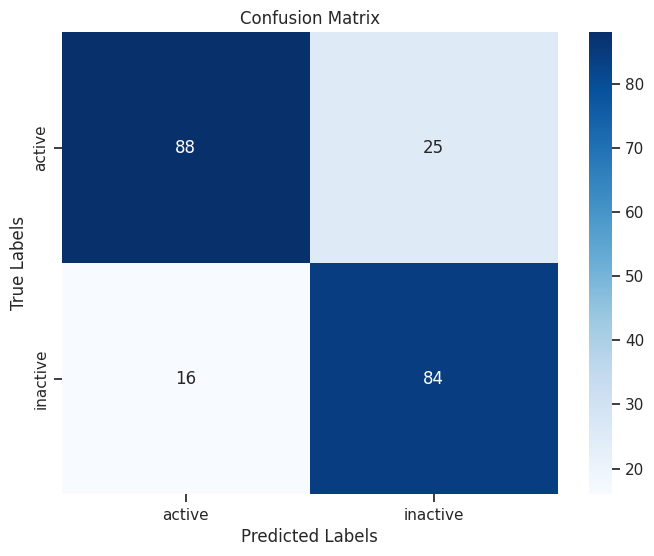

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7107670654468684
Mean Precision: 0.7202358616434015
Mean Recall: 0.7093130844824853
Mean F1-score: 0.7066669948071764


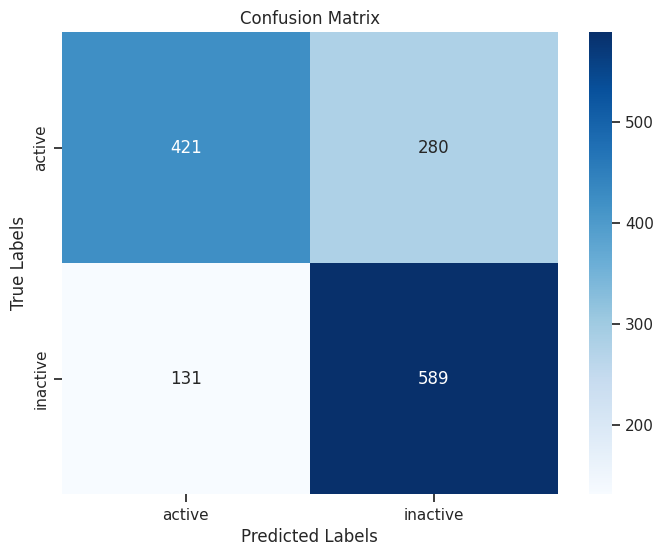

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Mean Accuracy: 0.9061032863849765
Mean Precision: 0.924812030075188
Mean Recall: 0.9
Mean F1-score: 0.9037940379403795


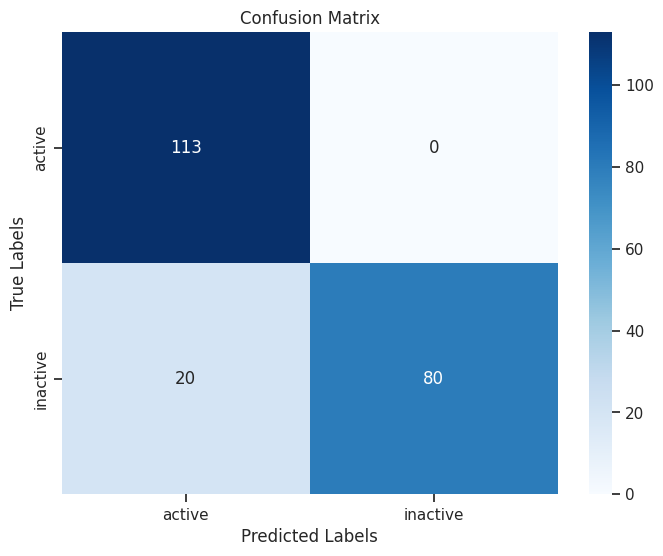

In [ ]:

# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8430682617874736
Mean Precision: 0.845530811956617
Mean Recall: 0.8436331035029323
Mean F1-score: 0.8429176549901973


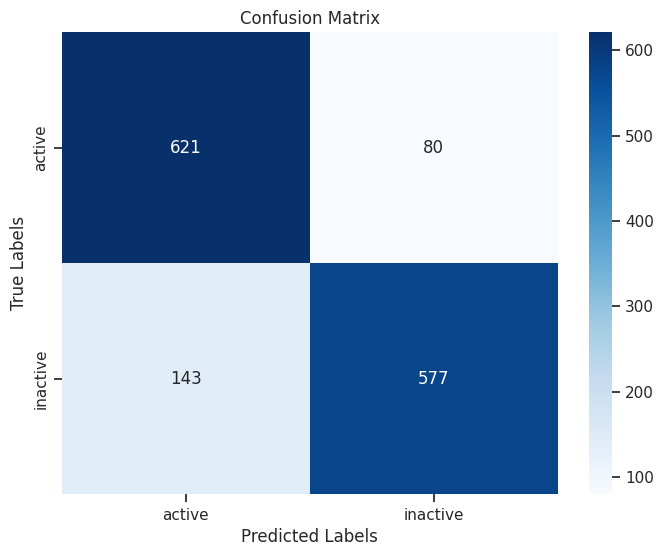

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Decision Tree

Mean Accuracy: 0.9530516431924883
Mean Precision: 0.9525846859562457
Mean Recall: 0.9540265486725663
Mean F1-score: 0.9529676735559088


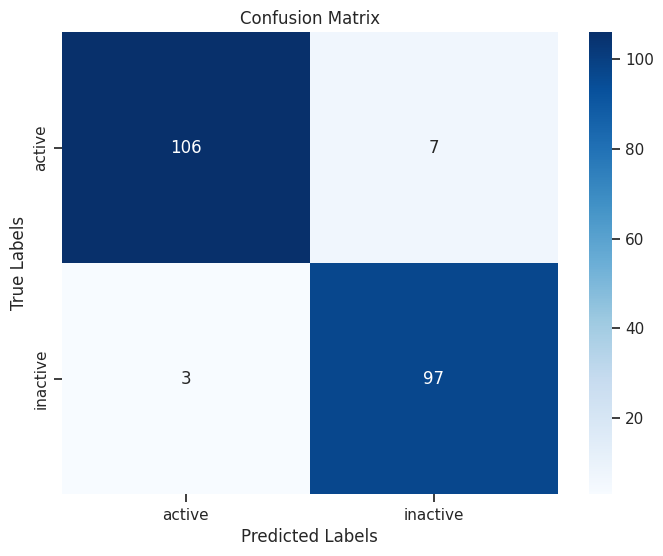

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)

# Train the KNN classifier
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8458831808585503
Mean Precision: 0.8509614028300023
Mean Recall: 0.8450744967506736
Mean F1-score: 0.8450849919630115


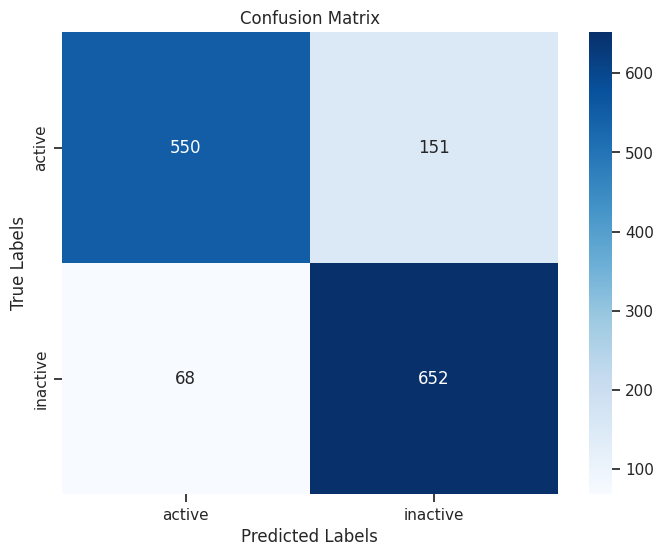

In [ ]:
# Perform cross-validation

Y_pred = cross_val_predict(dtc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Mean Accuracy: 0.9530516431924883
Mean Precision: 0.9525846859562457
Mean Recall: 0.9540265486725663
Mean F1-score: 0.9529676735559088


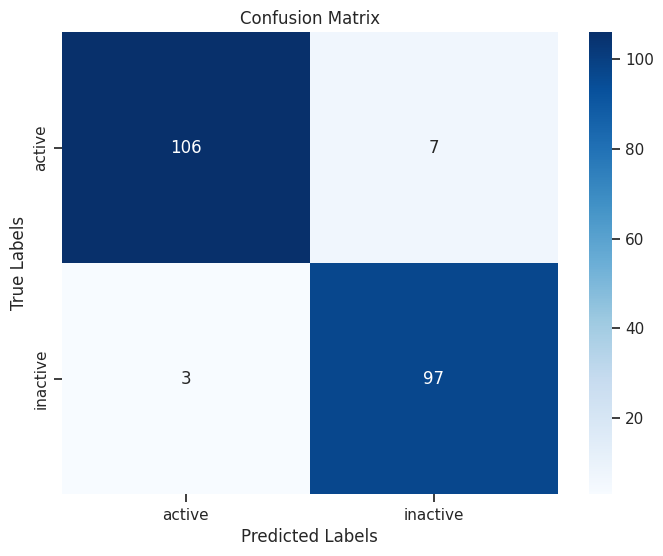

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8768472906403941
Mean Precision: 0.8899559420623722
Mean Recall: 0.8756300523062293
Mean F1-score: 0.8755333658670871


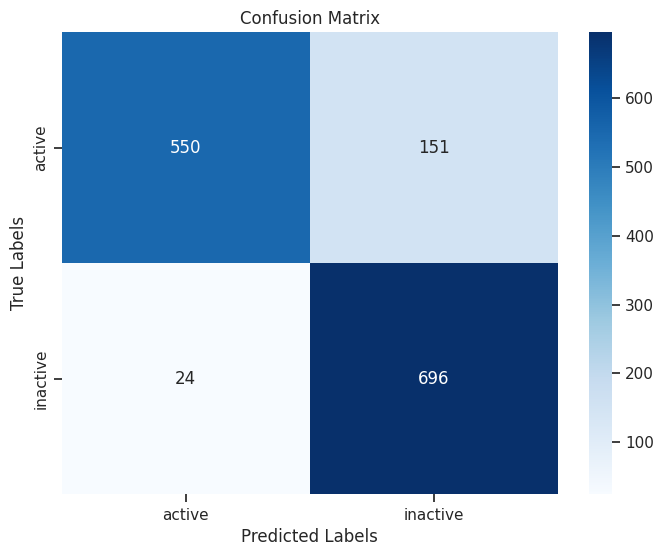

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

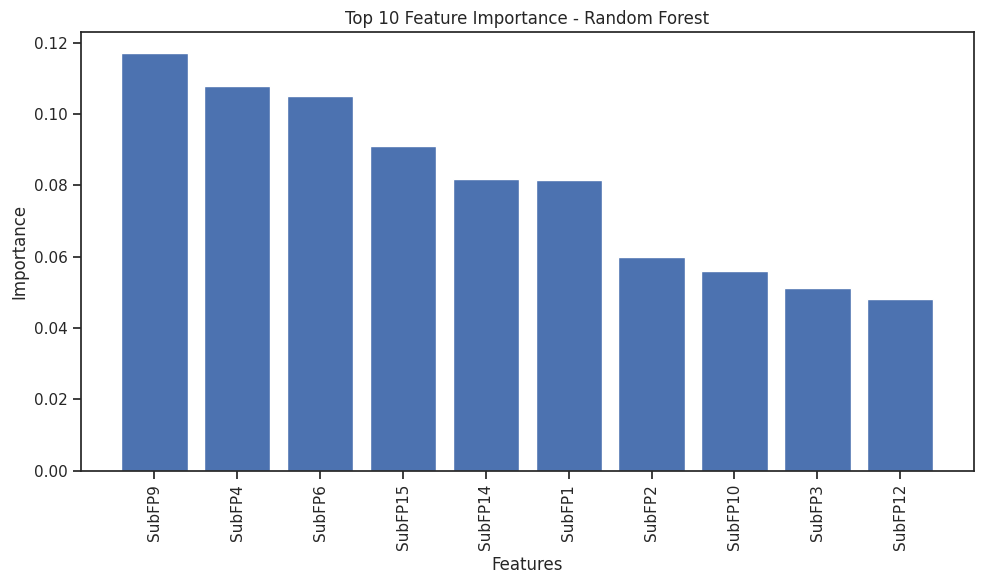

In [ ]:
# Get the feature importances
importances = rfc.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the feature names
feature_names = X_columns

# Extract the top 10 feature names and importances
top_feature_names = feature_names[sorted_indices[:10]]
top_importances = importances[sorted_indices[:10]]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

### SVM

Mean Accuracy: 0.9530516431924883
Mean Precision: 0.9525846859562457
Mean Recall: 0.9540265486725663
Mean F1-score: 0.9529676735559088


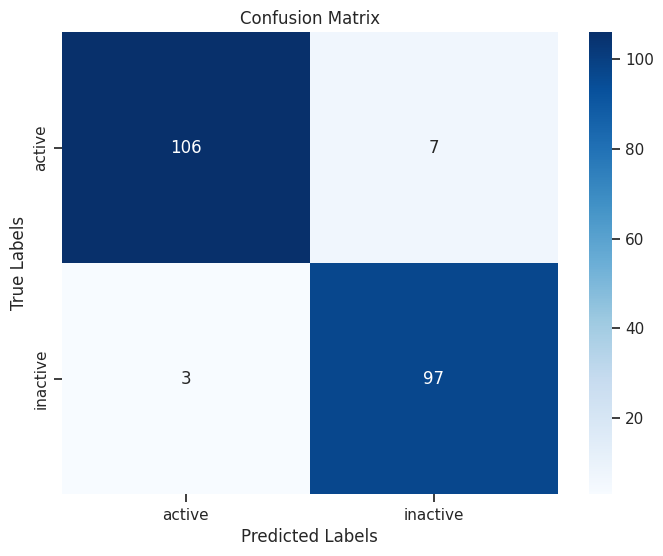

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8627726952850105
Mean Precision: 0.8716691298311613
Mean Recall: 0.8617411634173403
Mean F1-score: 0.8616852146263911


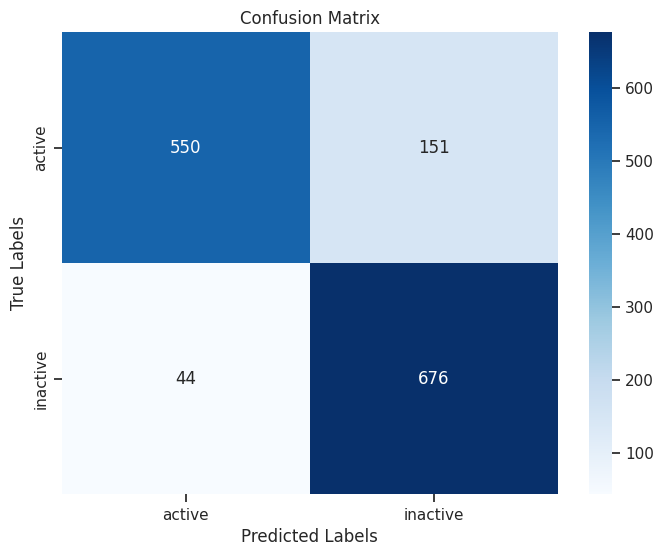

In [ ]:
Y_pred = cross_val_predict(svc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes Classification

Mean Accuracy: 0.7370892018779343
Mean Precision: 0.8059749784296808
Mean Recall: 0.7510619469026549
Mean F1-score: 0.7279693486590038


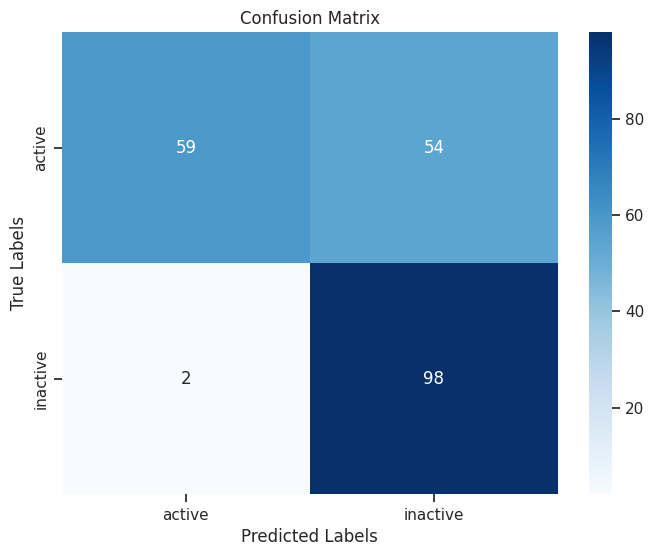

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7353976073187896
Mean Precision: 0.7733251474391174
Mean Recall: 0.7328657473450626
Mean F1-score: 0.7244692525392543


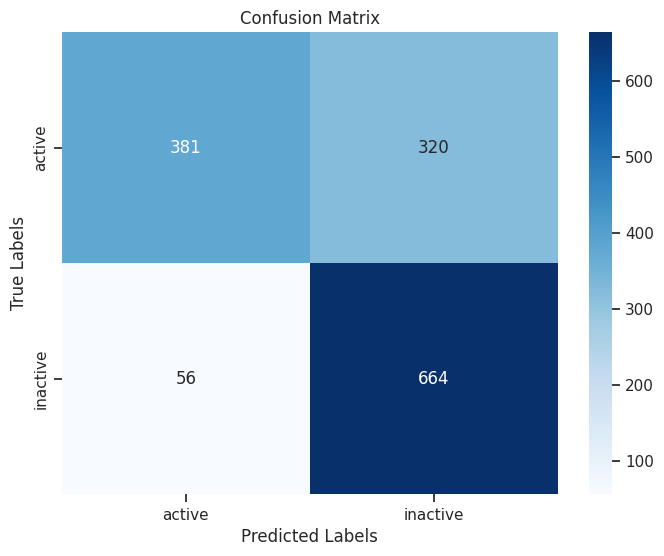

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Substructure Count

Feature count **307**. 

In [12]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/substructure_count.csv') 
df_fp

Name  SubFPC1  SubFPC2  SubFPC3  SubFPC4  SubFPC5  \
0        AUTOGEN_molecule_1      0.0      4.0      0.0      0.0      0.0   
1        AUTOGEN_molecule_2      0.0      4.0      0.0      0.0      0.0   
2        AUTOGEN_molecule_3      0.0      4.0      0.0      0.0      0.0   
3        AUTOGEN_molecule_4      0.0      4.0      0.0      0.0      0.0   
4        AUTOGEN_molecule_5      0.0      4.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
1416  AUTOGEN_molecule_1417      0.0      0.0      0.0      0.0      0.0   
1417  AUTOGEN_molecule_1418      1.0      2.0      0.0      0.0      0.0   
1418  AUTOGEN_molecule_1419      1.0      2.0      0.0      0.0      0.0   
1419  AUTOGEN_molecule_1420      1.0      2.0      0.0      0.0      0.0   
1420  AUTOGEN_molecule_1421      1.0      2.0      0.0      0.0      0.0   

      SubFPC6  SubFPC7  SubFPC8  SubFPC9  ...  SubFPC298  SubFPC299  \
0         0.0      0.0      0.0      0.0  ...        0.0        0.0   
1         0.0      0.0      0.0      0.0  ...        0.0        0.0   
2         0.0      0.0      0.0      0.0  ...        0.0        0.0   
3         0.0      0.0      0.0      0.0  ...        0.0        0.0   
4         0.0      0.0      0.0      0.0  ...        0.0        0.0   
...       ...      ...      ...      ...  ...        ...        ...   
1416      0.0      0.0      0.0      0.0  ...        2.0        2.0   
1417      0.0      0.0      0.0      0.0  ...        0.0        0.0   
1418      0.0      0.0      0.0      0.0  ...        0.0        0.0   
1419      0.0      0.0      0.0      0.0  ...        0.0        0.0   
1420      0.0      0.0      0.0      0.0  ...        0.0        0.0   

      SubFPC300  SubFPC301  SubFPC302  SubFPC303  SubFPC304  SubFPC305  \
0          10.0       10.0        6.0        0.0        0.0        0.0   
1          10.0       10.0        6.0        0.0        0.0        0.0   
2          10.0       10.0        6.0        0.0        0.0        0.0   
3          10.0       10.0        6.0        0.0        0.0        0.0   
4          10.0       10.0        6.0        0.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1416        0.0        0.0        4.0        0.0        0.0        0.0   
1417        4.0        4.0        3.0        0.0        0.0        0.0   
1418        4.0        4.0        3.0        0.0        0.0        0.0   
1419        4.0        4.0        3.0        0.0        0.0        0.0   
1420        4.0        4.0        3.0        0.0        0.0        0.0   

      SubFPC306  SubFPC307  
0           0.0       11.0  
1           0.0       11.0  
2           0.0       11.0  
3           0.0       11.0  
4           0.0       11.0  
...         ...        ...  
1416        0.0       15.0  
1417        0.0        9.0  
1418        0.0        9.0  
1419        0.0        9.0  
1420        0.0        9.0  

[1421 rows x 308 columns]

### Feature Selection

In [13]:
X = df_fp.drop('Name', axis=1)
Y = df['bioactivity_class']

In [14]:
X

SubFPC1  SubFPC2  SubFPC3  SubFPC4  SubFPC5  SubFPC6  SubFPC7  SubFPC8  \
0         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1416      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1417      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
1418      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
1419      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
1420      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   

      SubFPC9  SubFPC10  ...  SubFPC298  SubFPC299  SubFPC300  SubFPC301  \
0         0.0       0.0  ...        0.0        0.0       10.0       10.0   
1         0.0       0.0  ...        0.0        0.0       10.0       10.0   
2         0.0       0.0  ...        0.0        0.0       10.0       10.0   
3         0.0       0.0  ...        0.0        0.0       10.0       10.0   
4         0.0       0.0  ...        0.0        0.0       10.0       10.0   
...       ...       ...  ...        ...        ...        ...        ...   
1416      0.0       0.0  ...        2.0        2.0        0.0        0.0   
1417      0.0       0.0  ...        0.0        0.0        4.0        4.0   
1418      0.0       0.0  ...        0.0        0.0        4.0        4.0   
1419      0.0       0.0  ...        0.0        0.0        4.0        4.0   
1420      0.0       0.0  ...        0.0        0.0        4.0        4.0   

      SubFPC302  SubFPC303  SubFPC304  SubFPC305  SubFPC306  SubFPC307  
0           6.0        0.0        0.0        0.0        0.0       11.0  
1           6.0        0.0        0.0        0.0        0.0       11.0  
2           6.0        0.0        0.0        0.0        0.0       11.0  
3           6.0        0.0        0.0        0.0        0.0       11.0  
4           6.0        0.0        0.0        0.0        0.0       11.0  
...         ...        ...        ...        ...        ...        ...  
1416        4.0        0.0        0.0        0.0        0.0       15.0  
1417        3.0        0.0        0.0        0.0        0.0        9.0  
1418        3.0        0.0        0.0        0.0        0.0        9.0  
1419        3.0        0.0        0.0        0.0        0.0        9.0  
1420        3.0        0.0        0.0        0.0        0.0        9.0  

[1421 rows x 307 columns]

In [15]:
Y

0         active
1         active
2         active
3         active
4         active
          ...   
1416    inactive
1417    inactive
1418    inactive
1419    inactive
1420    inactive
Name: bioactivity_class, Length: 1421, dtype: object

In [16]:
X.shape, Y.shape

((1421, 307), (1421,))

In [17]:
X_columns = X.columns

Removing low variance features

In [18]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [19]:
X.shape

(1421, 37)

### Data Split

In [20]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [21]:
X_train.shape, Y_train.shape

((994, 37), (994,))

In [22]:
X_test.shape, Y_test.shape

((213, 37), (213,))

In [23]:
X_val.shape

(214, 37)

### Logistic Regression


Best parameters: {'C': 20, 'solver': 'liblinear'}
Best score: 0.9839094462210041
Mean Accuracy: 0.9859154929577465
Mean Precision: 0.9870689655172413
Mean Recall: 0.985
Mean F1-score: 0.9858355684614191


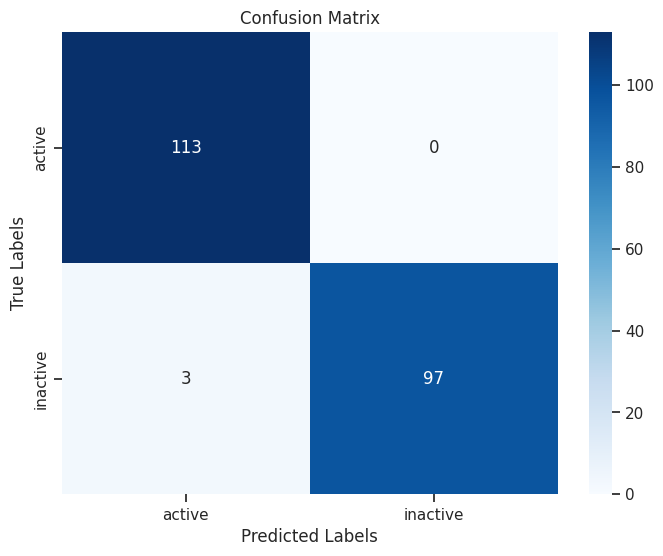

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 20],
    'solver': ['liblinear', 'lbfgs']
}

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

stratified_kfold = StratifiedKFold(n_splits=5)

# Perform Grid Search with Stratified K-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best Logistic Regression model
best_logreg = grid_search.best_estimator_

# Fit the model to the training data
best_logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = best_logreg.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8437719915552427
Mean Precision: 0.8491819483951664
Mean Recall: 0.842934696465367
Mean F1-score: 0.8429143080226429


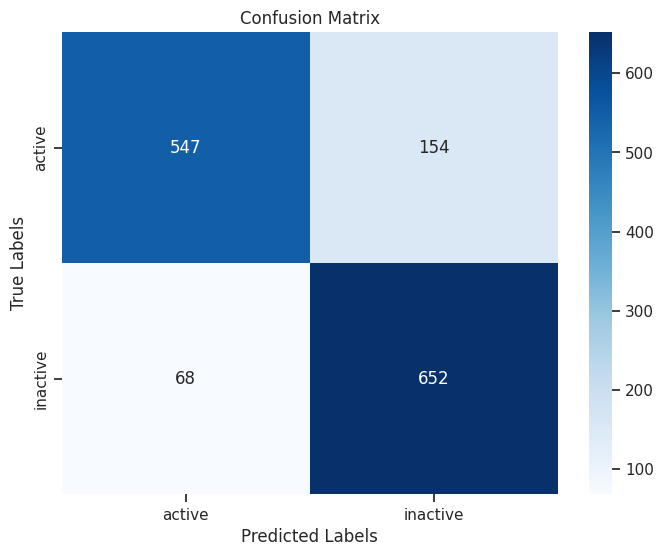

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(logreg, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### KNN

Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best score: 0.9969849246231156
Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


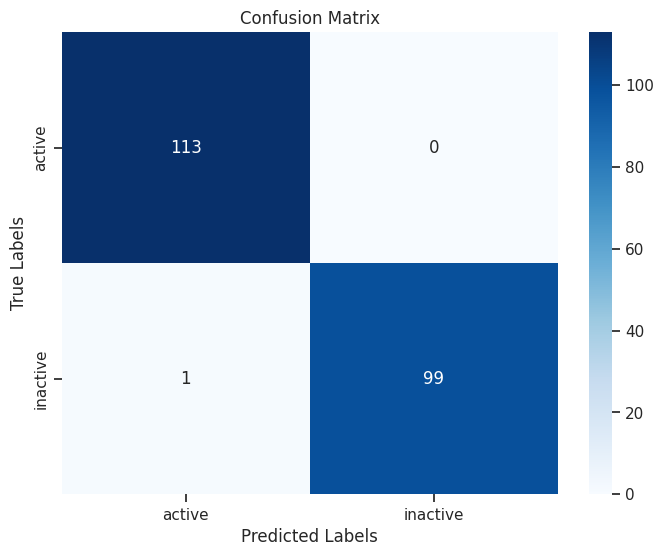

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 35, 50],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

stratified_kfold = StratifiedKFold(n_splits=5)

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best KNN model
best_knn = grid_search.best_estimator_


# Create a KNN classifier 
#knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
best_knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = best_knn.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8902181562280085
Mean Precision: 0.8961997145552626
Mean Recall: 0.8894079885877317
Mean F1-score: 0.8896383210065357


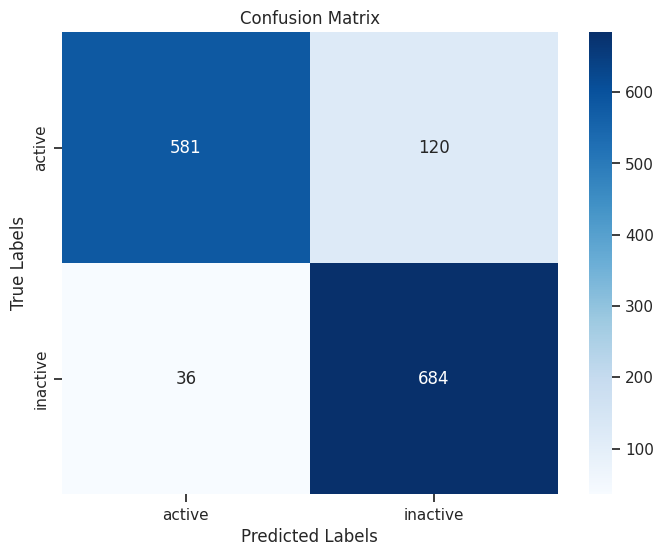

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(knn_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()






### Decision Tree

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9979899497487438
Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


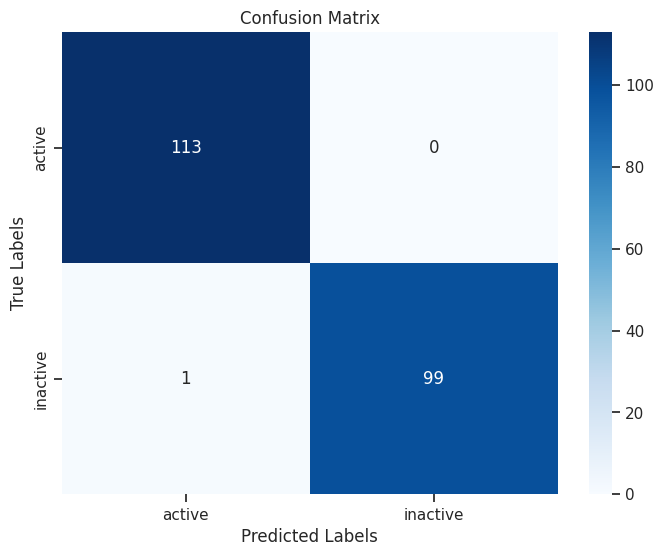

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create the Stratified K-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform Grid Search with Stratified K-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best Decision Tree model
best_dt = grid_search.best_estimator_


# Train the KNN classifier
best_dt.fit(X_train, Y_train)

# Predict on the test set
Y_pred = best_dt.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8627726952850105
Mean Precision: 0.8730559359097505
Mean Recall: 0.8616658741480425
Mean F1-score: 0.8615414596121991


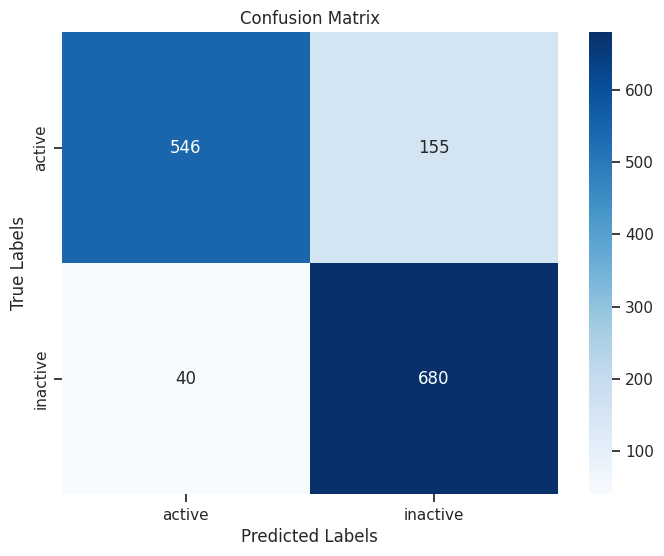

In [ ]:
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation

Y_pred = cross_val_predict(dt_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9979899497487438
-----------------------------
Mean Accuracy: 0.9953051643192489
Mean Precision: 0.9956140350877193
Mean Recall: 0.995
Mean F1-score: 0.9952847940141234


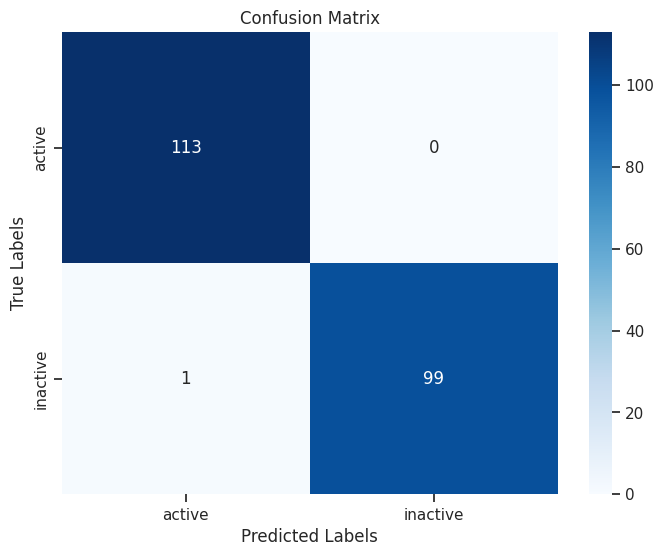

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

# Create the Stratified K-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform Grid Search with Stratified K-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("-----------------------------")

# Get the best Random Forest model
best_rf = grid_search.best_estimator_

# Train the classifier
best_rf.fit(X_train, Y_train)

# Predict on the test set
Y_pred = best_rf.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.9014778325123153
Mean Precision: 0.9101903331845298
Mean Recall: 0.9005190996988429
Mean F1-score: 0.9007820136852394


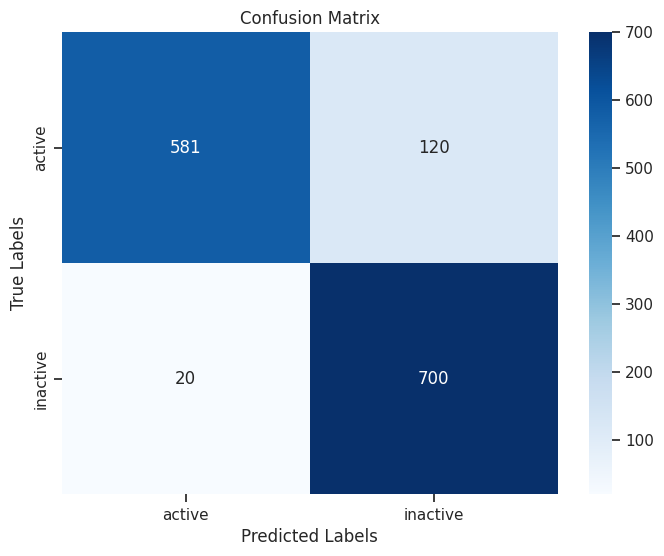

In [ ]:
Y_pred = cross_val_predict(rfc, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

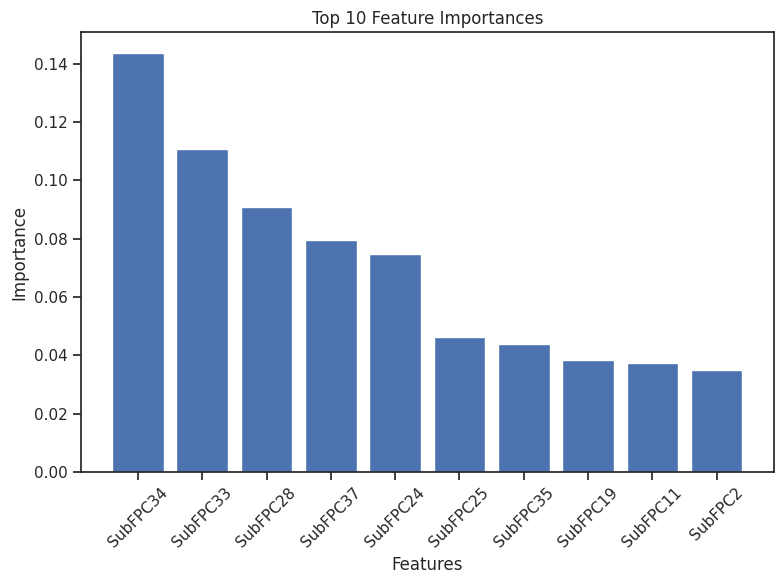

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(criterion='gini')
rf_classifier.fit(X_train, Y_train)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Create a list of (feature importance, feature index) tuples
feature_importances = [(importance, index) for index, importance in enumerate(importances)]

# Sort the feature importances in descending order
feature_importances.sort(reverse=True)

# Select the top 10 features
top_10_features = feature_importances[:10]

# Extract the feature names and importances
feature_indices = [index for _, index in top_10_features]
feature_names = X_columns[feature_indices]
importance_values = [importance for importance, _ in top_10_features]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(importance_values)), importance_values, align='center')
plt.xticks(range(len(importance_values)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

### SVM

Mean Accuracy: 0.8826291079812206
Mean Precision: 0.9094202898550725
Mean Recall: 0.875
Mean F1-score: 0.8787706317586795


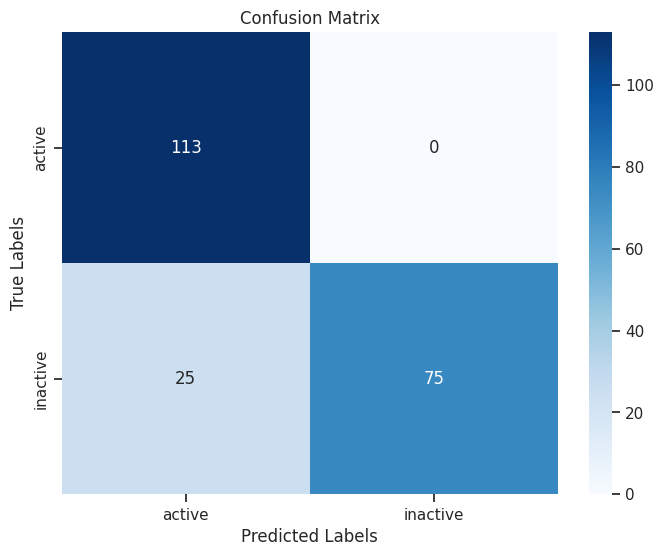

In [ ]:
from sklearn.svm import SVC

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}


# Create the SVC classifier
svc_classifier = SVC(probability=True)


svc_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svc_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.8268824771287826
Mean Precision: 0.8295470464160353
Mean Recall: 0.8262680297987003
Mean F1-score: 0.8263181429735478


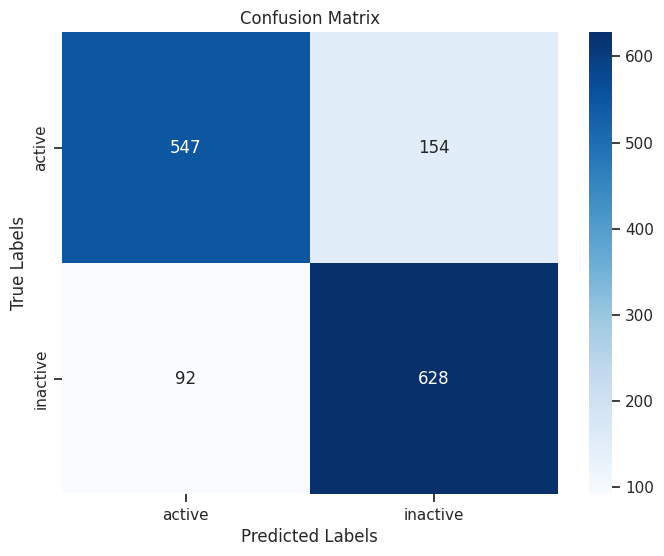

In [ ]:
# Perform cross-validation
# Perform cross-validation and obtain predicted labels for each fold
Y_pred = cross_val_predict(svc_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### Naive Bayes Classification

Mean Accuracy: 0.7746478873239436
Mean Precision: 0.8509316770186335
Mean Recall: 0.76
Mean F1-score: 0.7545140222819824


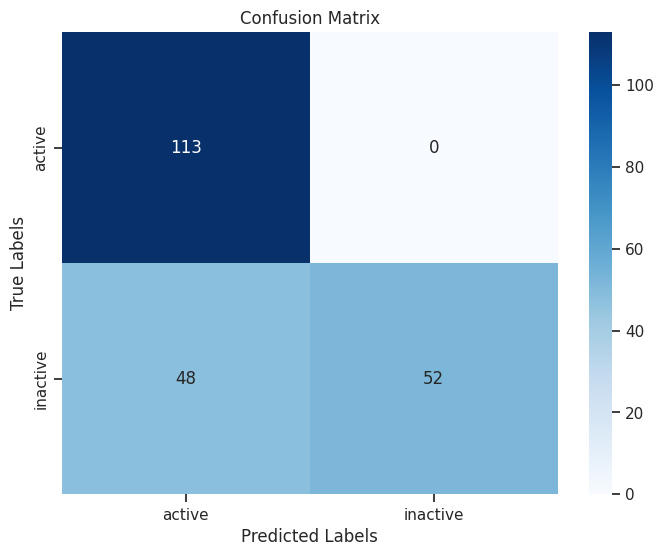

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = naive_bayes_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y_test, Y_pred)
precisions = precision_score(Y_test, Y_pred, average=None)
recalls = recall_score(Y_test, Y_pred, average=None)
f1_scores = f1_score(Y_test, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Mean Accuracy: 0.7417311752287121
Mean Precision: 0.7462898820083917
Mean Recall: 0.7425978760500872
Mean F1-score: 0.7409506561087883


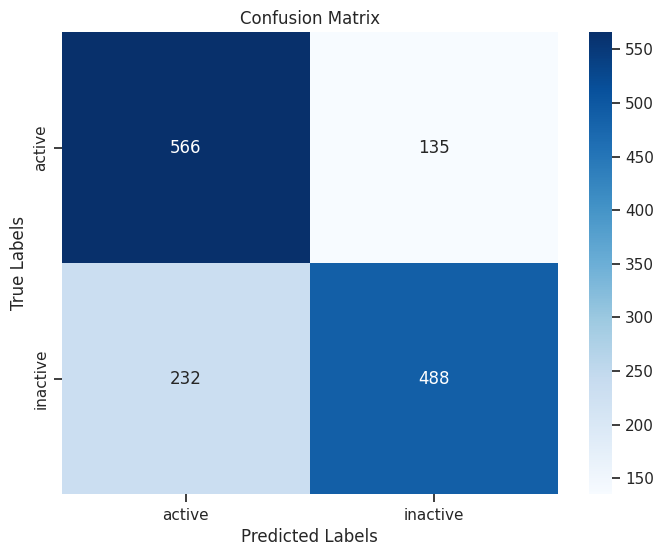

In [ ]:
Y_pred = cross_val_predict(naive_bayes_classifier, X, Y, cv=10)

# Calculate precision, recall, and F1-score for each fold
accuracy = accuracy_score(Y, Y_pred)
precisions = precision_score(Y, Y_pred, average=None)
recalls = recall_score(Y, Y_pred, average=None)
f1_scores = f1_score(Y, Y_pred, average=None)

# Calculate the mean precision, recall, and F1-score
mean_accuracy = accuracy.mean()
mean_precision = precisions.mean()
mean_recall = recalls.mean()
mean_f1 = f1_scores.mean()

# Print the mean metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_pred)
class_labels = ["active", "inactive"]
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

--- 
## Results

Using Substructure Count.

In [ ]:
new_data_point=X_val[12]
prediction = logreg.predict([new_data_point])

# Get the predicted class label
predicted_class = prediction[0]

# Calculate the percentage of being active or inactive
probabilities = rfc.predict_proba([new_data_point])[0]
active_percent = round(probabilities[1] * 100, 2)
inactive_percent = round(probabilities[0] * 100, 2)

print("Percentage of being active:", active_percent)
print("Percentage of being inactive:", inactive_percent)

Percentage of being active: 97.0
Percentage of being inactive: 3.0
